In [12]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
tqdm.pandas()

# Summary

Face recognition models are regular convolutional neural networks models. They represent face photos as vectors. We find the distance between these two vectors to compare two faces. Finally, we classify two faces as same person whose distance is less than a threshold value.

The question is that how to determine the threshold. In this notebook, we will find the best split point for a threshold.

# Data set

In [13]:
# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg"],
    "Jack": ["img16.jpg", "img17.jpg"],
    "Elon": ["img18.jpg", "img19.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"]
}

# Positive samples
Find different photos of same people

In [14]:
positives = []

for key, values in idendities.items():
    
    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

In [15]:
positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

# Negative samples
Compare photos of different people

In [16]:
samples_list = list(idendities.values())

In [17]:
negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j]) 
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)
        
        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)
        

In [18]:
negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

# Merge Positives and Negative Samples

In [19]:
df = pd.concat([positives, negatives]).reset_index(drop = True)

In [20]:
df.shape

(300, 3)

In [21]:
df.decision.value_counts()

No     262
Yes     38
Name: decision, dtype: int64

In [22]:
df.file_x

0       img1.jpg
1       img1.jpg
2       img1.jpg
3       img1.jpg
4       img1.jpg
         ...    
295    img21.jpg
296    img22.jpg
297    img22.jpg
298    img23.jpg
299    img23.jpg
Name: file_x, Length: 300, dtype: object

In [23]:
df.file_x = "/home/quang/Documents/FACE/deepface/tests/dataset/"+df.file_x
df.file_y = "/home/quang/Documents/FACE/deepface/tests/dataset/"+df.file_y

# DeepFace

In [31]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()

#--------------------------
#Data set

# Ref: https://github.com/serengil/deepface/tree/master/tests/dataset
idendities = {
    "Angelina": ["img1.jpg", "img2.jpg", "img4.jpg", "img5.jpg", "img6.jpg", "img7.jpg", "img10.jpg", "img11.jpg"],
    "Scarlett": ["img8.jpg", "img9.jpg", "img47.jpg", "img48.jpg", "img49.jpg", "img50.jpg", "img51.jpg"],
    "Jennifer": ["img3.jpg", "img12.jpg", "img53.jpg", "img54.jpg", "img55.jpg", "img56.jpg"],
    "Mark": ["img13.jpg", "img14.jpg", "img15.jpg", "img57.jpg", "img58.jpg"],
    "Jack": ["img16.jpg", "img17.jpg", "img59.jpg", "img61.jpg", "img62.jpg"],
    "Elon": ["img18.jpg", "img19.jpg", "img67.jpg"],
    "Jeff": ["img20.jpg", "img21.jpg"],
    "Marissa": ["img22.jpg", "img23.jpg"],
    "Sundar": ["img24.jpg", "img25.jpg"],
    "Katy": ["img26.jpg", "img27.jpg", "img28.jpg", "img42.jpg", "img43.jpg", "img44.jpg", "img45.jpg", "img46.jpg"],
    "Matt": ["img29.jpg", "img30.jpg", "img31.jpg", "img32.jpg", "img33.jpg"],
    "Leonardo": ["img34.jpg", "img35.jpg", "img36.jpg", "img37.jpg"],
    "George": ["img38.jpg", "img39.jpg", "img40.jpg", "img41.jpg"]
}
#--------------------------
#Positives

positives = []

for key, values in idendities.items():

    #print(key)
    for i in range(0, len(values)-1):
        for j in range(i+1, len(values)):
            #print(values[i], " and ", values[j])
            positive = []
            positive.append(values[i])
            positive.append(values[j])
            positives.append(positive)

positives = pd.DataFrame(positives, columns = ["file_x", "file_y"])
positives["decision"] = "Yes"

print(positives.shape)
#--------------------------
#Negatives

samples_list = list(idendities.values())

negatives = []

for i in range(0, len(idendities) - 1):
    for j in range(i+1, len(idendities)):
        #print(samples_list[i], " vs ",samples_list[j])
        cross_product = itertools.product(samples_list[i], samples_list[j])
        cross_product = list(cross_product)
        #print(cross_product)

        for cross_sample in cross_product:
            #print(cross_sample[0], " vs ", cross_sample[1])
            negative = []
            negative.append(cross_sample[0])
            negative.append(cross_sample[1])
            negatives.append(negative)

negatives = pd.DataFrame(negatives, columns = ["file_x", "file_y"])
negatives["decision"] = "No"

negatives = negatives.sample(positives.shape[0])

print(negatives.shape)
#--------------------------
#Merge positive and negative ones

df = pd.concat([positives, negatives]).reset_index(drop = True)

print(df.decision.value_counts())

df.file_x = "tests/dataset/"+df.file_x
df.file_y = "tests/dataset/"+df.file_y

print(df.head())


(140, 3)
(140, 3)
Yes    140
No     140
Name: decision, dtype: int64
                   file_x                  file_y decision
0  tests/dataset/img1.jpg  tests/dataset/img2.jpg      Yes
1  tests/dataset/img1.jpg  tests/dataset/img4.jpg      Yes
2  tests/dataset/img1.jpg  tests/dataset/img5.jpg      Yes
3  tests/dataset/img1.jpg  tests/dataset/img6.jpg      Yes
4  tests/dataset/img1.jpg  tests/dataset/img7.jpg      Yes


In [32]:
#--------------------------
#DeepFace

from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")
pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")
pretrained_models["OpenFace"] = OpenFace.loadModel()
print("OpenFace loaded")
pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

VGG-Face loaded
Facenet loaded
OpenFace loaded
FbDeepFace loaded


Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/280 [00:00<03:59,  1.16it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                        | 2/280 [00:01<03:57,  1.17it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|██▊                                                                                                                                                                                                                                                                       | 3/280 [00:02<03:22,  1.37it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                      | 4/280 [00:02<03:11,  1.44it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                     | 5/280 [00:03<03:22,  1.36it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█████▋                                                                                                                                                                                                                                                                    | 6/280 [00:04<03:18,  1.38it/s]

(280, 280, 3)
ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██████▋                                                                                                                                                                                                                                                                   | 7/280 [00:05<03:11,  1.42it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|███████▌                                                                                                                                                                                                                                                                  | 8/280 [00:06<03:28,  1.30it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|████████▌                                                                                                                                                                                                                                                                 | 9/280 [00:06<03:07,  1.44it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|█████████▍                                                                                                                                                                                                                                                               | 10/280 [00:07<02:58,  1.52it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                              | 11/280 [00:07<03:05,  1.45it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███████████▎                                                                                                                                                                                                                                                             | 12/280 [00:08<02:52,  1.56it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 13/280 [00:08<02:45,  1.62it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 14/280 [00:09<02:50,  1.56it/s]

(242, 242, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 15/280 [00:10<02:56,  1.50it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                         | 16/280 [00:11<03:08,  1.40it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████████████████                                                                                                                                                                                                                                                         | 17/280 [00:11<03:05,  1.42it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████████████████                                                                                                                                                                                                                                                        | 18/280 [00:12<03:03,  1.43it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████████████████▉                                                                                                                                                                                                                                                       | 19/280 [00:12<02:39,  1.64it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████▉                                                                                                                                                                                                                                                      | 20/280 [00:13<02:36,  1.66it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                     | 21/280 [00:13<02:19,  1.86it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|████████████████████▊                                                                                                                                                                                                                                                    | 22/280 [00:14<02:05,  2.05it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                   | 23/280 [00:14<02:18,  1.86it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████████████████████▋                                                                                                                                                                                                                                                  | 24/280 [00:15<02:08,  1.99it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▋                                                                                                                                                                                                                                                 | 25/280 [00:15<02:02,  2.09it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|████████████████████████▌                                                                                                                                                                                                                                                | 26/280 [00:16<02:10,  1.95it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 27/280 [00:17<02:20,  1.80it/s]

ensemble_features []
(280, 280, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 28/280 [00:17<02:05,  2.00it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 29/280 [00:18<02:14,  1.87it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▍                                                                                                                                                                                                                                            | 30/280 [00:18<02:32,  1.64it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▎                                                                                                                                                                                                                                           | 31/280 [00:19<02:30,  1.65it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▎                                                                                                                                                                                                                                          | 32/280 [00:20<03:25,  1.20it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|███████████████████████████████▏                                                                                                                                                                                                                                         | 33/280 [00:21<02:54,  1.42it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▏                                                                                                                                                                                                                                        | 34/280 [00:21<02:32,  1.62it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▏                                                                                                                                                                                                                                       | 35/280 [00:22<02:42,  1.51it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████                                                                                                                                                                                                                                       | 36/280 [00:23<02:39,  1.53it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████                                                                                                                                                                                                                                      | 37/280 [00:24<03:24,  1.19it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|███████████████████████████████████▉                                                                                                                                                                                                                                     | 38/280 [00:24<02:58,  1.35it/s]

ensemble_features []
(634, 634, 3)


Verification:  14%|████████████████████████████████████▉                                                                                                                                                                                                                                    | 39/280 [00:25<02:47,  1.44it/s]

(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|█████████████████████████████████████▊                                                                                                                                                                                                                                   | 40/280 [00:26<02:52,  1.39it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 41/280 [00:27<03:31,  1.13it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 42/280 [00:28<03:07,  1.27it/s]

ensemble_features []
(810, 810, 3)


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 43/280 [00:28<02:59,  1.32it/s]

(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▋                                                                                                                                                                                                                               | 44/280 [00:29<03:29,  1.13it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|██████████████████████████████████████████▌                                                                                                                                                                                                                              | 45/280 [00:30<02:58,  1.32it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|███████████████████████████████████████████▌                                                                                                                                                                                                                             | 46/280 [00:30<02:37,  1.49it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|████████████████████████████████████████████▍                                                                                                                                                                                                                            | 47/280 [00:31<03:10,  1.22it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████████████████████████████████████▍                                                                                                                                                                                                                           | 48/280 [00:33<03:28,  1.11it/s]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|██████████████████████████████████████████████▍                                                                                                                                                                                                                          | 49/280 [00:33<02:47,  1.38it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|███████████████████████████████████████████████▎                                                                                                                                                                                                                         | 50/280 [00:34<02:45,  1.39it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|████████████████████████████████████████████████▎                                                                                                                                                                                                                        | 51/280 [00:34<02:49,  1.35it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▏                                                                                                                                                                                                                       | 52/280 [00:36<03:25,  1.11it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████████████████████████████████████████▏                                                                                                                                                                                                                      | 53/280 [00:36<03:14,  1.17it/s]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|███████████████████████████████████████████████████                                                                                                                                                                                                                      | 54/280 [00:37<03:09,  1.20it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 55/280 [00:38<02:38,  1.42it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 56/280 [00:38<02:50,  1.31it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 57/280 [00:39<02:24,  1.55it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|██████████████████████████████████████████████████████▉                                                                                                                                                                                                                  | 58/280 [00:39<02:07,  1.75it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|███████████████████████████████████████████████████████▊                                                                                                                                                                                                                 | 59/280 [00:40<02:31,  1.46it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████▊                                                                                                                                                                                                                | 60/280 [00:41<02:18,  1.59it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                               | 61/280 [00:41<02:12,  1.65it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|██████████████████████████████████████████████████████████▋                                                                                                                                                                                                              | 62/280 [00:42<02:39,  1.37it/s]

(286, 286, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|███████████████████████████████████████████████████████████▋                                                                                                                                                                                                             | 63/280 [00:43<02:54,  1.25it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▌                                                                                                                                                                                                            | 64/280 [00:44<02:30,  1.44it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████████████████████████████████████████████████▌                                                                                                                                                                                                           | 65/280 [00:44<02:22,  1.51it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▍                                                                                                                                                                                                          | 66/280 [00:45<02:20,  1.53it/s]

(355, 355, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 67/280 [00:46<02:19,  1.52it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                        | 68/280 [00:46<02:19,  1.52it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 69/280 [00:47<02:04,  1.70it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 70/280 [00:47<01:53,  1.84it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 71/280 [00:48<01:46,  1.96it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                    | 72/280 [00:48<01:46,  1.96it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████                                                                                                                                                                                                    | 73/280 [00:49<01:44,  1.98it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                                                   | 74/280 [00:49<01:43,  1.99it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                  | 75/280 [00:49<01:32,  2.22it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                 | 76/280 [00:50<01:30,  2.26it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                | 77/280 [00:50<01:23,  2.43it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                               | 78/280 [00:50<01:17,  2.60it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                              | 79/280 [00:51<01:20,  2.49it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                             | 80/280 [00:51<01:16,  2.60it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                            | 81/280 [00:52<01:12,  2.74it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)
(377, 377, 3)


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                           | 82/280 [00:52<01:16,  2.58it/s]

ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 83/280 [00:52<01:17,  2.54it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 84/280 [00:53<01:13,  2.65it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 85/280 [00:53<01:22,  2.38it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)
(260, 260, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                       | 86/280 [00:54<01:22,  2.34it/s]

ensemble_features []
(684, 684, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                      | 87/280 [00:54<01:25,  2.25it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                     | 88/280 [00:55<01:21,  2.37it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                    | 89/280 [00:55<01:42,  1.87it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                   | 90/280 [00:56<01:36,  1.97it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                  | 91/280 [00:57<01:52,  1.69it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                  | 92/280 [00:57<01:58,  1.59it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                 | 93/280 [00:58<02:05,  1.49it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                | 94/280 [00:59<02:14,  1.38it/s]

(139, 139, 3)
ensemble_features []
(896, 896, 3)
(204, 204, 3)


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 95/280 [01:00<02:50,  1.08it/s]

ensemble_features []
(896, 896, 3)


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 96/280 [01:01<02:50,  1.08it/s]

(251, 251, 3)
ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                             | 97/280 [01:02<02:40,  1.14it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                            | 98/280 [01:02<02:15,  1.34it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 99/280 [01:03<01:57,  1.54it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 100/280 [01:03<01:40,  1.80it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                        | 101/280 [01:04<01:31,  1.96it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                       | 102/280 [01:04<01:22,  2.15it/s]

ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                       | 103/280 [01:04<01:15,  2.34it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                      | 104/280 [01:05<01:13,  2.40it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                     | 105/280 [01:05<01:08,  2.56it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                    | 106/280 [01:05<01:06,  2.63it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                   | 107/280 [01:06<01:05,  2.66it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 108/280 [01:06<01:03,  2.69it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                 | 109/280 [01:07<01:05,  2.61it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                | 110/280 [01:07<01:06,  2.56it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 111/280 [01:07<01:06,  2.53it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 112/280 [01:08<01:09,  2.43it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 113/280 [01:08<01:05,  2.54it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                            | 114/280 [01:09<01:03,  2.60it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                           | 115/280 [01:09<01:01,  2.66it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                          | 116/280 [01:09<01:01,  2.69it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                         | 117/280 [01:10<00:59,  2.75it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 118/280 [01:10<00:57,  2.80it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 119/280 [01:10<01:00,  2.68it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                      | 120/280 [01:11<01:06,  2.39it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                      | 121/280 [01:11<01:15,  2.11it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                     | 122/280 [01:12<01:31,  1.73it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                    | 123/280 [01:13<01:32,  1.70it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                   | 124/280 [01:14<01:34,  1.65it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 125/280 [01:14<01:47,  1.44it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 126/280 [01:15<01:49,  1.41it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 127/280 [01:16<02:02,  1.25it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 128/280 [01:17<02:12,  1.15it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                              | 129/280 [01:18<01:57,  1.29it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                             | 130/280 [01:18<01:46,  1.41it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                            | 131/280 [01:19<01:41,  1.46it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                           | 132/280 [01:20<01:38,  1.51it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 133/280 [01:20<01:32,  1.58it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                         | 134/280 [01:21<01:30,  1.61it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 135/280 [01:21<01:33,  1.56it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 136/280 [01:23<02:22,  1.01it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                      | 137/280 [01:24<02:10,  1.10it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)
(1584, 1584, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 138/280 [01:26<02:49,  1.19s/it]

ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 139/280 [01:27<02:35,  1.11s/it]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 140/280 [01:28<03:03,  1.31s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 141/280 [01:29<02:30,  1.08s/it]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                  | 142/280 [01:29<02:01,  1.14it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)
(172, 172, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 143/280 [01:30<01:42,  1.34it/s]

ensemble_features []
(260, 260, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                | 144/280 [01:30<01:34,  1.44it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 145/280 [01:31<01:26,  1.56it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 146/280 [01:31<01:13,  1.82it/s]

(222, 222, 3)
ensemble_features []
(695, 695, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 147/280 [01:32<01:19,  1.68it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)
(251, 251, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 148/280 [01:32<01:11,  1.86it/s]

ensemble_features []
(512, 512, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 149/280 [01:33<01:15,  1.74it/s]

(330, 330, 3)
ensemble_features []
(682, 682, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 150/280 [01:34<01:28,  1.47it/s]

(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                         | 151/280 [01:35<01:23,  1.55it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 152/280 [01:35<01:27,  1.46it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 153/280 [01:36<01:24,  1.49it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)
(172, 172, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 154/280 [01:36<01:15,  1.66it/s]

ensemble_features []
(835, 835, 3)
(231, 231, 3)


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                     | 155/280 [01:37<01:21,  1.54it/s]

ensemble_features []
(355, 355, 3)


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 156/280 [01:38<01:13,  1.68it/s]

(204, 204, 3)
ensemble_features []
(526, 526, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 157/280 [01:38<01:11,  1.72it/s]

(349, 349, 3)
ensemble_features []
(286, 286, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 158/280 [01:39<01:15,  1.61it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)
(204, 204, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 159/280 [01:39<01:08,  1.76it/s]

ensemble_features []
(684, 684, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 160/280 [01:40<01:08,  1.74it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 161/280 [01:40<01:02,  1.89it/s]

(349, 349, 3)
ensemble_features []
(634, 634, 3)
(135, 135, 3)


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                               | 162/280 [01:41<01:01,  1.93it/s]

ensemble_features []
(320, 320, 3)


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                              | 163/280 [01:41<00:56,  2.07it/s]

(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 164/280 [01:42<00:52,  2.20it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)
(135, 135, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 165/280 [01:42<00:50,  2.28it/s]

ensemble_features []
(512, 512, 3)
(170, 170, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 166/280 [01:43<00:52,  2.16it/s]

ensemble_features []
(634, 634, 3)
(270, 270, 3)


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 167/280 [01:43<00:53,  2.12it/s]

ensemble_features []
(835, 835, 3)
(377, 377, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 168/280 [01:44<01:01,  1.82it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 169/280 [01:44<00:54,  2.04it/s]

(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 170/280 [01:45<01:01,  1.78it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)
(139, 139, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 171/280 [01:45<00:56,  1.92it/s]

ensemble_features []
(531, 531, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 172/280 [01:46<00:51,  2.10it/s]

(222, 222, 3)
ensemble_features []
(210, 210, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 173/280 [01:46<00:47,  2.26it/s]

(260, 260, 3)
ensemble_features []
(304, 304, 3)
(135, 135, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 174/280 [01:46<00:46,  2.27it/s]

ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 175/280 [01:47<00:53,  1.98it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 176/280 [01:48<00:49,  2.12it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 177/280 [01:48<00:54,  1.90it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 178/280 [01:49<00:51,  1.97it/s]

(355, 355, 3)
ensemble_features []
(682, 682, 3)
(270, 270, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 179/280 [01:50<01:03,  1.59it/s]

ensemble_features []
(512, 512, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 180/280 [01:50<01:04,  1.54it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)
(139, 139, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 181/280 [01:51<00:57,  1.72it/s]

ensemble_features []
(769, 769, 3)
(135, 135, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 182/280 [01:51<00:56,  1.72it/s]

ensemble_features []
(1350, 1350, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 183/280 [01:52<01:10,  1.37it/s]

(464, 464, 3)
ensemble_features []
(231, 231, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 184/280 [01:54<01:27,  1.09it/s]

(1584, 1584, 3)
ensemble_features []
(746, 746, 3)
(302, 302, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 185/280 [01:54<01:16,  1.24it/s]

ensemble_features []
(919, 919, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 186/280 [01:55<01:20,  1.17it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 187/280 [01:56<01:11,  1.31it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 188/280 [01:56<00:59,  1.55it/s]

(204, 204, 3)
ensemble_features []
(320, 320, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 189/280 [01:57<00:53,  1.69it/s]

(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 190/280 [01:57<00:55,  1.62it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 191/280 [01:58<00:47,  1.86it/s]

(204, 204, 3)
ensemble_features []
(430, 430, 3)
(246, 246, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 192/280 [01:58<00:45,  1.94it/s]

ensemble_features []
(393, 393, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 193/280 [01:59<00:44,  1.94it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 194/280 [01:59<00:40,  2.13it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 195/280 [02:00<00:43,  1.95it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 196/280 [02:00<00:48,  1.74it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 197/280 [02:01<00:43,  1.91it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 198/280 [02:01<00:40,  2.04it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 199/280 [02:02<00:37,  2.14it/s]

(304, 304, 3)
ensemble_features []
(769, 769, 3)
(170, 170, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 200/280 [02:02<00:40,  2.00it/s]

ensemble_features []
(919, 919, 3)
(231, 231, 3)


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 201/280 [02:03<00:41,  1.91it/s]

ensemble_features []
(810, 810, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 202/280 [02:03<00:43,  1.81it/s]

(286, 286, 3)
ensemble_features []
(248, 248, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 203/280 [02:04<00:45,  1.68it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 204/280 [02:04<00:40,  1.89it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 205/280 [02:05<00:35,  2.11it/s]

(377, 377, 3)
ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 206/280 [02:05<00:35,  2.11it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 207/280 [02:06<00:38,  1.90it/s]

(330, 330, 3)
ensemble_features []
(512, 512, 3)
(302, 302, 3)


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 208/280 [02:06<00:38,  1.89it/s]

ensemble_features []
(1350, 1350, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 209/280 [02:07<00:49,  1.45it/s]

(355, 355, 3)
ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 210/280 [02:08<00:47,  1.47it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 211/280 [02:09<01:01,  1.13it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 212/280 [02:11<01:09,  1.03s/it]

(1584, 1584, 3)
ensemble_features []
(512, 512, 3)
(196, 196, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 213/280 [02:11<00:58,  1.14it/s]

ensemble_features []
(684, 684, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 214/280 [02:12<00:56,  1.16it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)
(270, 270, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 215/280 [02:13<00:46,  1.39it/s]

ensemble_features []
(512, 512, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 216/280 [02:13<00:43,  1.47it/s]

(320, 320, 3)
ensemble_features []
(251, 251, 3)


Verification:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 217/280 [02:13<00:36,  1.72it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 218/280 [02:14<00:34,  1.80it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 219/280 [02:14<00:33,  1.85it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 220/280 [02:15<00:34,  1.76it/s]

(824, 824, 3)
ensemble_features []
(682, 682, 3)
(251, 251, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 221/280 [02:16<00:39,  1.50it/s]

ensemble_features []
(170, 170, 3)


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 222/280 [02:16<00:32,  1.77it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 223/280 [02:17<00:30,  1.85it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 224/280 [02:17<00:32,  1.73it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 225/280 [02:18<00:34,  1.58it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)
(295, 295, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 226/280 [02:19<00:30,  1.77it/s]

ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 227/280 [02:19<00:26,  1.97it/s]

(286, 286, 3)
ensemble_features []
(769, 769, 3)
(260, 260, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 228/280 [02:20<00:28,  1.85it/s]

ensemble_features []
(242, 242, 3)


Verification:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 229/280 [02:20<00:24,  2.10it/s]

(172, 172, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 230/280 [02:21<00:30,  1.63it/s]

(464, 464, 3)
ensemble_features []
(276, 276, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 231/280 [02:21<00:25,  1.90it/s]

(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 232/280 [02:22<00:27,  1.73it/s]

(430, 430, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 233/280 [02:23<00:32,  1.43it/s]

ensemble_features []
(270, 270, 3)


Verification:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 234/280 [02:23<00:27,  1.68it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 235/280 [02:24<00:24,  1.87it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)
(139, 139, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 236/280 [02:24<00:21,  2.04it/s]

ensemble_features []
(303, 303, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 237/280 [02:24<00:19,  2.15it/s]

(295, 295, 3)
ensemble_features []
(721, 721, 3)
(139, 139, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 238/280 [02:25<00:22,  1.87it/s]

ensemble_features []
(135, 135, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 239/280 [02:26<00:21,  1.95it/s]

(410, 410, 3)
ensemble_features []
(810, 810, 3)


Verification:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 240/280 [02:26<00:21,  1.85it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 241/280 [02:27<00:19,  2.01it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 242/280 [02:27<00:18,  2.03it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 243/280 [02:28<00:17,  2.07it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 244/280 [02:29<00:23,  1.55it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 245/280 [02:29<00:22,  1.53it/s]

(824, 824, 3)
ensemble_features []
(1350, 1350, 3)
(231, 231, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 246/280 [02:30<00:25,  1.32it/s]

ensemble_features []
(248, 248, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 247/280 [02:32<00:30,  1.07it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 248/280 [02:32<00:26,  1.21it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 249/280 [02:33<00:27,  1.13it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 250/280 [02:34<00:25,  1.17it/s]

(973, 973, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 251/280 [02:35<00:23,  1.24it/s]

ensemble_features []
(530, 530, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [02:35<00:20,  1.34it/s]

(260, 260, 3)
ensemble_features []
(531, 531, 3)
(276, 276, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 253/280 [02:36<00:17,  1.57it/s]

ensemble_features []
(721, 721, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [02:37<00:18,  1.41it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 255/280 [02:37<00:18,  1.38it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [02:38<00:14,  1.65it/s]

(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 257/280 [02:38<00:13,  1.76it/s]

(410, 410, 3)
ensemble_features []
(684, 684, 3)
(246, 246, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 258/280 [02:39<00:11,  1.88it/s]

ensemble_features []
(320, 320, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [02:39<00:10,  2.04it/s]

(248, 248, 3)
ensemble_features []
(919, 919, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 260/280 [02:40<00:10,  1.86it/s]

(320, 320, 3)
ensemble_features []
(210, 210, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [02:40<00:09,  2.04it/s]

(303, 303, 3)
ensemble_features []
(302, 302, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 262/280 [02:40<00:08,  2.24it/s]

(377, 377, 3)
ensemble_features []
(353, 353, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:41<00:07,  2.41it/s]

(222, 222, 3)
ensemble_features []
(810, 810, 3)


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 264/280 [02:41<00:07,  2.11it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:42<00:08,  1.84it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:42<00:07,  1.95it/s]

(349, 349, 3)
ensemble_features []
(430, 430, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:43<00:06,  1.97it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(196, 196, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:43<00:05,  2.11it/s]

ensemble_features []
(531, 531, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 269/280 [02:44<00:06,  1.80it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:44<00:05,  1.97it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 271/280 [02:45<00:04,  2.04it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:45<00:03,  2.01it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:46<00:03,  1.88it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:47<00:03,  1.83it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)
(204, 204, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:47<00:02,  1.93it/s]

ensemble_features []
(377, 377, 3)


Verification:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:48<00:02,  1.82it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:48<00:01,  1.92it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:49<00:01,  1.32it/s]

(1350, 1350, 3)
ensemble_features []
(919, 919, 3)
(170, 170, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:50<00:00,  1.41it/s]

ensemble_features []
(769, 769, 3)


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:51<00:00,  1.63it/s]


(286, 286, 3)
ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/280 [00:00<03:34,  1.30it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                        | 2/280 [00:01<03:43,  1.25it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|██▊                                                                                                                                                                                                                                                                       | 3/280 [00:02<03:13,  1.43it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                      | 4/280 [00:02<03:04,  1.49it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                     | 5/280 [00:03<03:16,  1.40it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█████▋                                                                                                                                                                                                                                                                    | 6/280 [00:04<03:02,  1.50it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██████▋                                                                                                                                                                                                                                                                   | 7/280 [00:04<02:55,  1.55it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|███████▌                                                                                                                                                                                                                                                                  | 8/280 [00:05<03:06,  1.46it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|████████▌                                                                                                                                                                                                                                                                 | 9/280 [00:06<02:51,  1.58it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|█████████▍                                                                                                                                                                                                                                                               | 10/280 [00:06<02:45,  1.63it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                              | 11/280 [00:07<02:55,  1.53it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|███████████▎                                                                                                                                                                                                                                                             | 12/280 [00:07<02:48,  1.59it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 13/280 [00:08<03:07,  1.43it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 14/280 [00:09<03:12,  1.38it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 15/280 [00:10<03:12,  1.38it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                         | 16/280 [00:11<03:17,  1.33it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████████████████                                                                                                                                                                                                                                                         | 17/280 [00:11<03:05,  1.42it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████████████████                                                                                                                                                                                                                                                        | 18/280 [00:12<02:56,  1.48it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████████████████▉                                                                                                                                                                                                                                                       | 19/280 [00:12<02:32,  1.71it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████▉                                                                                                                                                                                                                                                      | 20/280 [00:13<02:29,  1.74it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                     | 21/280 [00:13<02:10,  1.99it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|████████████████████▊                                                                                                                                                                                                                                                    | 22/280 [00:13<01:58,  2.17it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                   | 23/280 [00:14<02:10,  1.98it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   9%|██████████████████████▋                                                                                                                                                                                                                                                  | 24/280 [00:14<02:00,  2.12it/s]

ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▋                                                                                                                                                                                                                                                 | 25/280 [00:15<01:55,  2.21it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|████████████████████████▌                                                                                                                                                                                                                                                | 26/280 [00:15<02:03,  2.05it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 27/280 [00:16<02:10,  1.94it/s]

ensemble_features []
(280, 280, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 28/280 [00:16<01:59,  2.11it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 29/280 [00:17<02:05,  2.01it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▍                                                                                                                                                                                                                                            | 30/280 [00:18<02:14,  1.86it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▎                                                                                                                                                                                                                                           | 31/280 [00:18<02:12,  1.88it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▎                                                                                                                                                                                                                                          | 32/280 [00:19<02:51,  1.45it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)
(210, 210, 3)


Verification:  12%|███████████████████████████████▏                                                                                                                                                                                                                                         | 33/280 [00:20<02:28,  1.66it/s]

ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▏                                                                                                                                                                                                                                        | 34/280 [00:20<02:13,  1.85it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▏                                                                                                                                                                                                                                       | 35/280 [00:21<02:25,  1.68it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████                                                                                                                                                                                                                                       | 36/280 [00:21<02:26,  1.66it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████                                                                                                                                                                                                                                      | 37/280 [00:22<03:05,  1.31it/s]

(1350, 1350, 3)
ensemble_features []
(634, 634, 3)
(210, 210, 3)


Verification:  14%|███████████████████████████████████▉                                                                                                                                                                                                                                     | 38/280 [00:23<02:45,  1.46it/s]

ensemble_features []
(634, 634, 3)
(302, 302, 3)


Verification:  14%|████████████████████████████████████▉                                                                                                                                                                                                                                    | 39/280 [00:23<02:31,  1.60it/s]

ensemble_features []
(810, 810, 3)


Verification:  14%|█████████████████████████████████████▊                                                                                                                                                                                                                                   | 40/280 [00:24<02:34,  1.55it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 41/280 [00:25<03:23,  1.17it/s]

(1350, 1350, 3)
ensemble_features []
(810, 810, 3)
(210, 210, 3)


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 42/280 [00:26<03:03,  1.29it/s]

ensemble_features []
(810, 810, 3)
(302, 302, 3)


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 43/280 [00:27<02:51,  1.38it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▋                                                                                                                                                                                                                               | 44/280 [00:28<03:23,  1.16it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)
(210, 210, 3)


Verification:  16%|██████████████████████████████████████████▌                                                                                                                                                                                                                              | 45/280 [00:28<02:53,  1.35it/s]

ensemble_features []
(430, 430, 3)


Verification:  16%|███████████████████████████████████████████▌                                                                                                                                                                                                                             | 46/280 [00:29<02:33,  1.52it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(210, 210, 3)


Verification:  17%|████████████████████████████████████████████▍                                                                                                                                                                                                                            | 47/280 [00:30<02:55,  1.33it/s]

ensemble_features []
(1350, 1350, 3)
(302, 302, 3)


Verification:  17%|█████████████████████████████████████████████▍                                                                                                                                                                                                                           | 48/280 [00:31<03:12,  1.20it/s]

ensemble_features []
(210, 210, 3)
(302, 302, 3)


Verification:  18%|██████████████████████████████████████████████▍                                                                                                                                                                                                                          | 49/280 [00:31<02:36,  1.47it/s]

ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  18%|███████████████████████████████████████████████▎                                                                                                                                                                                                                         | 50/280 [00:32<02:39,  1.44it/s]

ensemble_features []
(835, 835, 3)


Verification:  18%|████████████████████████████████████████████████▎                                                                                                                                                                                                                        | 51/280 [00:33<02:45,  1.39it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▏                                                                                                                                                                                                                       | 52/280 [00:34<03:21,  1.13it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████████████████████████████████████████▏                                                                                                                                                                                                                      | 53/280 [00:35<03:13,  1.17it/s]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|███████████████████████████████████████████████████                                                                                                                                                                                                                      | 54/280 [00:35<03:08,  1.20it/s]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 55/280 [00:36<02:41,  1.39it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 56/280 [00:37<02:54,  1.29it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 57/280 [00:37<02:26,  1.52it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|██████████████████████████████████████████████████████▉                                                                                                                                                                                                                  | 58/280 [00:38<02:09,  1.72it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|███████████████████████████████████████████████████████▊                                                                                                                                                                                                                 | 59/280 [00:39<02:36,  1.41it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████▊                                                                                                                                                                                                                | 60/280 [00:39<02:19,  1.58it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                               | 61/280 [00:40<02:12,  1.65it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|██████████████████████████████████████████████████████████▋                                                                                                                                                                                                              | 62/280 [00:41<02:38,  1.37it/s]

(286, 286, 3)
ensemble_features []
(682, 682, 3)


Verification:  22%|███████████████████████████████████████████████████████████▋                                                                                                                                                                                                             | 63/280 [00:42<02:57,  1.22it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▌                                                                                                                                                                                                            | 64/280 [00:42<02:37,  1.37it/s]

(295, 295, 3)
ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  23%|█████████████████████████████████████████████████████████████▌                                                                                                                                                                                                           | 65/280 [00:43<02:28,  1.45it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▍                                                                                                                                                                                                          | 66/280 [00:43<02:24,  1.48it/s]

(355, 355, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 67/280 [00:44<02:26,  1.46it/s]

(304, 304, 3)
ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                        | 68/280 [00:45<02:33,  1.39it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 69/280 [00:45<02:20,  1.50it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 70/280 [00:46<02:06,  1.66it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 71/280 [00:46<01:58,  1.76it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                    | 72/280 [00:47<02:02,  1.69it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████                                                                                                                                                                                                    | 73/280 [00:48<02:00,  1.72it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                                                   | 74/280 [00:48<01:58,  1.74it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                  | 75/280 [00:49<01:46,  1.93it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)
(393, 393, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                 | 76/280 [00:49<01:50,  1.84it/s]

ensemble_features []
(248, 248, 3)


Verification:  28%|████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                | 77/280 [00:50<01:50,  1.84it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                               | 78/280 [00:50<01:42,  1.97it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                              | 79/280 [00:51<01:45,  1.91it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                             | 80/280 [00:51<01:41,  1.97it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                            | 81/280 [00:52<01:39,  2.01it/s]

(231, 231, 3)
ensemble_features []
(393, 393, 3)


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                           | 82/280 [00:52<01:44,  1.89it/s]

(377, 377, 3)
ensemble_features []
(393, 393, 3)
(231, 231, 3)


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 83/280 [00:53<01:45,  1.88it/s]

ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 84/280 [00:53<01:39,  1.96it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 85/280 [00:54<01:49,  1.77it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                       | 86/280 [00:54<01:45,  1.84it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                      | 87/280 [00:55<01:48,  1.77it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                     | 88/280 [00:55<01:43,  1.86it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                    | 89/280 [00:56<02:04,  1.53it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                   | 90/280 [00:57<01:54,  1.66it/s]

ensemble_features []
(896, 896, 3)
(135, 135, 3)


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                  | 91/280 [00:58<02:02,  1.55it/s]

ensemble_features []
(896, 896, 3)
(246, 246, 3)


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                  | 92/280 [00:58<02:06,  1.48it/s]

ensemble_features []
(896, 896, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                 | 93/280 [00:59<02:19,  1.34it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                | 94/280 [01:00<02:21,  1.31it/s]

(139, 139, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 95/280 [01:01<02:20,  1.32it/s]

(204, 204, 3)
ensemble_features []
(896, 896, 3)
(251, 251, 3)


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 96/280 [01:02<02:18,  1.33it/s]

ensemble_features []
(896, 896, 3)
(172, 172, 3)


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                             | 97/280 [01:02<02:14,  1.36it/s]

ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                            | 98/280 [01:03<01:54,  1.59it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 99/280 [01:03<01:45,  1.72it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 100/280 [01:03<01:31,  1.96it/s]

ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                        | 101/280 [01:04<01:22,  2.17it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                       | 102/280 [01:04<01:16,  2.33it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                       | 103/280 [01:04<01:11,  2.49it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                      | 104/280 [01:05<01:12,  2.42it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                     | 105/280 [01:05<01:08,  2.56it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                    | 106/280 [01:06<01:06,  2.61it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                   | 107/280 [01:06<01:04,  2.67it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 108/280 [01:06<01:02,  2.74it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                 | 109/280 [01:07<01:03,  2.68it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                | 110/280 [01:07<01:05,  2.61it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)
(251, 251, 3)


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 111/280 [01:08<01:07,  2.50it/s]

ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 112/280 [01:08<01:06,  2.51it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 113/280 [01:08<01:04,  2.61it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                            | 114/280 [01:09<01:01,  2.69it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                           | 115/280 [01:09<00:59,  2.78it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                          | 116/280 [01:09<00:59,  2.78it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                         | 117/280 [01:10<00:58,  2.81it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 118/280 [01:10<00:57,  2.83it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 119/280 [01:10<00:59,  2.69it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                      | 120/280 [01:11<01:07,  2.38it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                      | 121/280 [01:12<01:12,  2.18it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                     | 122/280 [01:12<01:26,  1.82it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                    | 123/280 [01:13<01:28,  1.78it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                   | 124/280 [01:13<01:29,  1.74it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 125/280 [01:14<01:42,  1.51it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 126/280 [01:15<01:44,  1.47it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 127/280 [01:16<01:56,  1.32it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 128/280 [01:17<02:04,  1.22it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                              | 129/280 [01:17<01:50,  1.37it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                             | 130/280 [01:18<01:40,  1.49it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                            | 131/280 [01:18<01:29,  1.66it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                           | 132/280 [01:19<01:29,  1.66it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 133/280 [01:20<01:24,  1.74it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                         | 134/280 [01:20<01:21,  1.80it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 135/280 [01:21<01:22,  1.75it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 136/280 [01:22<01:58,  1.21it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                      | 137/280 [01:23<01:53,  1.26it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 138/280 [01:25<02:38,  1.12s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 139/280 [01:26<02:39,  1.13s/it]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 140/280 [01:28<03:10,  1.36s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 141/280 [01:28<02:35,  1.12s/it]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                  | 142/280 [01:29<02:02,  1.12it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 143/280 [01:29<01:43,  1.32it/s]

(172, 172, 3)
ensemble_features []
(260, 260, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                | 144/280 [01:30<01:36,  1.41it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 145/280 [01:30<01:29,  1.51it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 146/280 [01:31<01:15,  1.77it/s]

(222, 222, 3)
ensemble_features []
(695, 695, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 147/280 [01:31<01:18,  1.68it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)
(251, 251, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 148/280 [01:32<01:10,  1.87it/s]

ensemble_features []
(512, 512, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 149/280 [01:32<01:15,  1.73it/s]

(330, 330, 3)
ensemble_features []
(682, 682, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 150/280 [01:33<01:31,  1.42it/s]

(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                         | 151/280 [01:34<01:24,  1.53it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 152/280 [01:35<01:27,  1.46it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 153/280 [01:35<01:27,  1.46it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)
(172, 172, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 154/280 [01:36<01:18,  1.61it/s]

ensemble_features []
(835, 835, 3)
(231, 231, 3)


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                     | 155/280 [01:37<01:29,  1.40it/s]

ensemble_features []
(355, 355, 3)
(204, 204, 3)


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 156/280 [01:37<01:24,  1.47it/s]

ensemble_features []
(526, 526, 3)
(349, 349, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 157/280 [01:38<01:32,  1.33it/s]

ensemble_features []
(286, 286, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 158/280 [01:39<01:34,  1.29it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 159/280 [01:40<01:23,  1.45it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 160/280 [01:40<01:20,  1.50it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 161/280 [01:41<01:11,  1.67it/s]

(349, 349, 3)
ensemble_features []
(634, 634, 3)
(135, 135, 3)


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                               | 162/280 [01:41<01:07,  1.75it/s]

ensemble_features []
(320, 320, 3)


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                              | 163/280 [01:42<01:01,  1.91it/s]

(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 164/280 [01:42<00:55,  2.08it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)
(135, 135, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 165/280 [01:42<00:52,  2.18it/s]

ensemble_features []
(512, 512, 3)
(170, 170, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 166/280 [01:43<00:57,  1.99it/s]

ensemble_features []
(634, 634, 3)
(270, 270, 3)


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 167/280 [01:43<00:57,  1.98it/s]

ensemble_features []
(835, 835, 3)
(377, 377, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 168/280 [01:44<01:05,  1.70it/s]

ensemble_features []
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 169/280 [01:45<00:58,  1.90it/s]

(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 170/280 [01:45<01:05,  1.68it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)
(139, 139, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 171/280 [01:46<01:00,  1.82it/s]

ensemble_features []
(531, 531, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 172/280 [01:46<00:54,  1.99it/s]

(222, 222, 3)
ensemble_features []
(210, 210, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 173/280 [01:47<00:49,  2.15it/s]

(260, 260, 3)
ensemble_features []
(304, 304, 3)
(135, 135, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 174/280 [01:47<00:50,  2.11it/s]

ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 175/280 [01:48<00:59,  1.77it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 176/280 [01:48<00:55,  1.88it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 177/280 [01:49<00:59,  1.75it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 178/280 [01:49<00:56,  1.81it/s]

(355, 355, 3)
ensemble_features []
(682, 682, 3)
(270, 270, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 179/280 [01:50<01:07,  1.49it/s]

ensemble_features []
(512, 512, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 180/280 [01:51<01:11,  1.40it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)
(139, 139, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 181/280 [01:52<01:03,  1.56it/s]

ensemble_features []
(769, 769, 3)
(135, 135, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 182/280 [01:52<01:02,  1.56it/s]

ensemble_features []
(1350, 1350, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 183/280 [01:54<01:16,  1.26it/s]

(464, 464, 3)
ensemble_features []
(231, 231, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 184/280 [01:55<01:35,  1.00it/s]

(1584, 1584, 3)
ensemble_features []
(746, 746, 3)
(302, 302, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 185/280 [01:56<01:24,  1.13it/s]

ensemble_features []
(919, 919, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 186/280 [01:57<01:27,  1.07it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 187/280 [01:57<01:18,  1.19it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)
(204, 204, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 188/280 [01:58<01:05,  1.40it/s]

ensemble_features []
(320, 320, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 189/280 [01:58<00:59,  1.52it/s]

(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 190/280 [01:59<01:01,  1.47it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 191/280 [01:59<00:52,  1.69it/s]

(204, 204, 3)
ensemble_features []
(430, 430, 3)
(246, 246, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 192/280 [02:00<00:49,  1.77it/s]

ensemble_features []
(393, 393, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 193/280 [02:00<00:49,  1.77it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 194/280 [02:01<00:44,  1.95it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 195/280 [02:02<00:48,  1.75it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 196/280 [02:02<00:44,  1.89it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 197/280 [02:02<00:41,  1.99it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 198/280 [02:03<00:40,  2.05it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 199/280 [02:03<00:38,  2.10it/s]

(304, 304, 3)
ensemble_features []
(769, 769, 3)
(170, 170, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 200/280 [02:04<00:41,  1.92it/s]

ensemble_features []
(919, 919, 3)
(231, 231, 3)


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 201/280 [02:05<00:43,  1.81it/s]

ensemble_features []
(810, 810, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 202/280 [02:05<00:45,  1.70it/s]

(286, 286, 3)
ensemble_features []
(248, 248, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 203/280 [02:06<00:49,  1.56it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 204/280 [02:06<00:43,  1.74it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 205/280 [02:07<00:38,  1.94it/s]

(377, 377, 3)
ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 206/280 [02:07<00:39,  1.89it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)
(330, 330, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 207/280 [02:08<00:46,  1.56it/s]

ensemble_features []
(512, 512, 3)


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 208/280 [02:09<00:50,  1.41it/s]

(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(355, 355, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 209/280 [02:10<01:01,  1.15it/s]

ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 210/280 [02:11<00:57,  1.21it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 211/280 [02:13<01:10,  1.02s/it]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 212/280 [02:14<01:18,  1.15s/it]

(1584, 1584, 3)
ensemble_features []
(512, 512, 3)
(196, 196, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 213/280 [02:15<01:05,  1.02it/s]

ensemble_features []
(684, 684, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 214/280 [02:16<01:04,  1.03it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)
(270, 270, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 215/280 [02:16<00:53,  1.22it/s]

ensemble_features []
(512, 512, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 216/280 [02:17<00:49,  1.29it/s]

(320, 320, 3)
ensemble_features []
(251, 251, 3)


Verification:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 217/280 [02:17<00:42,  1.48it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 218/280 [02:18<00:39,  1.58it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 219/280 [02:18<00:37,  1.63it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 220/280 [02:19<00:38,  1.56it/s]

(824, 824, 3)
ensemble_features []
(682, 682, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 221/280 [02:20<00:44,  1.34it/s]

(251, 251, 3)
ensemble_features []
(170, 170, 3)


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 222/280 [02:20<00:37,  1.56it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 223/280 [02:21<00:34,  1.63it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 224/280 [02:22<00:36,  1.54it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 225/280 [02:22<00:38,  1.42it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)
(295, 295, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 226/280 [02:23<00:33,  1.61it/s]

ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 227/280 [02:23<00:30,  1.72it/s]

(286, 286, 3)
ensemble_features []
(769, 769, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 228/280 [02:24<00:31,  1.67it/s]

(260, 260, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 229/280 [02:24<00:26,  1.91it/s]

(172, 172, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 230/280 [02:25<00:33,  1.50it/s]

(464, 464, 3)
ensemble_features []
(276, 276, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 231/280 [02:26<00:28,  1.75it/s]

(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 232/280 [02:26<00:30,  1.59it/s]

(430, 430, 3)
ensemble_features []
(1350, 1350, 3)
(276, 276, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 233/280 [02:28<00:37,  1.25it/s]

ensemble_features []
(270, 270, 3)


Verification:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 234/280 [02:28<00:31,  1.48it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 235/280 [02:28<00:26,  1.68it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)
(139, 139, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 236/280 [02:29<00:23,  1.86it/s]

ensemble_features []
(303, 303, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 237/280 [02:29<00:21,  1.96it/s]

(295, 295, 3)
ensemble_features []
(721, 721, 3)
(139, 139, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 238/280 [02:30<00:24,  1.72it/s]

ensemble_features []
(135, 135, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 239/280 [02:31<00:22,  1.80it/s]

(410, 410, 3)
ensemble_features []
(810, 810, 3)


Verification:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 240/280 [02:31<00:23,  1.72it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 241/280 [02:32<00:20,  1.87it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 242/280 [02:32<00:20,  1.85it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 243/280 [02:33<00:19,  1.85it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 244/280 [02:34<00:25,  1.42it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 245/280 [02:34<00:24,  1.42it/s]

(824, 824, 3)
ensemble_features []
(1350, 1350, 3)
(231, 231, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 246/280 [02:36<00:27,  1.23it/s]

ensemble_features []
(248, 248, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 247/280 [02:37<00:33,  1.01s/it]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 248/280 [02:38<00:28,  1.13it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 249/280 [02:39<00:29,  1.04it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 250/280 [02:40<00:27,  1.09it/s]

(973, 973, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 251/280 [02:40<00:25,  1.14it/s]

ensemble_features []
(530, 530, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [02:41<00:23,  1.18it/s]

(260, 260, 3)
ensemble_features []
(531, 531, 3)
(276, 276, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 253/280 [02:42<00:19,  1.39it/s]

ensemble_features []
(721, 721, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [02:43<00:20,  1.26it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 255/280 [02:43<00:19,  1.26it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [02:44<00:15,  1.50it/s]

(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 257/280 [02:44<00:14,  1.62it/s]

(410, 410, 3)
ensemble_features []
(684, 684, 3)
(246, 246, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 258/280 [02:45<00:12,  1.74it/s]

ensemble_features []
(320, 320, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [02:45<00:11,  1.90it/s]

(248, 248, 3)
ensemble_features []
(919, 919, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 260/280 [02:46<00:11,  1.74it/s]

(320, 320, 3)
ensemble_features []
(210, 210, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [02:46<00:09,  1.91it/s]

(303, 303, 3)
ensemble_features []
(302, 302, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 262/280 [02:47<00:08,  2.12it/s]

(377, 377, 3)
ensemble_features []
(353, 353, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:47<00:07,  2.30it/s]

(222, 222, 3)
ensemble_features []
(810, 810, 3)


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 264/280 [02:47<00:07,  2.03it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:48<00:08,  1.78it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:49<00:07,  1.85it/s]

(349, 349, 3)
ensemble_features []
(430, 430, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:49<00:06,  1.88it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)
(196, 196, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:50<00:06,  1.97it/s]

ensemble_features []
(531, 531, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 269/280 [02:50<00:06,  1.69it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:51<00:05,  1.87it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 271/280 [02:51<00:04,  1.93it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:52<00:04,  1.92it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:53<00:03,  1.76it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:53<00:03,  1.66it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:54<00:02,  1.76it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:54<00:02,  1.71it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:55<00:01,  1.83it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:56<00:01,  1.31it/s]

(1350, 1350, 3)
ensemble_features []
(919, 919, 3)
(170, 170, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:57<00:00,  1.37it/s]

ensemble_features []
(769, 769, 3)


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:57<00:00,  1.57it/s]


(286, 286, 3)
ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/280 [00:01<07:58,  1.72s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                        | 2/280 [00:02<05:14,  1.13s/it]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                       | 3/280 [00:02<03:47,  1.22it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                      | 4/280 [00:03<03:13,  1.43it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                     | 5/280 [00:04<03:18,  1.39it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█████▋                                                                                                                                                                                                                                                                    | 6/280 [00:04<02:54,  1.57it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|██████▋                                                                                                                                                                                                                                                                   | 7/280 [00:05<02:40,  1.70it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|███████▌                                                                                                                                                                                                                                                                  | 8/280 [00:05<02:48,  1.61it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                 | 9/280 [00:06<02:28,  1.83it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|█████████▍                                                                                                                                                                                                                                                               | 10/280 [00:06<02:20,  1.93it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                              | 11/280 [00:07<02:27,  1.82it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▎                                                                                                                                                                                                                                                             | 12/280 [00:07<02:16,  1.96it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 13/280 [00:08<02:10,  2.04it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 14/280 [00:08<02:09,  2.05it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 15/280 [00:09<02:18,  1.92it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                         | 16/280 [00:09<02:33,  1.72it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████████████████                                                                                                                                                                                                                                                         | 17/280 [00:10<02:27,  1.79it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████████████████                                                                                                                                                                                                                                                        | 18/280 [00:10<02:24,  1.81it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|█████████████████▉                                                                                                                                                                                                                                                       | 19/280 [00:11<02:02,  2.13it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████▉                                                                                                                                                                                                                                                      | 20/280 [00:11<02:02,  2.12it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                     | 21/280 [00:11<01:41,  2.55it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|████████████████████▊                                                                                                                                                                                                                                                    | 22/280 [00:12<01:27,  2.94it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                   | 23/280 [00:12<01:40,  2.56it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▋                                                                                                                                                                                                                                                  | 24/280 [00:12<01:31,  2.79it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▋                                                                                                                                                                                                                                                 | 25/280 [00:13<01:26,  2.96it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|████████████████████████▌                                                                                                                                                                                                                                                | 26/280 [00:13<01:33,  2.72it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 27/280 [00:14<01:39,  2.55it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 28/280 [00:14<01:26,  2.92it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 29/280 [00:14<01:32,  2.72it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▍                                                                                                                                                                                                                                            | 30/280 [00:15<01:42,  2.44it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▎                                                                                                                                                                                                                                           | 31/280 [00:15<01:39,  2.49it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▎                                                                                                                                                                                                                                          | 32/280 [00:16<02:21,  1.76it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▏                                                                                                                                                                                                                                         | 33/280 [00:16<01:57,  2.10it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▏                                                                                                                                                                                                                                        | 34/280 [00:17<01:41,  2.41it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▏                                                                                                                                                                                                                                       | 35/280 [00:17<01:57,  2.08it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████                                                                                                                                                                                                                                       | 36/280 [00:18<01:59,  2.05it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████                                                                                                                                                                                                                                      | 37/280 [00:19<02:45,  1.47it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|███████████████████████████████████▉                                                                                                                                                                                                                                     | 38/280 [00:19<02:22,  1.69it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████▉                                                                                                                                                                                                                                    | 39/280 [00:20<02:07,  1.89it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|█████████████████████████████████████▊                                                                                                                                                                                                                                   | 40/280 [00:20<02:12,  1.81it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 41/280 [00:21<02:58,  1.34it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 42/280 [00:22<02:36,  1.52it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 43/280 [00:22<02:23,  1.65it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▋                                                                                                                                                                                                                               | 44/280 [00:23<02:52,  1.37it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|██████████████████████████████████████████▌                                                                                                                                                                                                                              | 45/280 [00:24<02:21,  1.66it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▌                                                                                                                                                                                                                             | 46/280 [00:24<02:00,  1.94it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▍                                                                                                                                                                                                                            | 47/280 [00:25<02:27,  1.58it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████████████████████████████████████▍                                                                                                                                                                                                                           | 48/280 [00:26<02:46,  1.39it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|██████████████████████████████████████████████▍                                                                                                                                                                                                                          | 49/280 [00:26<02:08,  1.79it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|███████████████████████████████████████████████▎                                                                                                                                                                                                                         | 50/280 [00:27<02:12,  1.73it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|████████████████████████████████████████████████▎                                                                                                                                                                                                                        | 51/280 [00:27<02:17,  1.67it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▏                                                                                                                                                                                                                       | 52/280 [00:29<02:57,  1.28it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████████████████████████████████████████▏                                                                                                                                                                                                                      | 53/280 [00:29<02:50,  1.33it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|███████████████████████████████████████████████████                                                                                                                                                                                                                      | 54/280 [00:30<02:43,  1.38it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 55/280 [00:30<02:10,  1.72it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 56/280 [00:31<02:22,  1.58it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 57/280 [00:31<01:54,  1.95it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|██████████████████████████████████████████████████████▉                                                                                                                                                                                                                  | 58/280 [00:31<01:36,  2.30it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|███████████████████████████████████████████████████████▊                                                                                                                                                                                                                 | 59/280 [00:32<02:01,  1.82it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████▊                                                                                                                                                                                                                | 60/280 [00:33<01:44,  2.11it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                               | 61/280 [00:33<01:34,  2.32it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|██████████████████████████████████████████████████████████▋                                                                                                                                                                                                              | 62/280 [00:34<01:57,  1.86it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|███████████████████████████████████████████████████████████▋                                                                                                                                                                                                             | 63/280 [00:34<02:15,  1.60it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▌                                                                                                                                                                                                            | 64/280 [00:35<01:53,  1.90it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████████████████████████████████████████████████▌                                                                                                                                                                                                           | 65/280 [00:35<01:46,  2.02it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▍                                                                                                                                                                                                          | 66/280 [00:36<01:45,  2.02it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 67/280 [00:36<01:46,  2.00it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                        | 68/280 [00:37<01:46,  2.00it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 69/280 [00:37<01:31,  2.29it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 70/280 [00:37<01:21,  2.57it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 71/280 [00:37<01:13,  2.85it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                    | 72/280 [00:38<01:12,  2.88it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████                                                                                                                                                                                                    | 73/280 [00:38<01:10,  2.93it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                                                   | 74/280 [00:39<01:10,  2.93it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                  | 75/280 [00:39<00:59,  3.42it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                 | 76/280 [00:39<00:58,  3.49it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                               | 78/280 [00:39<00:46,  4.34it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)
(393, 393, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                              | 79/280 [00:40<00:48,  4.13it/s]

ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                            | 81/280 [00:40<00:42,  4.73it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                           | 82/280 [00:40<00:47,  4.13it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 83/280 [00:41<00:49,  3.94it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 84/280 [00:41<00:46,  4.18it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 85/280 [00:41<00:54,  3.59it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                       | 86/280 [00:41<00:54,  3.55it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                      | 87/280 [00:42<00:58,  3.30it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                     | 88/280 [00:42<00:54,  3.55it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                    | 89/280 [00:43<01:17,  2.46it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                   | 90/280 [00:43<01:09,  2.74it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                  | 91/280 [00:44<01:20,  2.36it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                  | 92/280 [00:44<01:27,  2.14it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                 | 93/280 [00:45<01:36,  1.94it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                | 94/280 [00:45<01:38,  1.90it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 95/280 [00:46<01:39,  1.85it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 96/280 [00:46<01:41,  1.82it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                             | 97/280 [00:47<01:40,  1.83it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                            | 98/280 [00:47<01:20,  2.27it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 99/280 [00:47<01:08,  2.62it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                        | 101/280 [00:48<00:50,  3.53it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)
ensemble_features []


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                       | 102/280 [00:48<00:45,  3.88it/s]

(135, 135, 3)
(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                       | 103/280 [00:48<00:41,  4.23it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                      | 104/280 [00:48<00:42,  4.18it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)
(139, 139, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                    | 106/280 [00:49<00:36,  4.71it/s]

ensemble_features []
(246, 246, 3)
(204, 204, 3)
ensemble_features []


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                   | 107/280 [00:49<00:35,  4.83it/s]

(246, 246, 3)
(251, 251, 3)
ensemble_features []


Verification:  39%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 108/280 [00:49<00:35,  4.86it/s]

(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                 | 109/280 [00:49<00:36,  4.67it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                | 110/280 [00:50<00:38,  4.45it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 111/280 [00:50<00:39,  4.29it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 112/280 [00:50<00:39,  4.23it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 113/280 [00:50<00:37,  4.51it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                           | 115/280 [00:51<00:33,  4.94it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                          | 116/280 [00:51<00:34,  4.75it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                         | 117/280 [00:51<00:33,  4.87it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 118/280 [00:51<00:32,  4.98it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 119/280 [00:52<00:35,  4.48it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                      | 120/280 [00:52<00:43,  3.67it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                      | 121/280 [00:52<00:50,  3.15it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                     | 122/280 [00:53<01:04,  2.43it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                    | 123/280 [00:53<01:06,  2.36it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                   | 124/280 [00:54<01:07,  2.31it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 125/280 [00:55<01:20,  1.93it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 126/280 [00:55<01:22,  1.86it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 127/280 [00:56<01:36,  1.58it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 128/280 [00:57<01:46,  1.42it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                              | 129/280 [00:57<01:31,  1.64it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                             | 130/280 [00:58<01:21,  1.84it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                            | 131/280 [00:58<01:09,  2.13it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                           | 132/280 [00:58<01:08,  2.17it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 133/280 [00:59<01:02,  2.33it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                         | 134/280 [00:59<00:59,  2.46it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 135/280 [01:00<01:01,  2.37it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 136/280 [01:01<01:38,  1.46it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                      | 137/280 [01:01<01:30,  1.58it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 138/280 [01:03<02:06,  1.12it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 139/280 [01:04<01:59,  1.18it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 140/280 [01:05<02:28,  1.06s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 141/280 [01:06<01:57,  1.18it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)
(295, 295, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                  | 142/280 [01:06<01:30,  1.53it/s]

ensemble_features []
(286, 286, 3)
(172, 172, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 143/280 [01:06<01:12,  1.89it/s]

ensemble_features []
(260, 260, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                | 144/280 [01:06<01:08,  1.99it/s]

(817, 817, 3)
ensemble_features []


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 145/280 [01:07<01:01,  2.19it/s]

(304, 304, 3)
(286, 286, 3)
ensemble_features []


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 146/280 [01:07<00:49,  2.71it/s]

(242, 242, 3)
(222, 222, 3)
ensemble_features []
(695, 695, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 147/280 [01:08<00:54,  2.42it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 148/280 [01:08<00:48,  2.73it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 149/280 [01:08<00:53,  2.43it/s]

(330, 330, 3)
ensemble_features []


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 150/280 [01:09<01:09,  1.88it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                         | 151/280 [01:10<01:05,  1.97it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 152/280 [01:10<01:14,  1.72it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 153/280 [01:11<01:22,  1.54it/s]

(824, 824, 3)
ensemble_features []


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 154/280 [01:11<01:08,  1.85it/s]

(526, 526, 3)
(172, 172, 3)
ensemble_features []


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                     | 155/280 [01:12<01:08,  1.82it/s]

(835, 835, 3)
(231, 231, 3)
ensemble_features []


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 156/280 [01:12<00:57,  2.16it/s]

(355, 355, 3)
(204, 204, 3)
ensemble_features []
(526, 526, 3)
(349, 349, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 157/280 [01:13<00:52,  2.33it/s]

ensemble_features []
(286, 286, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 158/280 [01:13<00:55,  2.19it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 159/280 [01:13<00:47,  2.54it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 160/280 [01:14<00:48,  2.48it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 161/280 [01:14<00:43,  2.74it/s]

(349, 349, 3)
ensemble_features []


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                               | 162/280 [01:14<00:42,  2.79it/s]

(634, 634, 3)
(135, 135, 3)
ensemble_features []


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                              | 163/280 [01:15<00:37,  3.10it/s]

(320, 320, 3)
(172, 172, 3)
ensemble_features []
(170, 170, 3)
(260, 260, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 164/280 [01:15<00:41,  2.82it/s]

ensemble_features []
(286, 286, 3)
(135, 135, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 165/280 [01:15<00:36,  3.13it/s]

ensemble_features []


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 166/280 [01:16<00:38,  3.00it/s]

(512, 512, 3)
(170, 170, 3)
ensemble_features []


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 167/280 [01:16<00:38,  2.97it/s]

(634, 634, 3)
(270, 270, 3)
ensemble_features []


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 168/280 [01:17<00:46,  2.42it/s]

(835, 835, 3)
(377, 377, 3)
ensemble_features []


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 169/280 [01:17<00:39,  2.85it/s]

(377, 377, 3)
(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 170/280 [01:17<00:46,  2.35it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 171/280 [01:18<00:41,  2.63it/s]

(139, 139, 3)
ensemble_features []
(531, 531, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 172/280 [01:18<00:35,  3.01it/s]

(222, 222, 3)
ensemble_features []
(210, 210, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 173/280 [01:18<00:32,  3.34it/s]

(260, 260, 3)
ensemble_features []
(304, 304, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 174/280 [01:18<00:31,  3.35it/s]

(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 175/280 [01:19<00:38,  2.76it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(251, 251, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 176/280 [01:19<00:32,  3.16it/s]

ensemble_features []
(512, 512, 3)
(349, 349, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 177/280 [01:20<00:37,  2.73it/s]

ensemble_features []
(531, 531, 3)


Verification:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 178/280 [01:20<00:36,  2.82it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 179/280 [01:21<00:47,  2.11it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 180/280 [01:21<00:50,  1.99it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 181/280 [01:22<00:42,  2.32it/s]

(139, 139, 3)
ensemble_features []


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 182/280 [01:22<00:43,  2.27it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []
(1350, 1350, 3)
(464, 464, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 183/280 [01:23<00:59,  1.64it/s]

ensemble_features []
(231, 231, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 184/280 [01:24<01:18,  1.22it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 185/280 [01:25<01:08,  1.38it/s]

(746, 746, 3)
(302, 302, 3)
ensemble_features []
(919, 919, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 186/280 [01:26<01:14,  1.26it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 187/280 [01:26<01:08,  1.36it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 188/280 [01:27<00:55,  1.67it/s]

(204, 204, 3)
ensemble_features []
(320, 320, 3)
(575, 575, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 189/280 [01:27<00:48,  1.87it/s]

ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 190/280 [01:28<00:50,  1.78it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 191/280 [01:28<00:41,  2.12it/s]

(204, 204, 3)
ensemble_features []


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 192/280 [01:28<00:38,  2.29it/s]

(430, 430, 3)
(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 193/280 [01:29<00:36,  2.35it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 194/280 [01:29<00:31,  2.75it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 195/280 [01:29<00:35,  2.42it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 196/280 [01:30<00:31,  2.63it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 197/280 [01:30<00:28,  2.88it/s]

(139, 139, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 198/280 [01:30<00:27,  2.99it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 199/280 [01:31<00:26,  3.06it/s]

(304, 304, 3)
ensemble_features []
(769, 769, 3)
(170, 170, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 200/280 [01:31<00:32,  2.43it/s]

ensemble_features []


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 201/280 [01:32<00:33,  2.37it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []
(810, 810, 3)
(286, 286, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 202/280 [01:32<00:36,  2.15it/s]

ensemble_features []
(248, 248, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 203/280 [01:33<00:42,  1.79it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 204/280 [01:33<00:36,  2.09it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 205/280 [01:33<00:29,  2.54it/s]

(377, 377, 3)
ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 206/280 [01:34<00:27,  2.67it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 207/280 [01:34<00:30,  2.40it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 208/280 [01:35<00:29,  2.48it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(355, 355, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 209/280 [01:36<00:40,  1.77it/s]

ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 210/280 [01:36<00:38,  1.81it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 211/280 [01:37<00:52,  1.32it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 212/280 [01:39<01:00,  1.12it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 213/280 [01:39<00:49,  1.35it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 214/280 [01:40<00:48,  1.36it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 215/280 [01:40<00:38,  1.69it/s]

(270, 270, 3)
ensemble_features []
(512, 512, 3)
(320, 320, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 216/280 [01:40<00:34,  1.83it/s]

ensemble_features []
(251, 251, 3)
(295, 295, 3)


Verification:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 217/280 [01:41<00:28,  2.25it/s]

ensemble_features []
(303, 303, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 218/280 [01:41<00:26,  2.37it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 219/280 [01:41<00:24,  2.45it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 220/280 [01:42<00:26,  2.28it/s]

(824, 824, 3)
ensemble_features []


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 221/280 [01:43<00:31,  1.86it/s]

(682, 682, 3)
(251, 251, 3)
ensemble_features []
(170, 170, 3)


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 222/280 [01:43<00:24,  2.33it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 223/280 [01:43<00:22,  2.49it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 224/280 [01:44<00:24,  2.29it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 225/280 [01:44<00:27,  2.02it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 226/280 [01:45<00:23,  2.34it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 227/280 [01:45<00:19,  2.73it/s]

(286, 286, 3)
ensemble_features []


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 228/280 [01:45<00:20,  2.52it/s]

(769, 769, 3)
(260, 260, 3)
ensemble_features []


Verification:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 229/280 [01:45<00:16,  3.01it/s]

(242, 242, 3)
(172, 172, 3)
ensemble_features []
(682, 682, 3)
(464, 464, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 231/280 [01:46<00:18,  2.62it/s]

ensemble_features []
(276, 276, 3)
(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 232/280 [01:47<00:20,  2.31it/s]

(430, 430, 3)
ensemble_features []


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 233/280 [01:48<00:27,  1.70it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []


Verification:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 234/280 [01:48<00:21,  2.11it/s]

(270, 270, 3)
(251, 251, 3)
ensemble_features []


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 235/280 [01:48<00:18,  2.46it/s]

(251, 251, 3)
(219, 219, 3)
ensemble_features []


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 236/280 [01:49<00:15,  2.84it/s]

(286, 286, 3)
(139, 139, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 237/280 [01:49<00:13,  3.08it/s]

(303, 303, 3)
(295, 295, 3)
ensemble_features []


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 238/280 [01:49<00:16,  2.50it/s]

(721, 721, 3)
(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 239/280 [01:50<00:15,  2.66it/s]

(410, 410, 3)
ensemble_features []


Verification:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 240/280 [01:50<00:16,  2.49it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 241/280 [01:50<00:13,  2.83it/s]

(242, 242, 3)
(298, 298, 3)
ensemble_features []
(304, 304, 3)
(464, 464, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 242/280 [01:51<00:13,  2.88it/s]

ensemble_features []
(303, 303, 3)
(526, 526, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 243/280 [01:51<00:12,  2.90it/s]

ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 244/280 [01:52<00:18,  1.92it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 245/280 [01:53<00:19,  1.84it/s]

(824, 824, 3)
ensemble_features []


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 246/280 [01:54<00:21,  1.55it/s]

(1350, 1350, 3)
(231, 231, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 247/280 [01:55<00:27,  1.21it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 248/280 [01:55<00:22,  1.41it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 249/280 [01:56<00:23,  1.29it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 250/280 [01:57<00:21,  1.37it/s]

(973, 973, 3)
ensemble_features []


Verification:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 251/280 [01:57<00:19,  1.46it/s]

(835, 835, 3)
(276, 276, 3)
ensemble_features []


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [01:58<00:17,  1.62it/s]

(530, 530, 3)
(260, 260, 3)
ensemble_features []


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 253/280 [01:58<00:13,  1.99it/s]

(531, 531, 3)
(276, 276, 3)
ensemble_features []
(721, 721, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [01:59<00:15,  1.72it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 255/280 [02:00<00:15,  1.59it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [02:00<00:12,  1.89it/s]

(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 257/280 [02:00<00:11,  1.99it/s]

(410, 410, 3)
ensemble_features []


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 258/280 [02:01<00:09,  2.26it/s]

(684, 684, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [02:01<00:08,  2.62it/s]

(320, 320, 3)
(248, 248, 3)
ensemble_features []
(919, 919, 3)
(320, 320, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 260/280 [02:01<00:08,  2.37it/s]

ensemble_features []
(210, 210, 3)
(303, 303, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 262/280 [02:02<00:05,  3.18it/s]

ensemble_features []
(302, 302, 3)
(377, 377, 3)
ensemble_features []


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:02<00:04,  3.60it/s]

(353, 353, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 264/280 [02:02<00:05,  2.97it/s]

(810, 810, 3)
(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:03<00:06,  2.45it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:03<00:05,  2.65it/s]

(349, 349, 3)
ensemble_features []


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:04<00:04,  2.69it/s]

(430, 430, 3)
(286, 286, 3)
ensemble_features []


Verification:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:04<00:04,  2.98it/s]

(303, 303, 3)
(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 269/280 [02:05<00:04,  2.39it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:05<00:03,  2.74it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 271/280 [02:05<00:03,  2.85it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:06<00:02,  2.81it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:06<00:02,  2.54it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:06<00:02,  2.49it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:07<00:01,  2.78it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:07<00:01,  2.69it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:07<00:01,  2.97it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:08<00:01,  1.81it/s]

(1350, 1350, 3)
ensemble_features []


Verification: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:09<00:00,  1.92it/s]

(919, 919, 3)
(170, 170, 3)
ensemble_features []


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:09<00:00,  2.16it/s]


(769, 769, 3)
(286, 286, 3)
ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/280 [00:00<02:52,  1.62it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                        | 2/280 [00:01<03:05,  1.50it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                       | 3/280 [00:01<02:49,  1.63it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                      | 4/280 [00:02<02:40,  1.72it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                     | 5/280 [00:03<02:50,  1.62it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█████▋                                                                                                                                                                                                                                                                    | 6/280 [00:03<02:37,  1.74it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|██████▋                                                                                                                                                                                                                                                                   | 7/280 [00:04<02:28,  1.84it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|███████▌                                                                                                                                                                                                                                                                  | 8/280 [00:04<02:38,  1.72it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                 | 9/280 [00:05<02:19,  1.94it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|█████████▍                                                                                                                                                                                                                                                               | 10/280 [00:05<02:12,  2.03it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                              | 11/280 [00:06<02:24,  1.86it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▎                                                                                                                                                                                                                                                             | 12/280 [00:06<02:13,  2.01it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 13/280 [00:07<02:07,  2.09it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 14/280 [00:07<02:04,  2.13it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 15/280 [00:07<02:08,  2.06it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                         | 16/280 [00:08<02:27,  1.79it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████████████████                                                                                                                                                                                                                                                         | 17/280 [00:09<02:19,  1.89it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|█████████████████                                                                                                                                                                                                                                                        | 18/280 [00:09<02:15,  1.93it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|█████████████████▉                                                                                                                                                                                                                                                       | 19/280 [00:09<01:54,  2.27it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████▉                                                                                                                                                                                                                                                      | 20/280 [00:10<01:51,  2.32it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)


Verification:   8%|████████████████████▊                                                                                                                                                                                                                                                    | 22/280 [00:10<01:19,  3.25it/s]

ensemble_features []
(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                   | 23/280 [00:11<01:31,  2.80it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▋                                                                                                                                                                                                                                                  | 24/280 [00:11<01:23,  3.07it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▋                                                                                                                                                                                                                                                 | 25/280 [00:11<01:20,  3.18it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|████████████████████████▌                                                                                                                                                                                                                                                | 26/280 [00:12<01:30,  2.82it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 27/280 [00:12<01:37,  2.60it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 28/280 [00:12<01:25,  2.96it/s]

(280, 280, 3)
(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 29/280 [00:13<01:31,  2.76it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▍                                                                                                                                                                                                                                            | 30/280 [00:13<01:42,  2.45it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▎                                                                                                                                                                                                                                           | 31/280 [00:14<01:40,  2.47it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▎                                                                                                                                                                                                                                          | 32/280 [00:15<02:23,  1.73it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▏                                                                                                                                                                                                                                         | 33/280 [00:15<01:57,  2.10it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▏                                                                                                                                                                                                                                        | 34/280 [00:15<01:40,  2.45it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▏                                                                                                                                                                                                                                       | 35/280 [00:16<01:54,  2.13it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████                                                                                                                                                                                                                                       | 36/280 [00:16<01:54,  2.13it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████                                                                                                                                                                                                                                      | 37/280 [00:17<02:34,  1.57it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|███████████████████████████████████▉                                                                                                                                                                                                                                     | 38/280 [00:18<02:12,  1.82it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████▉                                                                                                                                                                                                                                    | 39/280 [00:18<01:57,  2.05it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|█████████████████████████████████████▊                                                                                                                                                                                                                                   | 40/280 [00:18<02:01,  1.98it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 41/280 [00:20<02:45,  1.44it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 42/280 [00:20<02:28,  1.60it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 43/280 [00:21<02:14,  1.77it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▋                                                                                                                                                                                                                               | 44/280 [00:22<02:49,  1.40it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|██████████████████████████████████████████▌                                                                                                                                                                                                                              | 45/280 [00:22<02:19,  1.69it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▌                                                                                                                                                                                                                             | 46/280 [00:22<01:59,  1.96it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▍                                                                                                                                                                                                                            | 47/280 [00:23<02:23,  1.62it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████████████████████████████████████▍                                                                                                                                                                                                                           | 48/280 [00:24<02:40,  1.45it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|██████████████████████████████████████████████▍                                                                                                                                                                                                                          | 49/280 [00:24<02:03,  1.87it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|███████████████████████████████████████████████▎                                                                                                                                                                                                                         | 50/280 [00:25<02:06,  1.82it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|████████████████████████████████████████████████▎                                                                                                                                                                                                                        | 51/280 [00:25<02:13,  1.72it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▏                                                                                                                                                                                                                       | 52/280 [00:27<02:55,  1.30it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████████████████████████████████████████▏                                                                                                                                                                                                                      | 53/280 [00:27<02:50,  1.34it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|███████████████████████████████████████████████████                                                                                                                                                                                                                      | 54/280 [00:28<02:44,  1.38it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 55/280 [00:28<02:13,  1.69it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 56/280 [00:29<02:32,  1.47it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 57/280 [00:29<02:04,  1.79it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|██████████████████████████████████████████████████████▉                                                                                                                                                                                                                  | 58/280 [00:30<01:48,  2.04it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|███████████████████████████████████████████████████████▊                                                                                                                                                                                                                 | 59/280 [00:31<02:12,  1.67it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████▊                                                                                                                                                                                                                | 60/280 [00:31<01:54,  1.93it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▋                                                                                                                                                                                                               | 61/280 [00:31<01:47,  2.03it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|██████████████████████████████████████████████████████████▋                                                                                                                                                                                                              | 62/280 [00:32<02:13,  1.63it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|███████████████████████████████████████████████████████████▋                                                                                                                                                                                                             | 63/280 [00:33<02:26,  1.48it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▌                                                                                                                                                                                                            | 64/280 [00:33<02:03,  1.75it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████████████████████████████████████████████████▌                                                                                                                                                                                                           | 65/280 [00:34<01:56,  1.85it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▍                                                                                                                                                                                                          | 66/280 [00:34<01:54,  1.87it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▍                                                                                                                                                                                                         | 67/280 [00:35<01:55,  1.85it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                        | 68/280 [00:36<01:57,  1.80it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 69/280 [00:36<01:38,  2.14it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 70/280 [00:36<01:26,  2.42it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 71/280 [00:36<01:17,  2.71it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                    | 72/280 [00:37<01:14,  2.77it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████                                                                                                                                                                                                    | 73/280 [00:37<01:12,  2.85it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████                                                                                                                                                                                                   | 74/280 [00:37<01:11,  2.86it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                  | 75/280 [00:38<01:01,  3.35it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                 | 76/280 [00:38<00:58,  3.49it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                               | 78/280 [00:38<00:46,  4.36it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)
(393, 393, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                              | 79/280 [00:38<00:48,  4.14it/s]

ensemble_features []
(270, 270, 3)
(377, 377, 3)
ensemble_features []

Verification:  29%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                            | 81/280 [00:39<00:41,  4.74it/s]


(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                           | 82/280 [00:39<00:46,  4.29it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 83/280 [00:39<00:47,  4.15it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 84/280 [00:39<00:44,  4.42it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 85/280 [00:40<00:52,  3.70it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                       | 86/280 [00:40<00:54,  3.59it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                      | 87/280 [00:41<00:57,  3.35it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                     | 88/280 [00:41<00:52,  3.66it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                    | 89/280 [00:41<01:15,  2.55it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                   | 90/280 [00:42<01:07,  2.82it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                  | 91/280 [00:42<01:25,  2.22it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                  | 92/280 [00:43<01:37,  1.92it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                 | 93/280 [00:44<01:45,  1.78it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                | 94/280 [00:44<01:46,  1.75it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 95/280 [00:45<01:46,  1.73it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 96/280 [00:45<01:48,  1.69it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                             | 97/280 [00:46<01:47,  1.71it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                            | 98/280 [00:46<01:27,  2.08it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                           | 99/280 [00:47<01:14,  2.43it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                         | 100/280 [00:47<01:02,  2.89it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                        | 101/280 [00:47<00:56,  3.19it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                       | 102/280 [00:47<00:50,  3.51it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                       | 103/280 [00:47<00:46,  3.80it/s]

ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                      | 104/280 [00:48<00:46,  3.77it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)
(139, 139, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                     | 105/280 [00:48<00:42,  4.08it/s]

ensemble_features []
(246, 246, 3)
(204, 204, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                    | 106/280 [00:48<00:41,  4.16it/s]

ensemble_features []
(246, 246, 3)
(251, 251, 3)


Verification:  39%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                  | 108/280 [00:49<00:38,  4.51it/s]

ensemble_features []
(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                 | 109/280 [00:49<00:39,  4.30it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                | 110/280 [00:49<00:40,  4.19it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 111/280 [00:49<00:41,  4.07it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 112/280 [00:50<00:41,  4.02it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 113/280 [00:50<00:39,  4.26it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                           | 115/280 [00:50<00:34,  4.74it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                          | 116/280 [00:50<00:34,  4.72it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                         | 117/280 [00:51<00:33,  4.80it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 118/280 [00:51<00:32,  4.92it/s]

(251, 251, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                       | 119/280 [00:51<00:35,  4.53it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                      | 120/280 [00:51<00:43,  3.70it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                      | 121/280 [00:52<00:49,  3.22it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                     | 122/280 [00:52<01:03,  2.48it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                    | 123/280 [00:53<01:04,  2.42it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                   | 124/280 [00:53<01:06,  2.36it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                  | 125/280 [00:54<01:16,  2.02it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 126/280 [00:55<01:19,  1.93it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 127/280 [00:55<01:31,  1.67it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                               | 128/280 [00:56<01:40,  1.51it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                              | 129/280 [00:57<01:28,  1.72it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                             | 130/280 [00:57<01:19,  1.89it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                            | 131/280 [00:57<01:09,  2.16it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                           | 132/280 [00:58<01:09,  2.14it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                          | 133/280 [00:58<01:04,  2.29it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                         | 134/280 [00:58<01:00,  2.41it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                        | 135/280 [00:59<01:05,  2.21it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                       | 136/280 [01:00<01:50,  1.30it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                      | 137/280 [01:01<01:51,  1.29it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                      | 138/280 [01:03<02:23,  1.01s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 139/280 [01:04<02:09,  1.09it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 140/280 [01:05<02:35,  1.11s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 141/280 [01:05<02:02,  1.13it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)
(295, 295, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                  | 142/280 [01:06<01:33,  1.48it/s]

ensemble_features []
(286, 286, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                 | 143/280 [01:06<01:15,  1.82it/s]

(172, 172, 3)
ensemble_features []
(260, 260, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                | 144/280 [01:06<01:10,  1.93it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                               | 145/280 [01:07<01:02,  2.17it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)
(222, 222, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                              | 146/280 [01:07<00:49,  2.70it/s]

ensemble_features []
(695, 695, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 147/280 [01:07<00:54,  2.44it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                            | 148/280 [01:08<00:47,  2.78it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                           | 149/280 [01:08<00:53,  2.43it/s]

(330, 330, 3)
ensemble_features []


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                          | 150/280 [01:09<01:10,  1.84it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                         | 151/280 [01:09<01:04,  2.01it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                        | 152/280 [01:10<01:09,  1.85it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 153/280 [01:10<01:06,  1.92it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 154/280 [01:11<00:55,  2.26it/s]

(172, 172, 3)
ensemble_features []


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                     | 155/280 [01:11<01:00,  2.06it/s]

(835, 835, 3)
(231, 231, 3)
ensemble_features []


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 156/280 [01:12<00:51,  2.39it/s]

(355, 355, 3)
(204, 204, 3)
ensemble_features []
(526, 526, 3)
(349, 349, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                    | 157/280 [01:12<00:49,  2.49it/s]

ensemble_features []
(286, 286, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 158/280 [01:12<00:53,  2.29it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                  | 159/280 [01:13<00:46,  2.63it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                 | 160/280 [01:13<00:47,  2.53it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                | 161/280 [01:13<00:42,  2.77it/s]

(349, 349, 3)
ensemble_features []


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                               | 162/280 [01:14<00:43,  2.73it/s]

(634, 634, 3)
(135, 135, 3)
ensemble_features []


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                              | 163/280 [01:14<00:38,  3.03it/s]

(320, 320, 3)
(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                             | 164/280 [01:14<00:34,  3.35it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                            | 165/280 [01:15<00:32,  3.56it/s]

(135, 135, 3)
ensemble_features []


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                           | 166/280 [01:15<00:35,  3.22it/s]

(512, 512, 3)
(170, 170, 3)
ensemble_features []


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                          | 167/280 [01:15<00:36,  3.11it/s]

(634, 634, 3)
(270, 270, 3)
ensemble_features []


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 168/280 [01:16<00:45,  2.48it/s]

(835, 835, 3)
(377, 377, 3)
ensemble_features []


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 169/280 [01:16<00:37,  2.93it/s]

(377, 377, 3)
(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 170/280 [01:17<00:46,  2.39it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                      | 171/280 [01:17<00:40,  2.66it/s]

(139, 139, 3)
ensemble_features []
(531, 531, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                     | 172/280 [01:17<00:35,  3.04it/s]

(222, 222, 3)
ensemble_features []
(210, 210, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                     | 173/280 [01:17<00:31,  3.39it/s]

(260, 260, 3)
ensemble_features []
(304, 304, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                    | 174/280 [01:18<00:30,  3.45it/s]

(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                   | 175/280 [01:18<00:36,  2.88it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                  | 176/280 [01:18<00:31,  3.27it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)
(349, 349, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                 | 177/280 [01:19<00:36,  2.82it/s]

ensemble_features []
(531, 531, 3)


Verification:  64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                | 178/280 [01:19<00:34,  2.95it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                               | 179/280 [01:20<00:46,  2.18it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                              | 180/280 [01:20<00:48,  2.06it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 181/280 [01:21<00:41,  2.39it/s]

(139, 139, 3)
ensemble_features []


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 182/280 [01:21<00:41,  2.37it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []
(1350, 1350, 3)
(464, 464, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                           | 183/280 [01:22<00:55,  1.75it/s]

ensemble_features []
(231, 231, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                          | 184/280 [01:23<01:14,  1.29it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 185/280 [01:24<01:05,  1.44it/s]

(746, 746, 3)
(302, 302, 3)
ensemble_features []
(919, 919, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                        | 186/280 [01:25<01:10,  1.34it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 187/280 [01:25<01:00,  1.55it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                      | 188/280 [01:25<00:47,  1.93it/s]

(204, 204, 3)
ensemble_features []
(320, 320, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 189/280 [01:26<00:41,  2.19it/s]

(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 190/280 [01:26<00:44,  2.03it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)
(204, 204, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                    | 191/280 [01:26<00:36,  2.46it/s]

ensemble_features []
(430, 430, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 192/280 [01:27<00:33,  2.62it/s]

(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                  | 193/280 [01:27<00:32,  2.64it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                 | 194/280 [01:27<00:28,  3.05it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 195/280 [01:28<00:31,  2.68it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 196/280 [01:28<00:28,  2.98it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 197/280 [01:28<00:25,  3.22it/s]

(139, 139, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                             | 198/280 [01:28<00:24,  3.36it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 199/280 [01:29<00:23,  3.52it/s]

(304, 304, 3)
ensemble_features []


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 200/280 [01:29<00:26,  3.06it/s]

(769, 769, 3)
(170, 170, 3)
ensemble_features []


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                          | 201/280 [01:30<00:28,  2.80it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 202/280 [01:30<00:30,  2.57it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []
(248, 248, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 203/280 [01:31<00:33,  2.28it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                       | 204/280 [01:31<00:28,  2.65it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)
(377, 377, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                      | 205/280 [01:31<00:23,  3.14it/s]

ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 206/280 [01:31<00:23,  3.13it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                    | 207/280 [01:32<00:27,  2.65it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 208/280 [01:32<00:27,  2.63it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(355, 355, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 209/280 [01:33<00:38,  1.84it/s]

ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 210/280 [01:34<00:37,  1.87it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 211/280 [01:35<00:51,  1.33it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                | 212/280 [01:36<01:01,  1.11it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 213/280 [01:37<00:49,  1.35it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 214/280 [01:37<00:49,  1.34it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 215/280 [01:38<00:39,  1.65it/s]

(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 216/280 [01:38<00:39,  1.64it/s]

(320, 320, 3)
ensemble_features []
(251, 251, 3)
(295, 295, 3)


Verification:  78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                           | 217/280 [01:39<00:33,  1.89it/s]

ensemble_features []
(303, 303, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 218/280 [01:39<00:30,  2.06it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                         | 219/280 [01:39<00:27,  2.22it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 220/280 [01:40<00:27,  2.15it/s]

(824, 824, 3)
ensemble_features []


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                       | 221/280 [01:41<00:32,  1.81it/s]

(682, 682, 3)
(251, 251, 3)
ensemble_features []


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 222/280 [01:41<00:25,  2.27it/s]

(170, 170, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)
(355, 355, 3)


Verification:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 223/280 [01:41<00:23,  2.46it/s]

ensemble_features []
(349, 349, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 224/280 [01:42<00:24,  2.28it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                   | 225/280 [01:42<00:27,  2.03it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 226/280 [01:42<00:23,  2.34it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 227/280 [01:43<00:19,  2.74it/s]

(286, 286, 3)
ensemble_features []


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                 | 228/280 [01:43<00:20,  2.52it/s]

(769, 769, 3)
(260, 260, 3)
ensemble_features []


Verification:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 229/280 [01:43<00:16,  3.01it/s]

(242, 242, 3)
(172, 172, 3)
ensemble_features []


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                               | 230/280 [01:44<00:24,  2.07it/s]

(682, 682, 3)
(464, 464, 3)
ensemble_features []


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 231/280 [01:44<00:19,  2.58it/s]

(276, 276, 3)
(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                             | 232/280 [01:45<00:21,  2.28it/s]

(430, 430, 3)
ensemble_features []


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                            | 233/280 [01:46<00:28,  1.63it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []


Verification:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 234/280 [01:46<00:22,  2.01it/s]

(270, 270, 3)
(251, 251, 3)
ensemble_features []


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 235/280 [01:46<00:19,  2.36it/s]

(251, 251, 3)
(219, 219, 3)
ensemble_features []


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 236/280 [01:47<00:16,  2.68it/s]

(286, 286, 3)
(139, 139, 3)
ensemble_features []


Verification:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                        | 237/280 [01:47<00:14,  2.89it/s]

(303, 303, 3)
(295, 295, 3)
ensemble_features []


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 238/280 [01:47<00:17,  2.44it/s]

(721, 721, 3)
(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 239/280 [01:48<00:15,  2.62it/s]

(410, 410, 3)
ensemble_features []


Verification:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 240/280 [01:48<00:16,  2.47it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 241/280 [01:49<00:13,  2.82it/s]

(242, 242, 3)
(298, 298, 3)
ensemble_features []
(304, 304, 3)
(464, 464, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 242/280 [01:49<00:13,  2.85it/s]

ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                   | 243/280 [01:49<00:12,  2.93it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                  | 244/280 [01:50<00:18,  1.93it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 245/280 [01:51<00:19,  1.80it/s]

(824, 824, 3)
ensemble_features []


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 246/280 [01:52<00:22,  1.51it/s]

(1350, 1350, 3)
(231, 231, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 247/280 [01:53<00:27,  1.18it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 248/280 [01:53<00:23,  1.38it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 249/280 [01:54<00:24,  1.24it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 250/280 [01:55<00:22,  1.31it/s]

(973, 973, 3)
ensemble_features []


Verification:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 251/280 [01:56<00:20,  1.38it/s]

(835, 835, 3)
(276, 276, 3)
ensemble_features []
(530, 530, 3)
(260, 260, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [01:56<00:19,  1.46it/s]

ensemble_features []
(531, 531, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 253/280 [01:57<00:15,  1.73it/s]

(276, 276, 3)
ensemble_features []
(721, 721, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [01:58<00:18,  1.41it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 255/280 [01:58<00:17,  1.42it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)
(139, 139, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [01:58<00:13,  1.81it/s]

ensemble_features []
(353, 353, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 257/280 [01:59<00:11,  2.01it/s]

(410, 410, 3)
ensemble_features []


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 258/280 [01:59<00:09,  2.26it/s]

(684, 684, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [01:59<00:08,  2.56it/s]

(320, 320, 3)
(248, 248, 3)
ensemble_features []
(919, 919, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 260/280 [02:00<00:08,  2.24it/s]

(320, 320, 3)
ensemble_features []
(210, 210, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [02:00<00:07,  2.53it/s]

(303, 303, 3)
ensemble_features []
(302, 302, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 262/280 [02:00<00:06,  2.96it/s]

(377, 377, 3)
ensemble_features []
(353, 353, 3)
(222, 222, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:01<00:04,  3.41it/s]

ensemble_features []


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 264/280 [02:01<00:05,  2.92it/s]

(810, 810, 3)
(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:02<00:06,  2.45it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:02<00:05,  2.63it/s]

(349, 349, 3)
ensemble_features []


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:02<00:04,  2.70it/s]

(430, 430, 3)
(286, 286, 3)
ensemble_features []


Verification:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:03<00:04,  2.97it/s]

(303, 303, 3)
(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 269/280 [02:03<00:04,  2.40it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:03<00:03,  2.75it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 271/280 [02:04<00:03,  2.86it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:04<00:02,  2.80it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:05<00:02,  2.54it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:05<00:02,  2.50it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:05<00:01,  2.81it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:06<00:01,  2.69it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:06<00:01,  2.93it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:07<00:01,  1.78it/s]

(1350, 1350, 3)
ensemble_features []


Verification: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:08<00:00,  1.89it/s]

(919, 919, 3)
(170, 170, 3)
ensemble_features []
(769, 769, 3)
(286, 286, 3)


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:08<00:00,  2.18it/s]


ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                   | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                          | 1/280 [00:01<04:59,  1.07s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                         | 2/280 [00:01<04:01,  1.15it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                        | 3/280 [00:02<03:00,  1.53it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|███▊                                                                                                                                                                                                                                                                       | 4/280 [00:02<02:40,  1.72it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                      | 5/280 [00:03<02:44,  1.67it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█████▋                                                                                                                                                                                                                                                                     | 6/280 [00:03<02:26,  1.87it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|██████▋                                                                                                                                                                                                                                                                    | 7/280 [00:04<02:16,  2.00it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|███████▋                                                                                                                                                                                                                                                                   | 8/280 [00:04<02:27,  1.84it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                  | 9/280 [00:05<02:11,  2.06it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|█████████▌                                                                                                                                                                                                                                                                | 10/280 [00:05<02:05,  2.15it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                               | 11/280 [00:06<02:13,  2.01it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▍                                                                                                                                                                                                                                                              | 12/280 [00:06<02:01,  2.21it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|████████████▎                                                                                                                                                                                                                                                             | 13/280 [00:06<01:54,  2.32it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                            | 14/280 [00:07<01:52,  2.36it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|██████████████▎                                                                                                                                                                                                                                                           | 15/280 [00:07<01:55,  2.29it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                          | 16/280 [00:08<02:11,  2.01it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████████████████▏                                                                                                                                                                                                                                                         | 17/280 [00:08<02:04,  2.12it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|█████████████████                                                                                                                                                                                                                                                         | 18/280 [00:09<02:00,  2.18it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████                                                                                                                                                                                                                                                        | 19/280 [00:09<01:40,  2.60it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                      | 21/280 [00:09<01:21,  3.17it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)
ensemble_features []


Verification:   8%|████████████████████▉                                                                                                                                                                                                                                                     | 22/280 [00:10<01:10,  3.67it/s]

(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                    | 23/280 [00:10<01:22,  3.10it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▊                                                                                                                                                                                                                                                   | 24/280 [00:10<01:14,  3.42it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                  | 25/280 [00:11<01:13,  3.48it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                 | 26/280 [00:11<01:20,  3.16it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|█████████████████████████▋                                                                                                                                                                                                                                                | 27/280 [00:11<01:29,  2.83it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                               | 28/280 [00:12<01:16,  3.31it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▌                                                                                                                                                                                                                                              | 29/280 [00:12<01:21,  3.07it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▌                                                                                                                                                                                                                                             | 30/280 [00:12<01:32,  2.72it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▍                                                                                                                                                                                                                                            | 31/280 [00:13<01:31,  2.71it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▍                                                                                                                                                                                                                                           | 32/280 [00:14<02:10,  1.89it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▎                                                                                                                                                                                                                                          | 33/280 [00:14<01:46,  2.32it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▎                                                                                                                                                                                                                                         | 34/280 [00:14<01:30,  2.72it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▎                                                                                                                                                                                                                                        | 35/280 [00:15<01:43,  2.37it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)
(430, 430, 3)


Verification:  13%|██████████████████████████████████▏                                                                                                                                                                                                                                       | 36/280 [00:15<01:44,  2.34it/s]

ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████▏                                                                                                                                                                                                                                      | 37/280 [00:16<02:25,  1.67it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████                                                                                                                                                                                                                                      | 38/280 [00:16<02:04,  1.95it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                     | 39/280 [00:17<01:49,  2.20it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)
(430, 430, 3)


Verification:  14%|██████████████████████████████████████                                                                                                                                                                                                                                    | 40/280 [00:17<01:53,  2.12it/s]

ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▉                                                                                                                                                                                                                                   | 41/280 [00:18<02:36,  1.53it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▉                                                                                                                                                                                                                                  | 42/280 [00:19<02:16,  1.75it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▊                                                                                                                                                                                                                                 | 43/280 [00:19<02:04,  1.91it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▊                                                                                                                                                                                                                                | 44/280 [00:20<02:34,  1.52it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|██████████████████████████████████████████▊                                                                                                                                                                                                                               | 45/280 [00:20<02:07,  1.85it/s]

(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▋                                                                                                                                                                                                                              | 46/280 [00:21<01:48,  2.15it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▋                                                                                                                                                                                                                             | 47/280 [00:21<02:15,  1.72it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████████████████████████████████████▌                                                                                                                                                                                                                            | 48/280 [00:22<02:34,  1.50it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|██████████████████████████████████████████████▌                                                                                                                                                                                                                           | 49/280 [00:22<01:57,  1.97it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|███████████████████████████████████████████████▌                                                                                                                                                                                                                          | 50/280 [00:23<02:00,  1.90it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|████████████████████████████████████████████████▍                                                                                                                                                                                                                         | 51/280 [00:24<02:07,  1.80it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                        | 52/280 [00:25<02:48,  1.35it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                       | 53/280 [00:25<02:38,  1.44it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []


Verification:  19%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 54/280 [00:26<02:32,  1.48it/s]

(835, 835, 3)
(295, 295, 3)
ensemble_features []


Verification:  20%|████████████████████████████████████████████████████▎                                                                                                                                                                                                                     | 55/280 [00:26<02:00,  1.86it/s]

(170, 170, 3)
(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▏                                                                                                                                                                                                                    | 56/280 [00:27<02:12,  1.70it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████████████████████████████████████████████▏                                                                                                                                                                                                                   | 57/280 [00:27<01:46,  2.10it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████████████████████████████████████████████                                                                                                                                                                                                                   | 58/280 [00:27<01:29,  2.49it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 59/280 [00:28<01:53,  1.95it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████████████████████████████████████████████                                                                                                                                                                                                                 | 60/280 [00:28<01:36,  2.28it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▉                                                                                                                                                                                                                | 61/280 [00:29<01:26,  2.52it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|██████████████████████████████████████████████████████████▉                                                                                                                                                                                                               | 62/280 [00:30<01:50,  1.98it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []


Verification:  22%|███████████████████████████████████████████████████████████▊                                                                                                                                                                                                              | 63/280 [00:30<02:08,  1.68it/s]

(682, 682, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|████████████████████████████████████████████████████████████▊                                                                                                                                                                                                             | 64/280 [00:31<01:47,  2.01it/s]

(286, 286, 3)
(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                            | 65/280 [00:31<01:41,  2.12it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                           | 66/280 [00:31<01:41,  2.12it/s]

(530, 530, 3)
(355, 355, 3)
ensemble_features []


Verification:  24%|███████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 67/280 [00:32<01:40,  2.11it/s]

(530, 530, 3)
(304, 304, 3)
ensemble_features []


Verification:  24%|████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 68/280 [00:32<01:40,  2.12it/s]

(530, 530, 3)
(287, 287, 3)
ensemble_features []


Verification:  25%|█████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                        | 69/280 [00:33<01:24,  2.51it/s]

(196, 196, 3)
(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                       | 70/280 [00:33<01:18,  2.68it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                      | 71/280 [00:33<01:10,  2.95it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                     | 72/280 [00:34<01:10,  2.93it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                    | 73/280 [00:34<01:09,  2.97it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                   | 74/280 [00:34<01:12,  2.83it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                  | 75/280 [00:34<01:01,  3.35it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                 | 76/280 [00:35<00:59,  3.42it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)
(377, 377, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                | 78/280 [00:35<00:46,  4.38it/s]

ensemble_features []
(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)
(393, 393, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 80/280 [00:36<00:45,  4.42it/s]

ensemble_features []
(270, 270, 3)
(377, 377, 3)
ensemble_features []


Verification:  29%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 81/280 [00:36<00:39,  4.99it/s]

(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                            | 82/280 [00:36<00:43,  4.60it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                           | 83/280 [00:36<00:43,  4.51it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                          | 84/280 [00:36<00:40,  4.90it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                         | 85/280 [00:37<00:48,  4.05it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                        | 86/280 [00:37<00:49,  3.96it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                       | 87/280 [00:37<00:52,  3.70it/s]

(260, 260, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                      | 88/280 [00:37<00:46,  4.10it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                     | 89/280 [00:38<01:11,  2.67it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 90/280 [00:38<01:04,  2.95it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                   | 91/280 [00:39<01:15,  2.51it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                  | 92/280 [00:40<01:24,  2.22it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                 | 93/280 [00:40<01:36,  1.93it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                | 94/280 [00:41<01:41,  1.84it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                               | 95/280 [00:41<01:43,  1.79it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                              | 96/280 [00:42<01:41,  1.81it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                             | 97/280 [00:42<01:39,  1.84it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                             | 98/280 [00:43<01:18,  2.33it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                          | 100/280 [00:43<00:55,  3.24it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)
ensemble_features []


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                         | 101/280 [00:43<00:48,  3.71it/s]

(135, 135, 3)
(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                       | 103/280 [00:44<00:39,  4.53it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)
(172, 172, 3)
ensemble_features []


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 104/280 [00:44<00:39,  4.51it/s]

(246, 246, 3)
(298, 298, 3)
ensemble_features []


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                     | 105/280 [00:44<00:35,  4.99it/s]

(246, 246, 3)
(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                    | 106/280 [00:44<00:33,  5.24it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)
(251, 251, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 108/280 [00:44<00:30,  5.60it/s]

ensemble_features []
(246, 246, 3)
(172, 172, 3)
ensemble_features []


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                 | 109/280 [00:45<00:32,  5.27it/s]

(298, 298, 3)
(139, 139, 3)
ensemble_features []


Verification:  39%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                 | 110/280 [00:45<00:34,  4.92it/s]

(298, 298, 3)
(204, 204, 3)
ensemble_features []


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                | 111/280 [00:45<00:35,  4.72it/s]

(298, 298, 3)
(251, 251, 3)
ensemble_features []


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                               | 112/280 [00:45<00:35,  4.67it/s]

(298, 298, 3)
(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                              | 113/280 [00:45<00:33,  4.95it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)
ensemble_features []

Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 115/280 [00:46<00:29,  5.59it/s]


(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                           | 116/280 [00:46<00:29,  5.54it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                          | 117/280 [00:46<00:28,  5.62it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)
(172, 172, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                         | 118/280 [00:46<00:29,  5.55it/s]

ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 119/280 [00:47<00:32,  5.02it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                       | 120/280 [00:47<00:39,  4.08it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 121/280 [00:47<00:44,  3.56it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 122/280 [00:48<00:59,  2.66it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                    | 123/280 [00:48<01:01,  2.57it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                   | 124/280 [00:49<01:04,  2.43it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                  | 125/280 [00:50<01:18,  1.96it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 126/280 [00:50<01:24,  1.83it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 127/280 [00:51<01:45,  1.44it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                               | 128/280 [00:52<02:05,  1.21it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                               | 129/280 [00:53<01:52,  1.34it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                              | 130/280 [00:53<01:37,  1.54it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 131/280 [00:54<01:21,  1.83it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                            | 132/280 [00:54<01:15,  1.96it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 133/280 [00:54<01:06,  2.20it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 134/280 [00:55<01:01,  2.39it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 135/280 [00:55<01:01,  2.36it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 136/280 [00:57<01:43,  1.39it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                       | 137/280 [00:57<01:34,  1.52it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 138/280 [00:59<02:08,  1.10it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                     | 139/280 [00:59<01:58,  1.19it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 140/280 [01:01<02:26,  1.05s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 141/280 [01:01<01:55,  1.20it/s]

(526, 526, 3)
ensemble_features []
(135, 135, 3)
(295, 295, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                  | 142/280 [01:01<01:27,  1.58it/s]

ensemble_features []
(286, 286, 3)
(172, 172, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 143/280 [01:01<01:09,  1.98it/s]

ensemble_features []
(260, 260, 3)


Verification:  51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                | 144/280 [01:02<01:04,  2.11it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                              | 146/280 [01:02<00:44,  2.99it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)
(222, 222, 3)
ensemble_features []
(695, 695, 3)


Verification:  52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 147/280 [01:03<00:50,  2.64it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 148/280 [01:03<00:43,  3.03it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                            | 149/280 [01:03<00:49,  2.63it/s]

(330, 330, 3)
ensemble_features []


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 150/280 [01:04<01:05,  1.99it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 151/280 [01:05<00:59,  2.16it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 152/280 [01:05<01:04,  1.99it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 153/280 [01:06<01:01,  2.05it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 154/280 [01:06<00:51,  2.44it/s]

(172, 172, 3)
ensemble_features []


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 155/280 [01:07<00:58,  2.12it/s]

(835, 835, 3)
(231, 231, 3)
ensemble_features []


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 156/280 [01:07<00:49,  2.50it/s]

(355, 355, 3)
(204, 204, 3)
ensemble_features []
(526, 526, 3)
(349, 349, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 157/280 [01:07<00:46,  2.65it/s]

ensemble_features []
(286, 286, 3)


Verification:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 158/280 [01:08<00:51,  2.38it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 159/280 [01:08<00:44,  2.73it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 160/280 [01:08<00:48,  2.46it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 161/280 [01:09<00:43,  2.74it/s]

(349, 349, 3)
ensemble_features []


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 162/280 [01:09<00:42,  2.78it/s]

(634, 634, 3)
(135, 135, 3)
ensemble_features []


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 163/280 [01:09<00:37,  3.13it/s]

(320, 320, 3)
(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 164/280 [01:09<00:32,  3.52it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 165/280 [01:10<00:30,  3.83it/s]

(135, 135, 3)
ensemble_features []


Verification:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                            | 166/280 [01:10<00:32,  3.47it/s]

(512, 512, 3)
(170, 170, 3)
ensemble_features []


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                           | 167/280 [01:10<00:33,  3.33it/s]

(634, 634, 3)
(270, 270, 3)
ensemble_features []


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 168/280 [01:11<00:44,  2.50it/s]

(835, 835, 3)
(377, 377, 3)
ensemble_features []
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 169/280 [01:11<00:36,  3.01it/s]

(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 170/280 [01:12<00:44,  2.45it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 171/280 [01:12<00:39,  2.77it/s]

(139, 139, 3)
ensemble_features []
(531, 531, 3)
(222, 222, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                     | 173/280 [01:12<00:29,  3.68it/s]

ensemble_features []
(210, 210, 3)
(260, 260, 3)
ensemble_features []


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 174/280 [01:13<00:27,  3.80it/s]

(304, 304, 3)
(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 175/280 [01:13<00:33,  3.10it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)
(251, 251, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 176/280 [01:13<00:28,  3.60it/s]

ensemble_features []
(512, 512, 3)
(349, 349, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 177/280 [01:14<00:33,  3.03it/s]

ensemble_features []
(531, 531, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 178/280 [01:14<00:32,  3.16it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 179/280 [01:15<00:44,  2.26it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 180/280 [01:15<00:46,  2.13it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 181/280 [01:15<00:39,  2.51it/s]

(139, 139, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 182/280 [01:16<00:39,  2.50it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []


Verification:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 183/280 [01:17<00:53,  1.80it/s]

(1350, 1350, 3)
(464, 464, 3)
ensemble_features []
(231, 231, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 184/280 [01:18<01:12,  1.32it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 185/280 [01:18<01:01,  1.55it/s]

(746, 746, 3)
(302, 302, 3)
ensemble_features []
(919, 919, 3)


Verification:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 186/280 [01:19<01:04,  1.45it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 187/280 [01:20<00:56,  1.65it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)
(204, 204, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 188/280 [01:20<00:44,  2.08it/s]

ensemble_features []
(320, 320, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 189/280 [01:20<00:38,  2.34it/s]

(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 190/280 [01:21<00:41,  2.17it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)
(204, 204, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 191/280 [01:21<00:33,  2.67it/s]

ensemble_features []
(430, 430, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 192/280 [01:21<00:30,  2.88it/s]

(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 193/280 [01:21<00:32,  2.68it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 194/280 [01:22<00:27,  3.10it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 195/280 [01:22<00:30,  2.76it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 196/280 [01:22<00:26,  3.16it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)
(139, 139, 3)


Verification:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 197/280 [01:23<00:30,  2.75it/s]

ensemble_features []
(355, 355, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 198/280 [01:23<00:26,  3.05it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 199/280 [01:23<00:24,  3.33it/s]

(304, 304, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 200/280 [01:24<00:27,  2.95it/s]

(769, 769, 3)
(170, 170, 3)
ensemble_features []


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 201/280 [01:24<00:28,  2.77it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 202/280 [01:25<00:30,  2.54it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []
(248, 248, 3)


Verification:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 203/280 [01:25<00:33,  2.30it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 204/280 [01:25<00:27,  2.73it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)
(377, 377, 3)


Verification:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 205/280 [01:26<00:23,  3.24it/s]

ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 206/280 [01:26<00:23,  3.18it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 207/280 [01:26<00:26,  2.71it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 208/280 [01:27<00:26,  2.75it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 209/280 [01:28<00:37,  1.89it/s]

(1350, 1350, 3)
(355, 355, 3)
ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 210/280 [01:28<00:36,  1.93it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 211/280 [01:29<00:50,  1.37it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 212/280 [01:31<01:00,  1.12it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 213/280 [01:31<00:49,  1.35it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 214/280 [01:32<00:47,  1.39it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 215/280 [01:32<00:37,  1.75it/s]

(270, 270, 3)
ensemble_features []


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 216/280 [01:32<00:33,  1.91it/s]

(512, 512, 3)
(320, 320, 3)
ensemble_features []


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 217/280 [01:32<00:26,  2.38it/s]

(251, 251, 3)
(295, 295, 3)
ensemble_features []
(303, 303, 3)
(656, 656, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 218/280 [01:33<00:24,  2.55it/s]

ensemble_features []
(231, 231, 3)


Verification:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 219/280 [01:33<00:23,  2.61it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 220/280 [01:34<00:24,  2.40it/s]

(824, 824, 3)
ensemble_features []


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 221/280 [01:34<00:30,  1.95it/s]

(682, 682, 3)
(251, 251, 3)
ensemble_features []
(170, 170, 3)


Verification:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 222/280 [01:35<00:23,  2.46it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 223/280 [01:35<00:21,  2.65it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 224/280 [01:35<00:23,  2.42it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 225/280 [01:36<00:25,  2.12it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 226/280 [01:36<00:21,  2.47it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)
(286, 286, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 227/280 [01:36<00:18,  2.93it/s]

ensemble_features []


Verification:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 228/280 [01:37<00:19,  2.69it/s]

(769, 769, 3)
(260, 260, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 229/280 [01:37<00:15,  3.26it/s]

(172, 172, 3)
ensemble_features []


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 230/280 [01:38<00:22,  2.22it/s]

(682, 682, 3)
(464, 464, 3)
ensemble_features []


Verification:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 231/280 [01:38<00:17,  2.79it/s]

(276, 276, 3)
(139, 139, 3)
ensemble_features []
(769, 769, 3)
(430, 430, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 232/280 [01:38<00:19,  2.45it/s]

ensemble_features []


Verification:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 233/280 [01:39<00:25,  1.85it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(270, 270, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 234/280 [01:39<00:19,  2.30it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 235/280 [01:40<00:16,  2.65it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 236/280 [01:40<00:14,  3.06it/s]

(139, 139, 3)
ensemble_features []
(303, 303, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 237/280 [01:40<00:12,  3.31it/s]

(295, 295, 3)
ensemble_features []


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 238/280 [01:41<00:16,  2.60it/s]

(721, 721, 3)
(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 239/280 [01:41<00:14,  2.80it/s]

(410, 410, 3)
ensemble_features []


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 240/280 [01:42<00:15,  2.56it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 241/280 [01:42<00:13,  2.96it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 242/280 [01:42<00:13,  2.92it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 243/280 [01:42<00:12,  2.93it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 244/280 [01:43<00:18,  1.98it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 245/280 [01:44<00:17,  1.96it/s]

(824, 824, 3)
ensemble_features []


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 246/280 [01:45<00:20,  1.63it/s]

(1350, 1350, 3)
(231, 231, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 247/280 [01:46<00:27,  1.22it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 248/280 [01:46<00:22,  1.42it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 249/280 [01:47<00:23,  1.30it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 250/280 [01:48<00:21,  1.37it/s]

(973, 973, 3)
ensemble_features []


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 251/280 [01:49<00:19,  1.49it/s]

(835, 835, 3)
(276, 276, 3)
ensemble_features []


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [01:49<00:17,  1.65it/s]

(530, 530, 3)
(260, 260, 3)
ensemble_features []


Verification:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 253/280 [01:49<00:13,  2.06it/s]

(531, 531, 3)
(276, 276, 3)
ensemble_features []
(721, 721, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [01:50<00:14,  1.78it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [01:51<00:10,  2.27it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)
(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 257/280 [01:51<00:09,  2.46it/s]

(410, 410, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 258/280 [01:51<00:08,  2.70it/s]

(684, 684, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [01:52<00:07,  2.96it/s]

(320, 320, 3)
(248, 248, 3)
ensemble_features []


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 260/280 [01:52<00:07,  2.63it/s]

(919, 919, 3)
(320, 320, 3)
ensemble_features []


Verification:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [01:52<00:06,  3.00it/s]

(210, 210, 3)
(303, 303, 3)
ensemble_features []


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 262/280 [01:52<00:05,  3.50it/s]

(302, 302, 3)
(377, 377, 3)
ensemble_features []


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [01:53<00:04,  3.96it/s]

(353, 353, 3)
(222, 222, 3)
ensemble_features []


Verification:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 264/280 [01:53<00:04,  3.22it/s]

(810, 810, 3)
(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [01:54<00:05,  2.56it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [01:54<00:05,  2.78it/s]

(349, 349, 3)
ensemble_features []


Verification:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [01:54<00:04,  2.87it/s]

(430, 430, 3)
(286, 286, 3)
ensemble_features []


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [01:54<00:03,  3.19it/s]

(303, 303, 3)
(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 269/280 [01:55<00:04,  2.44it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [01:55<00:03,  2.78it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 271/280 [01:56<00:03,  2.92it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [01:56<00:02,  2.91it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [01:56<00:02,  2.62it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [01:57<00:02,  2.53it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [01:57<00:01,  2.84it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [01:58<00:01,  2.77it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [01:58<00:00,  3.10it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [01:59<00:01,  1.83it/s]

(1350, 1350, 3)
ensemble_features []


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [01:59<00:00,  1.96it/s]

(919, 919, 3)
(170, 170, 3)
ensemble_features []


Verification: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:00<00:00,  2.33it/s]


(769, 769, 3)
(286, 286, 3)
ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                   | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                          | 1/280 [00:00<02:53,  1.60it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                         | 2/280 [00:01<03:00,  1.54it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                        | 3/280 [00:01<02:29,  1.85it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []


Verification:   1%|███▊                                                                                                                                                                                                                                                                       | 4/280 [00:02<02:20,  1.97it/s]

(769, 769, 3)
(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                      | 5/280 [00:02<02:32,  1.81it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█████▋                                                                                                                                                                                                                                                                     | 6/280 [00:03<02:18,  1.97it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []


Verification:   2%|██████▋                                                                                                                                                                                                                                                                    | 7/280 [00:03<02:12,  2.06it/s]

(769, 769, 3)
(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|███████▋                                                                                                                                                                                                                                                                   | 8/280 [00:04<02:25,  1.87it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                  | 9/280 [00:04<02:08,  2.11it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []


Verification:   4%|█████████▌                                                                                                                                                                                                                                                                | 10/280 [00:05<02:02,  2.20it/s]

(512, 512, 3)
(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                               | 11/280 [00:05<02:12,  2.04it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▍                                                                                                                                                                                                                                                              | 12/280 [00:05<02:00,  2.22it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []


Verification:   5%|████████████▎                                                                                                                                                                                                                                                             | 13/280 [00:06<01:57,  2.28it/s]

(512, 512, 3)
(353, 353, 3)
ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                            | 14/280 [00:06<01:55,  2.30it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []


Verification:   5%|██████████████▎                                                                                                                                                                                                                                                           | 15/280 [00:07<01:59,  2.22it/s]

(919, 919, 3)
(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                          | 16/280 [00:08<02:19,  1.90it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████████████████▏                                                                                                                                                                                                                                                         | 17/280 [00:08<02:10,  2.02it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []


Verification:   6%|█████████████████                                                                                                                                                                                                                                                         | 18/280 [00:08<02:05,  2.08it/s]

(919, 919, 3)
(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████                                                                                                                                                                                                                                                        | 19/280 [00:09<01:44,  2.49it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                      | 21/280 [00:09<01:24,  3.07it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)
ensemble_features []


Verification:   8%|████████████████████▉                                                                                                                                                                                                                                                     | 22/280 [00:09<01:12,  3.57it/s]

(242, 242, 3)
(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                    | 23/280 [00:10<01:25,  3.01it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▊                                                                                                                                                                                                                                                   | 24/280 [00:10<01:16,  3.36it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                  | 25/280 [00:10<01:11,  3.59it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                 | 26/280 [00:11<01:19,  3.18it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []


Verification:  10%|█████████████████████████▋                                                                                                                                                                                                                                                | 27/280 [00:11<01:29,  2.82it/s]

(746, 746, 3)
(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                               | 28/280 [00:11<01:16,  3.29it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▌                                                                                                                                                                                                                                              | 29/280 [00:12<01:22,  3.05it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▌                                                                                                                                                                                                                                             | 30/280 [00:12<01:33,  2.68it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▍                                                                                                                                                                                                                                            | 31/280 [00:12<01:30,  2.74it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▍                                                                                                                                                                                                                                           | 32/280 [00:13<02:10,  1.90it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▎                                                                                                                                                                                                                                          | 33/280 [00:14<01:46,  2.31it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▎                                                                                                                                                                                                                                         | 34/280 [00:14<01:31,  2.68it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▎                                                                                                                                                                                                                                        | 35/280 [00:14<01:45,  2.32it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████▏                                                                                                                                                                                                                                       | 36/280 [00:15<01:46,  2.29it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████▏                                                                                                                                                                                                                                      | 37/280 [00:16<02:27,  1.64it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████                                                                                                                                                                                                                                      | 38/280 [00:16<02:05,  1.92it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                     | 39/280 [00:16<01:52,  2.14it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████████████████████████████████                                                                                                                                                                                                                                    | 40/280 [00:17<01:58,  2.02it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▉                                                                                                                                                                                                                                   | 41/280 [00:18<02:42,  1.47it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▉                                                                                                                                                                                                                                  | 42/280 [00:19<02:21,  1.68it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▊                                                                                                                                                                                                                                 | 43/280 [00:19<02:09,  1.84it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▊                                                                                                                                                                                                                                | 44/280 [00:20<02:41,  1.46it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|██████████████████████████████████████████▊                                                                                                                                                                                                                               | 45/280 [00:20<02:11,  1.78it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▋                                                                                                                                                                                                                              | 46/280 [00:21<01:52,  2.07it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▋                                                                                                                                                                                                                             | 47/280 [00:21<02:20,  1.65it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████████████████████████████████████▌                                                                                                                                                                                                                            | 48/280 [00:22<02:38,  1.47it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|██████████████████████████████████████████████▌                                                                                                                                                                                                                           | 49/280 [00:22<02:00,  1.92it/s]

(302, 302, 3)
ensemble_features []


Verification:  18%|███████████████████████████████████████████████▌                                                                                                                                                                                                                          | 50/280 [00:23<02:06,  1.81it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []


Verification:  18%|████████████████████████████████████████████████▍                                                                                                                                                                                                                         | 51/280 [00:24<02:13,  1.72it/s]

(835, 835, 3)
(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                        | 52/280 [00:25<02:54,  1.31it/s]

(682, 682, 3)
ensemble_features []


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                       | 53/280 [00:26<02:45,  1.37it/s]

(835, 835, 3)
(286, 286, 3)
ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 54/280 [00:26<02:40,  1.41it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████▎                                                                                                                                                                                                                     | 55/280 [00:26<02:08,  1.75it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▏                                                                                                                                                                                                                    | 56/280 [00:27<02:19,  1.60it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████████████████████████████████████████████▏                                                                                                                                                                                                                   | 57/280 [00:27<01:53,  1.97it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████████████████████████████████████████████                                                                                                                                                                                                                   | 58/280 [00:28<01:35,  2.33it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 59/280 [00:29<02:03,  1.79it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████████████████████████████████████████████                                                                                                                                                                                                                 | 60/280 [00:29<01:43,  2.12it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▉                                                                                                                                                                                                                | 61/280 [00:29<01:32,  2.37it/s]

(295, 295, 3)
ensemble_features []


Verification:  22%|██████████████████████████████████████████████████████████▉                                                                                                                                                                                                               | 62/280 [00:30<01:58,  1.84it/s]

(682, 682, 3)
(286, 286, 3)
ensemble_features []


Verification:  22%|███████████████████████████████████████████████████████████▊                                                                                                                                                                                                              | 63/280 [00:31<02:18,  1.56it/s]

(682, 682, 3)
(295, 295, 3)
ensemble_features []
(286, 286, 3)
(295, 295, 3)


Verification:  23%|████████████████████████████████████████████████████████████▊                                                                                                                                                                                                             | 64/280 [00:31<01:55,  1.86it/s]

ensemble_features []


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                            | 65/280 [00:32<01:51,  1.92it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                           | 66/280 [00:32<01:50,  1.94it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 67/280 [00:33<01:50,  1.93it/s]

ensemble_features []
(530, 530, 3)
(287, 287, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 68/280 [00:33<01:52,  1.89it/s]

ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                        | 69/280 [00:33<01:33,  2.25it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                       | 70/280 [00:34<01:22,  2.56it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                      | 71/280 [00:34<01:13,  2.86it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                     | 72/280 [00:34<01:11,  2.91it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                    | 73/280 [00:35<01:11,  2.90it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                  | 75/280 [00:35<00:59,  3.44it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)
(270, 270, 3)
ensemble_features []
(248, 248, 3)
(393, 393, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                | 77/280 [00:36<00:50,  4.04it/s]

ensemble_features []
(248, 248, 3)
(377, 377, 3)
ensemble_features []


Verification:  28%|██████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                | 78/280 [00:36<00:43,  4.64it/s]

(248, 248, 3)
(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                                                               | 79/280 [00:36<00:45,  4.43it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)
(377, 377, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 81/280 [00:36<00:39,  5.04it/s]

ensemble_features []
(270, 270, 3)
(231, 231, 3)
ensemble_features []


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                            | 82/280 [00:37<00:45,  4.36it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                           | 83/280 [00:37<00:45,  4.31it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                          | 84/280 [00:37<00:43,  4.56it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                         | 85/280 [00:37<00:51,  3.78it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                        | 86/280 [00:38<00:52,  3.71it/s]

(260, 260, 3)
ensemble_features []


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                       | 87/280 [00:38<00:55,  3.49it/s]

(684, 684, 3)
(260, 260, 3)
ensemble_features []


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                      | 88/280 [00:38<00:48,  3.92it/s]

(371, 371, 3)
(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                     | 89/280 [00:39<01:14,  2.58it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 90/280 [00:39<01:05,  2.91it/s]

(222, 222, 3)
ensemble_features []


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                   | 91/280 [00:40<01:16,  2.48it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                  | 92/280 [00:40<01:23,  2.25it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                 | 93/280 [00:41<01:31,  2.05it/s]

(896, 896, 3)
(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                | 94/280 [00:41<01:33,  2.00it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                               | 95/280 [00:42<01:34,  1.95it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                              | 96/280 [00:43<01:40,  1.83it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                             | 97/280 [00:43<01:41,  1.81it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                             | 98/280 [00:43<01:19,  2.28it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                            | 99/280 [00:43<01:07,  2.68it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                          | 100/280 [00:44<00:56,  3.20it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                         | 101/280 [00:44<00:51,  3.47it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                       | 103/280 [00:44<00:43,  4.06it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)
ensemble_features []
(246, 246, 3)
(298, 298, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                     | 105/280 [00:45<00:39,  4.41it/s]

ensemble_features []
(246, 246, 3)
(139, 139, 3)
ensemble_features []


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                    | 106/280 [00:45<00:37,  4.67it/s]

(246, 246, 3)
(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                   | 107/280 [00:45<00:35,  4.88it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)
(172, 172, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 108/280 [00:45<00:36,  4.76it/s]

ensemble_features []
(298, 298, 3)
(139, 139, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                 | 109/280 [00:46<00:36,  4.66it/s]

ensemble_features []
(298, 298, 3)


Verification:  39%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                 | 110/280 [00:46<00:37,  4.50it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                | 111/280 [00:46<00:39,  4.31it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                               | 112/280 [00:46<00:41,  4.03it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                              | 113/280 [00:47<00:39,  4.28it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)
(251, 251, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 115/280 [00:47<00:35,  4.67it/s]

ensemble_features []
(139, 139, 3)
(172, 172, 3)
ensemble_features []


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                           | 116/280 [00:47<00:35,  4.61it/s]

(204, 204, 3)
(251, 251, 3)
ensemble_features []


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                          | 117/280 [00:47<00:33,  4.83it/s]

(204, 204, 3)
(172, 172, 3)
ensemble_features []


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                         | 118/280 [00:48<00:33,  4.89it/s]

(251, 251, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 119/280 [00:48<00:35,  4.50it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                       | 120/280 [00:48<00:43,  3.69it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 121/280 [00:49<00:51,  3.07it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 122/280 [00:49<01:11,  2.20it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                    | 123/280 [00:50<01:14,  2.12it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                   | 124/280 [00:50<01:14,  2.08it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                  | 125/280 [00:51<01:26,  1.78it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 126/280 [00:52<01:29,  1.72it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 127/280 [00:53<02:04,  1.23it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                               | 128/280 [00:54<02:24,  1.05it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                               | 129/280 [00:55<02:11,  1.14it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                              | 130/280 [00:56<01:56,  1.29it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 131/280 [00:56<01:42,  1.46it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                            | 132/280 [00:57<01:30,  1.64it/s]

(330, 330, 3)
ensemble_features []


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 133/280 [00:57<01:17,  1.89it/s]

(410, 410, 3)
(219, 219, 3)
ensemble_features []


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 134/280 [00:57<01:09,  2.11it/s]

(330, 330, 3)
(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 135/280 [00:58<01:07,  2.14it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 136/280 [00:59<01:47,  1.34it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                       | 137/280 [01:00<01:36,  1.49it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 138/280 [01:01<02:13,  1.06it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                     | 139/280 [01:02<02:13,  1.05it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 140/280 [01:04<03:05,  1.33s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 141/280 [01:05<02:35,  1.12s/it]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                  | 142/280 [01:05<02:03,  1.12it/s]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 143/280 [01:06<01:37,  1.40it/s]

(172, 172, 3)
ensemble_features []
(260, 260, 3)


Verification:  51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                | 144/280 [01:06<01:35,  1.43it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                               | 145/280 [01:07<01:28,  1.52it/s]

(286, 286, 3)
ensemble_features []


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                              | 146/280 [01:07<01:18,  1.70it/s]

(242, 242, 3)
(222, 222, 3)
ensemble_features []
(695, 695, 3)


Verification:  52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 147/280 [01:08<01:23,  1.59it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)
(251, 251, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 148/280 [01:08<01:13,  1.79it/s]

ensemble_features []
(512, 512, 3)


Verification:  53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                            | 149/280 [01:09<01:24,  1.55it/s]

(330, 330, 3)
ensemble_features []
(682, 682, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 150/280 [01:10<01:44,  1.24it/s]

(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 151/280 [01:11<01:35,  1.35it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 152/280 [01:12<01:46,  1.21it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 153/280 [01:13<01:38,  1.29it/s]

(824, 824, 3)
ensemble_features []


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 154/280 [01:13<01:21,  1.55it/s]

(526, 526, 3)
(172, 172, 3)
ensemble_features []


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 155/280 [01:14<01:25,  1.46it/s]

(835, 835, 3)
(231, 231, 3)
ensemble_features []


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 156/280 [01:14<01:11,  1.72it/s]

(355, 355, 3)
(204, 204, 3)
ensemble_features []
(526, 526, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 157/280 [01:15<01:10,  1.74it/s]

(349, 349, 3)
ensemble_features []
(286, 286, 3)


Verification:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 158/280 [01:15<01:16,  1.60it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 159/280 [01:16<01:05,  1.84it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 160/280 [01:16<01:08,  1.75it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 161/280 [01:17<00:59,  2.00it/s]

(349, 349, 3)
ensemble_features []


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 162/280 [01:17<00:56,  2.08it/s]

(634, 634, 3)
(135, 135, 3)
ensemble_features []


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 163/280 [01:17<00:48,  2.43it/s]

(320, 320, 3)
(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 164/280 [01:18<00:40,  2.86it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 165/280 [01:18<00:36,  3.16it/s]

(135, 135, 3)
ensemble_features []


Verification:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                            | 166/280 [01:18<00:40,  2.83it/s]

(512, 512, 3)
(170, 170, 3)
ensemble_features []


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                           | 167/280 [01:19<00:41,  2.72it/s]

(634, 634, 3)
(270, 270, 3)
ensemble_features []


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 168/280 [01:19<00:49,  2.25it/s]

(835, 835, 3)
(377, 377, 3)
ensemble_features []


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 169/280 [01:20<00:42,  2.61it/s]

(377, 377, 3)
(135, 135, 3)
ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 170/280 [01:20<00:52,  2.10it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 171/280 [01:21<00:45,  2.39it/s]

(139, 139, 3)
ensemble_features []
(531, 531, 3)
(222, 222, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 172/280 [01:21<00:38,  2.83it/s]

ensemble_features []
(210, 210, 3)
(260, 260, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                     | 173/280 [01:21<00:34,  3.11it/s]

ensemble_features []
(304, 304, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 174/280 [01:21<00:33,  3.14it/s]

(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 175/280 [01:22<00:38,  2.69it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 176/280 [01:22<00:37,  2.78it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 177/280 [01:23<00:42,  2.40it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 178/280 [01:23<00:38,  2.66it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 179/280 [01:24<00:47,  2.11it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 180/280 [01:24<00:50,  1.98it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 181/280 [01:25<00:42,  2.36it/s]

(139, 139, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 182/280 [01:25<00:48,  2.03it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []


Verification:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 183/280 [01:26<01:01,  1.58it/s]

(1350, 1350, 3)
(464, 464, 3)
ensemble_features []
(231, 231, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 184/280 [01:27<01:20,  1.19it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 185/280 [01:28<01:06,  1.42it/s]

(746, 746, 3)
(302, 302, 3)
ensemble_features []
(919, 919, 3)


Verification:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 186/280 [01:29<01:11,  1.31it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 187/280 [01:29<01:00,  1.53it/s]

(824, 824, 3)
ensemble_features []


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 188/280 [01:30<00:52,  1.76it/s]

(353, 353, 3)
(204, 204, 3)
ensemble_features []


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 189/280 [01:30<00:44,  2.06it/s]

(320, 320, 3)
(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 190/280 [01:30<00:44,  2.01it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)
(204, 204, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 191/280 [01:30<00:35,  2.50it/s]

ensemble_features []
(430, 430, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 192/280 [01:31<00:32,  2.69it/s]

(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 193/280 [01:31<00:31,  2.75it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)
(219, 219, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 194/280 [01:31<00:26,  3.24it/s]

ensemble_features []
(298, 298, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 195/280 [01:32<00:30,  2.81it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 196/280 [01:32<00:26,  3.20it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 197/280 [01:32<00:23,  3.50it/s]

(139, 139, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 198/280 [01:32<00:22,  3.64it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 199/280 [01:33<00:21,  3.75it/s]

(304, 304, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 200/280 [01:33<00:25,  3.19it/s]

(769, 769, 3)
(170, 170, 3)
ensemble_features []


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 201/280 [01:34<00:27,  2.91it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 202/280 [01:34<00:30,  2.58it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []
(248, 248, 3)


Verification:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 203/280 [01:35<00:35,  2.16it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 205/280 [01:35<00:24,  3.10it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)
(377, 377, 3)
ensemble_features []


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 206/280 [01:35<00:23,  3.12it/s]

(320, 320, 3)
(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 207/280 [01:36<00:27,  2.65it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 208/280 [01:36<00:26,  2.71it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 209/280 [01:37<00:38,  1.86it/s]

(1350, 1350, 3)
(355, 355, 3)
ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 210/280 [01:38<00:36,  1.90it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 211/280 [01:39<00:52,  1.32it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 212/280 [01:40<01:01,  1.10it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 213/280 [01:41<00:50,  1.34it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 214/280 [01:41<00:47,  1.38it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 215/280 [01:42<00:37,  1.72it/s]

(270, 270, 3)
ensemble_features []
(512, 512, 3)
(320, 320, 3)


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 216/280 [01:42<00:34,  1.83it/s]

ensemble_features []
(251, 251, 3)
(295, 295, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 217/280 [01:42<00:28,  2.23it/s]

ensemble_features []
(303, 303, 3)
(656, 656, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 218/280 [01:43<00:27,  2.24it/s]

ensemble_features []
(231, 231, 3)


Verification:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 219/280 [01:43<00:25,  2.42it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 220/280 [01:43<00:26,  2.30it/s]

(824, 824, 3)
ensemble_features []


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 221/280 [01:44<00:31,  1.87it/s]

(682, 682, 3)
(251, 251, 3)
ensemble_features []
(170, 170, 3)


Verification:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 222/280 [01:44<00:24,  2.37it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 223/280 [01:45<00:22,  2.53it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 224/280 [01:45<00:24,  2.25it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 225/280 [01:46<00:30,  1.81it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 226/280 [01:46<00:25,  2.15it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)
(286, 286, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 227/280 [01:47<00:20,  2.60it/s]

ensemble_features []


Verification:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 228/280 [01:47<00:21,  2.45it/s]

(769, 769, 3)
(260, 260, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 229/280 [01:47<00:16,  3.01it/s]

(172, 172, 3)
ensemble_features []


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 230/280 [01:48<00:23,  2.10it/s]

(682, 682, 3)
(464, 464, 3)
ensemble_features []


Verification:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 231/280 [01:48<00:18,  2.64it/s]

(276, 276, 3)
(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 232/280 [01:49<00:20,  2.34it/s]

(430, 430, 3)
ensemble_features []


Verification:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 233/280 [01:50<00:26,  1.78it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(270, 270, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 234/280 [01:50<00:20,  2.25it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 235/280 [01:50<00:16,  2.66it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)
(139, 139, 3)


Verification:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 236/280 [01:50<00:14,  3.10it/s]

ensemble_features []
(303, 303, 3)
(295, 295, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 237/280 [01:50<00:12,  3.39it/s]

ensemble_features []


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 238/280 [01:51<00:15,  2.71it/s]

(721, 721, 3)
(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 239/280 [01:51<00:14,  2.84it/s]

(410, 410, 3)
ensemble_features []


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 240/280 [01:52<00:15,  2.62it/s]

(810, 810, 3)
(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 241/280 [01:52<00:12,  3.01it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 242/280 [01:52<00:12,  3.03it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 243/280 [01:53<00:12,  2.89it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 244/280 [01:54<00:19,  1.89it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 245/280 [01:54<00:18,  1.85it/s]

(824, 824, 3)
ensemble_features []


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 246/280 [01:55<00:22,  1.51it/s]

(1350, 1350, 3)
(231, 231, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 247/280 [01:56<00:27,  1.19it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 248/280 [01:57<00:24,  1.32it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 249/280 [01:58<00:25,  1.20it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 250/280 [01:59<00:25,  1.17it/s]

(973, 973, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 251/280 [02:00<00:25,  1.16it/s]

ensemble_features []


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [02:00<00:22,  1.25it/s]

(530, 530, 3)
(260, 260, 3)
ensemble_features []


Verification:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 253/280 [02:01<00:18,  1.49it/s]

(531, 531, 3)
(276, 276, 3)
ensemble_features []
(721, 721, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [02:01<00:17,  1.45it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [02:02<00:12,  1.99it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)
(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 257/280 [02:02<00:10,  2.24it/s]

(410, 410, 3)
ensemble_features []
(684, 684, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 258/280 [02:03<00:08,  2.53it/s]

(246, 246, 3)
ensemble_features []
(320, 320, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [02:03<00:07,  2.94it/s]

(248, 248, 3)
ensemble_features []


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 260/280 [02:03<00:07,  2.59it/s]

(919, 919, 3)
(320, 320, 3)
ensemble_features []


Verification:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [02:04<00:06,  3.00it/s]

(210, 210, 3)
(303, 303, 3)
ensemble_features []


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 262/280 [02:04<00:05,  3.46it/s]

(302, 302, 3)
(377, 377, 3)
ensemble_features []


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:04<00:04,  3.97it/s]

(353, 353, 3)
(222, 222, 3)
ensemble_features []
(810, 810, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 264/280 [02:05<00:05,  2.86it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:06<00:08,  1.82it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:06<00:07,  1.89it/s]

(349, 349, 3)
ensemble_features []
(430, 430, 3)
(286, 286, 3)


Verification:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:07<00:06,  1.92it/s]

ensemble_features []
(303, 303, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:07<00:05,  2.05it/s]

(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 269/280 [02:08<00:07,  1.46it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:09<00:05,  1.71it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 271/280 [02:09<00:04,  1.83it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:10<00:04,  1.74it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:11<00:04,  1.48it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:11<00:04,  1.44it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)
(204, 204, 3)


Verification:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:12<00:03,  1.64it/s]

ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:12<00:02,  1.58it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:13<00:01,  1.85it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:14<00:01,  1.13it/s]

(1350, 1350, 3)
ensemble_features []


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:15<00:00,  1.26it/s]

(919, 919, 3)
(170, 170, 3)
ensemble_features []
(769, 769, 3)
(286, 286, 3)


Verification: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:16<00:00,  2.06it/s]


ensemble_features []


Verification:   0%|                                                                                                                                                                                                                                                                                   | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                        | 1/280 [00:19<1:31:56, 19.77s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                         | 2/280 [00:20<40:27,  8.73s/it]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                        | 3/280 [00:21<23:08,  5.01s/it]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                       | 4/280 [00:22<15:24,  3.35s/it]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                      | 5/280 [00:23<11:35,  2.53s/it]

(746, 746, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█████▋                                                                                                                                                                                                                                                                     | 6/280 [00:24<08:49,  1.93s/it]

(280, 280, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|██████▋                                                                                                                                                                                                                                                                    | 7/280 [00:24<06:55,  1.52s/it]

(353, 353, 3)
ensemble_features []
(512, 512, 3)


Verification:   3%|███████▋                                                                                                                                                                                                                                                                   | 8/280 [00:25<06:03,  1.34s/it]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                  | 9/280 [00:26<04:47,  1.06s/it]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|█████████▌                                                                                                                                                                                                                                                                | 10/280 [00:26<04:02,  1.11it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                               | 11/280 [00:27<03:49,  1.17it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▍                                                                                                                                                                                                                                                              | 12/280 [00:27<03:12,  1.39it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                             | 13/280 [00:28<03:06,  1.43it/s]

ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                            | 14/280 [00:28<02:53,  1.53it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|██████████████▎                                                                                                                                                                                                                                                           | 15/280 [00:29<03:06,  1.42it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                          | 16/280 [00:30<03:26,  1.28it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|████████████████▏                                                                                                                                                                                                                                                         | 17/280 [00:31<03:08,  1.39it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████████████████                                                                                                                                                                                                                                                         | 18/280 [00:31<02:59,  1.46it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████                                                                                                                                                                                                                                                        | 19/280 [00:32<02:31,  1.72it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|███████████████████                                                                                                                                                                                                                                                       | 20/280 [00:32<02:36,  1.66it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                      | 21/280 [00:33<02:10,  1.98it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|████████████████████▉                                                                                                                                                                                                                                                     | 22/280 [00:33<01:56,  2.21it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                    | 23/280 [00:34<02:14,  1.91it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▊                                                                                                                                                                                                                                                   | 24/280 [00:34<02:06,  2.02it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)
(353, 353, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                  | 25/280 [00:35<02:02,  2.09it/s]

ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                 | 26/280 [00:35<02:13,  1.90it/s]

ensemble_features []
(746, 746, 3)


Verification:  10%|█████████████████████████▋                                                                                                                                                                                                                                                | 27/280 [00:36<02:33,  1.65it/s]

(353, 353, 3)
ensemble_features []
(280, 280, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                               | 28/280 [00:36<02:12,  1.91it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▌                                                                                                                                                                                                                                              | 29/280 [00:37<02:51,  1.46it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▌                                                                                                                                                                                                                                             | 30/280 [00:38<03:10,  1.31it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▍                                                                                                                                                                                                                                            | 31/280 [00:39<03:10,  1.31it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▍                                                                                                                                                                                                                                           | 32/280 [00:41<04:26,  1.07s/it]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▎                                                                                                                                                                                                                                          | 33/280 [00:42<03:50,  1.07it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)
(302, 302, 3)


Verification:  12%|████████████████████████████████▎                                                                                                                                                                                                                                         | 34/280 [00:42<03:20,  1.23it/s]

ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▎                                                                                                                                                                                                                                        | 35/280 [00:43<03:35,  1.14it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████▏                                                                                                                                                                                                                                       | 36/280 [00:44<03:30,  1.16it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████▏                                                                                                                                                                                                                                      | 37/280 [00:46<04:23,  1.08s/it]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████                                                                                                                                                                                                                                      | 38/280 [00:46<03:31,  1.14it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                     | 39/280 [00:46<02:54,  1.38it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████████████████████████████████                                                                                                                                                                                                                                    | 40/280 [00:47<02:45,  1.45it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▉                                                                                                                                                                                                                                   | 41/280 [00:48<03:26,  1.16it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▉                                                                                                                                                                                                                                  | 42/280 [00:49<02:57,  1.34it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▊                                                                                                                                                                                                                                 | 43/280 [00:49<02:36,  1.51it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▊                                                                                                                                                                                                                                | 44/280 [00:50<03:09,  1.25it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|██████████████████████████████████████████▊                                                                                                                                                                                                                               | 45/280 [00:51<02:34,  1.52it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▋                                                                                                                                                                                                                              | 46/280 [00:51<02:11,  1.79it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▋                                                                                                                                                                                                                             | 47/280 [00:52<02:40,  1.45it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  17%|█████████████████████████████████████████████▌                                                                                                                                                                                                                            | 48/280 [00:54<03:46,  1.03it/s]

(302, 302, 3)
ensemble_features []
(210, 210, 3)


Verification:  18%|██████████████████████████████████████████████▌                                                                                                                                                                                                                           | 49/280 [00:54<03:07,  1.23it/s]

(302, 302, 3)
ensemble_features []
(835, 835, 3)


Verification:  18%|███████████████████████████████████████████████▌                                                                                                                                                                                                                          | 50/280 [00:55<03:36,  1.06it/s]

(170, 170, 3)
ensemble_features []
(835, 835, 3)


Verification:  18%|████████████████████████████████████████████████▍                                                                                                                                                                                                                         | 51/280 [00:56<03:36,  1.06it/s]

(303, 303, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                        | 52/280 [00:58<04:40,  1.23s/it]

(682, 682, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                       | 53/280 [00:59<04:16,  1.13s/it]

(286, 286, 3)
ensemble_features []
(835, 835, 3)


Verification:  19%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 54/280 [01:00<04:00,  1.07s/it]

(295, 295, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████▎                                                                                                                                                                                                                     | 55/280 [01:00<03:06,  1.21it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▏                                                                                                                                                                                                                    | 56/280 [01:01<03:02,  1.23it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████████████████████████████████████████████▏                                                                                                                                                                                                                   | 57/280 [01:01<02:24,  1.54it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████████████████████████████████████████████                                                                                                                                                                                                                   | 58/280 [01:01<02:00,  1.84it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 59/280 [01:02<02:24,  1.53it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████████████████████████████████████████████                                                                                                                                                                                                                 | 60/280 [01:03<02:03,  1.79it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▉                                                                                                                                                                                                                | 61/280 [01:03<01:49,  2.00it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|██████████████████████████████████████████████████████████▉                                                                                                                                                                                                               | 62/280 [01:04<02:11,  1.65it/s]

ensemble_features []
(682, 682, 3)


Verification:  22%|███████████████████████████████████████████████████████████▊                                                                                                                                                                                                              | 63/280 [01:07<04:44,  1.31s/it]

(295, 295, 3)
ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▊                                                                                                                                                                                                             | 64/280 [01:08<04:07,  1.15s/it]

(295, 295, 3)
ensemble_features []
(530, 530, 3)


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                            | 65/280 [01:12<07:51,  2.19s/it]

(196, 196, 3)
ensemble_features []
(530, 530, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                           | 66/280 [01:14<07:40,  2.15s/it]

(355, 355, 3)
ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 67/280 [01:16<06:56,  1.95s/it]

ensemble_features []
(530, 530, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 68/280 [01:21<10:05,  2.86s/it]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                        | 69/280 [01:21<07:20,  2.09s/it]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                       | 70/280 [01:21<05:25,  1.55s/it]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                      | 71/280 [01:22<04:05,  1.17s/it]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                     | 72/280 [01:22<03:14,  1.07it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                    | 73/280 [01:22<02:37,  1.31it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                   | 74/280 [01:23<02:13,  1.54it/s]

(287, 287, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                  | 75/280 [01:24<02:23,  1.43it/s]

(270, 270, 3)
ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                 | 76/280 [01:24<02:14,  1.52it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                | 77/280 [01:25<02:01,  1.67it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                | 78/280 [01:25<01:41,  1.99it/s]

(231, 231, 3)
ensemble_features []
(270, 270, 3)


Verification:  28%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                                                               | 79/280 [01:25<01:29,  2.26it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 80/280 [01:25<01:15,  2.64it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)
(231, 231, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 81/280 [01:26<01:04,  3.07it/s]

ensemble_features []
(393, 393, 3)


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                            | 82/280 [01:26<01:04,  3.08it/s]

(377, 377, 3)
ensemble_features []
(393, 393, 3)


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                           | 83/280 [01:26<01:02,  3.17it/s]

(231, 231, 3)
ensemble_features []
(377, 377, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                          | 84/280 [01:27<00:56,  3.48it/s]

(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                         | 85/280 [01:27<01:31,  2.14it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                        | 86/280 [01:28<01:34,  2.06it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)
(260, 260, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                       | 87/280 [01:28<01:27,  2.20it/s]

ensemble_features []
(371, 371, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                      | 88/280 [01:29<01:46,  1.81it/s]

(276, 276, 3)
ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                     | 89/280 [01:30<02:14,  1.42it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 90/280 [01:31<02:05,  1.51it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []
(896, 896, 3)


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                   | 91/280 [01:32<03:04,  1.02it/s]

(135, 135, 3)
ensemble_features []
(896, 896, 3)


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                  | 92/280 [01:33<02:53,  1.08it/s]

(246, 246, 3)
ensemble_features []
(896, 896, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                 | 93/280 [01:34<02:49,  1.10it/s]

(298, 298, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                | 94/280 [01:35<02:45,  1.12it/s]

(139, 139, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                               | 95/280 [01:36<02:49,  1.09it/s]

(204, 204, 3)
ensemble_features []
(896, 896, 3)


Verification:  34%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                              | 96/280 [01:37<02:45,  1.11it/s]

(251, 251, 3)
ensemble_features []
(896, 896, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                             | 97/280 [01:38<02:41,  1.13it/s]

(172, 172, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                             | 98/280 [01:38<02:30,  1.21it/s]

(246, 246, 3)
ensemble_features []
(135, 135, 3)


Verification:  35%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                            | 99/280 [01:39<02:00,  1.50it/s]

(298, 298, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                          | 100/280 [01:39<01:49,  1.65it/s]

(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                         | 101/280 [01:40<02:18,  1.30it/s]

(204, 204, 3)
ensemble_features []
(135, 135, 3)


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                        | 102/280 [01:41<02:03,  1.44it/s]

(251, 251, 3)
ensemble_features []
(135, 135, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                       | 103/280 [01:42<02:19,  1.27it/s]

(172, 172, 3)
ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 104/280 [01:44<03:23,  1.16s/it]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                     | 105/280 [01:45<03:36,  1.24s/it]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                    | 106/280 [01:45<02:42,  1.07it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                   | 107/280 [01:46<02:05,  1.37it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 108/280 [01:46<01:39,  1.72it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                 | 109/280 [01:46<01:23,  2.05it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                 | 110/280 [01:46<01:12,  2.33it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                | 111/280 [01:47<01:05,  2.59it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                               | 112/280 [01:47<00:59,  2.84it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                              | 113/280 [01:47<00:52,  3.21it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                             | 114/280 [01:48<00:50,  3.28it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 115/280 [01:48<00:46,  3.57it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                           | 116/280 [01:48<00:43,  3.74it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                          | 117/280 [01:48<00:41,  3.94it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                         | 118/280 [01:48<00:39,  4.07it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 119/280 [01:50<01:58,  1.36it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                       | 120/280 [01:51<01:48,  1.47it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 121/280 [01:51<01:40,  1.58it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 122/280 [01:53<02:28,  1.07it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                    | 123/280 [01:54<02:05,  1.25it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                   | 124/280 [01:54<01:50,  1.42it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                  | 125/280 [01:55<01:49,  1.42it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 126/280 [01:55<01:43,  1.48it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 127/280 [01:56<01:50,  1.38it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                               | 128/280 [01:57<02:06,  1.20it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                               | 129/280 [01:58<02:02,  1.23it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                              | 130/280 [01:59<01:54,  1.31it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 131/280 [01:59<01:43,  1.44it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                            | 132/280 [02:00<01:42,  1.45it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 133/280 [02:00<01:35,  1.53it/s]

(219, 219, 3)
ensemble_features []
(330, 330, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 134/280 [02:01<01:31,  1.59it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 135/280 [02:02<01:33,  1.55it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 136/280 [02:04<02:33,  1.06s/it]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                       | 137/280 [02:05<02:31,  1.06s/it]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 138/280 [02:07<03:21,  1.42s/it]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                     | 139/280 [02:08<03:10,  1.35s/it]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 140/280 [02:10<03:47,  1.62s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)


Verification:  50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 141/280 [02:11<03:04,  1.33s/it]

(526, 526, 3)
ensemble_features []
(135, 135, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                  | 142/280 [02:12<02:25,  1.05s/it]

(295, 295, 3)
ensemble_features []
(286, 286, 3)
(172, 172, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 143/280 [02:12<01:57,  1.17it/s]

ensemble_features []
(260, 260, 3)


Verification:  51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                | 144/280 [02:13<01:51,  1.22it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                               | 145/280 [02:13<01:37,  1.38it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)
(222, 222, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                              | 146/280 [02:14<01:28,  1.52it/s]

ensemble_features []
(695, 695, 3)


Verification:  52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 147/280 [02:15<01:37,  1.37it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)
(251, 251, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 148/280 [02:15<01:26,  1.53it/s]

ensemble_features []
(512, 512, 3)


Verification:  53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                            | 149/280 [02:16<01:35,  1.37it/s]

(330, 330, 3)
ensemble_features []
(682, 682, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 150/280 [02:17<01:54,  1.14it/s]

(286, 286, 3)
ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 151/280 [02:18<01:44,  1.23it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 152/280 [02:19<01:58,  1.08it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 153/280 [02:20<01:51,  1.14it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)
(172, 172, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 154/280 [02:20<01:33,  1.35it/s]

ensemble_features []
(835, 835, 3)


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 155/280 [02:21<01:52,  1.11it/s]

(231, 231, 3)
ensemble_features []
(355, 355, 3)


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 156/280 [02:22<01:41,  1.22it/s]

(204, 204, 3)
ensemble_features []
(526, 526, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 157/280 [02:23<01:39,  1.23it/s]

(349, 349, 3)
ensemble_features []
(286, 286, 3)


Verification:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 158/280 [02:24<01:42,  1.18it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)
(204, 204, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 159/280 [02:24<01:28,  1.37it/s]

ensemble_features []
(684, 684, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 160/280 [02:25<01:28,  1.36it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 161/280 [02:26<01:32,  1.29it/s]

(349, 349, 3)
ensemble_features []
(634, 634, 3)
(135, 135, 3)


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 162/280 [02:27<01:27,  1.35it/s]

ensemble_features []
(320, 320, 3)


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 163/280 [02:27<01:19,  1.48it/s]

(172, 172, 3)
ensemble_features []
(170, 170, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 164/280 [02:27<01:08,  1.69it/s]

(260, 260, 3)
ensemble_features []
(286, 286, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 165/280 [02:28<00:58,  1.98it/s]

(135, 135, 3)
ensemble_features []


Verification:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                            | 166/280 [02:28<00:55,  2.05it/s]

(512, 512, 3)
(170, 170, 3)
ensemble_features []
(634, 634, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                           | 167/280 [02:29<00:54,  2.06it/s]

(270, 270, 3)
ensemble_features []
(835, 835, 3)
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 168/280 [02:29<01:01,  1.82it/s]

ensemble_features []
(377, 377, 3)
(135, 135, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 169/280 [02:30<00:51,  2.17it/s]

ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 170/280 [02:30<01:01,  1.80it/s]

(973, 973, 3)
ensemble_features []


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 171/280 [02:31<00:52,  2.06it/s]

(656, 656, 3)
(139, 139, 3)
ensemble_features []


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 172/280 [02:31<00:45,  2.39it/s]

(531, 531, 3)
(222, 222, 3)
ensemble_features []
(210, 210, 3)
(260, 260, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                     | 173/280 [02:31<00:43,  2.48it/s]

ensemble_features []
(304, 304, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 174/280 [02:32<00:39,  2.67it/s]

(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 175/280 [02:32<00:44,  2.38it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 176/280 [02:32<00:37,  2.76it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 177/280 [02:33<00:41,  2.47it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 178/280 [02:33<00:39,  2.61it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 179/280 [02:34<00:53,  1.87it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 180/280 [02:35<00:55,  1.79it/s]

(695, 695, 3)
ensemble_features []


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 181/280 [02:35<00:48,  2.05it/s]

(304, 304, 3)
(139, 139, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 182/280 [02:36<00:50,  1.94it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []
(1350, 1350, 3)
(464, 464, 3)


Verification:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 183/280 [02:37<01:08,  1.42it/s]

ensemble_features []
(231, 231, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 184/280 [02:38<01:33,  1.03it/s]

(1584, 1584, 3)
ensemble_features []
(746, 746, 3)
(302, 302, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 185/280 [02:39<01:23,  1.14it/s]

ensemble_features []
(919, 919, 3)


Verification:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 186/280 [02:40<01:24,  1.11it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 187/280 [02:41<01:14,  1.26it/s]

(824, 824, 3)
ensemble_features []


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 188/280 [02:41<01:00,  1.53it/s]

(353, 353, 3)
(204, 204, 3)
ensemble_features []
(320, 320, 3)
(575, 575, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 189/280 [02:41<00:51,  1.76it/s]

ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 190/280 [02:42<00:51,  1.75it/s]

(330, 330, 3)
ensemble_features []


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 191/280 [02:42<00:45,  1.97it/s]

(196, 196, 3)
(204, 204, 3)
ensemble_features []


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 192/280 [02:43<00:40,  2.18it/s]

(430, 430, 3)
(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 193/280 [02:43<00:38,  2.25it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)
(219, 219, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 194/280 [02:45<01:07,  1.27it/s]

ensemble_features []
(298, 298, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 195/280 [02:45<01:00,  1.41it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 196/280 [02:45<00:48,  1.71it/s]

(575, 575, 3)
ensemble_features []


Verification:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 197/280 [02:46<00:42,  1.94it/s]

(295, 295, 3)
(139, 139, 3)
ensemble_features []


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 198/280 [02:46<00:37,  2.21it/s]

(355, 355, 3)
(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 199/280 [02:46<00:33,  2.45it/s]

(304, 304, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 200/280 [02:47<00:34,  2.34it/s]

(769, 769, 3)
(170, 170, 3)
ensemble_features []


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 201/280 [02:47<00:34,  2.29it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []
(810, 810, 3)
(286, 286, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 202/280 [02:48<00:35,  2.19it/s]

ensemble_features []
(248, 248, 3)


Verification:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 203/280 [02:48<00:39,  1.96it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 204/280 [02:49<00:33,  2.28it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)


Verification:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 205/280 [02:49<00:28,  2.65it/s]

(377, 377, 3)
ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 206/280 [02:49<00:29,  2.51it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 207/280 [02:50<00:35,  2.06it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 208/280 [02:51<00:33,  2.12it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(355, 355, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 209/280 [02:51<00:44,  1.60it/s]

ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 210/280 [02:52<00:42,  1.65it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 211/280 [02:53<00:55,  1.23it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 212/280 [02:55<01:05,  1.03it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 213/280 [02:55<00:53,  1.24it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 214/280 [02:56<00:52,  1.26it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 215/280 [02:56<00:41,  1.56it/s]

(270, 270, 3)
ensemble_features []
(512, 512, 3)
(320, 320, 3)


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 216/280 [02:57<00:37,  1.69it/s]

ensemble_features []
(251, 251, 3)
(295, 295, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 217/280 [02:57<00:30,  2.05it/s]

ensemble_features []
(303, 303, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 218/280 [02:57<00:28,  2.15it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 219/280 [02:58<00:27,  2.21it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 220/280 [02:58<00:28,  2.12it/s]

(824, 824, 3)
ensemble_features []


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 221/280 [02:59<00:33,  1.75it/s]

(682, 682, 3)
(251, 251, 3)
ensemble_features []


Verification:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 222/280 [02:59<00:26,  2.15it/s]

(170, 170, 3)
(172, 172, 3)
ensemble_features []
(295, 295, 3)
(355, 355, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 223/280 [03:00<00:24,  2.30it/s]

ensemble_features []
(349, 349, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 224/280 [03:00<00:26,  2.13it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 225/280 [03:01<00:30,  1.83it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 226/280 [03:01<00:25,  2.13it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 227/280 [03:01<00:21,  2.47it/s]

(286, 286, 3)
ensemble_features []
(769, 769, 3)
(260, 260, 3)


Verification:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 228/280 [03:02<00:22,  2.31it/s]

ensemble_features []
(242, 242, 3)
(172, 172, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 229/280 [03:02<00:18,  2.74it/s]

ensemble_features []
(682, 682, 3)
(464, 464, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 230/280 [03:03<00:25,  1.99it/s]

ensemble_features []
(276, 276, 3)
(139, 139, 3)


Verification:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 231/280 [03:03<00:20,  2.36it/s]

ensemble_features []
(769, 769, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 232/280 [03:04<00:22,  2.11it/s]

(430, 430, 3)
ensemble_features []


Verification:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 233/280 [03:05<00:28,  1.65it/s]

(1350, 1350, 3)
(276, 276, 3)
ensemble_features []
(270, 270, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 234/280 [03:05<00:22,  2.04it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 235/280 [03:05<00:19,  2.34it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 236/280 [03:05<00:16,  2.65it/s]

(139, 139, 3)
ensemble_features []
(303, 303, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 237/280 [03:06<00:15,  2.85it/s]

(295, 295, 3)
ensemble_features []


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 238/280 [03:06<00:17,  2.34it/s]

(721, 721, 3)
(139, 139, 3)
ensemble_features []
(135, 135, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 239/280 [03:07<00:16,  2.48it/s]

(410, 410, 3)
ensemble_features []
(810, 810, 3)
(286, 286, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 240/280 [03:07<00:17,  2.30it/s]

ensemble_features []
(242, 242, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 241/280 [03:07<00:15,  2.59it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 242/280 [03:08<00:14,  2.63it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 243/280 [03:08<00:13,  2.70it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 244/280 [03:09<00:19,  1.86it/s]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 245/280 [03:10<00:19,  1.83it/s]

(824, 824, 3)
ensemble_features []


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 246/280 [03:11<00:22,  1.48it/s]

(1350, 1350, 3)
(231, 231, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 247/280 [03:12<00:28,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 248/280 [03:12<00:23,  1.34it/s]

(530, 530, 3)
ensemble_features []
(973, 973, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 249/280 [03:13<00:25,  1.23it/s]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 250/280 [03:14<00:23,  1.30it/s]

(973, 973, 3)
ensemble_features []


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 251/280 [03:15<00:21,  1.38it/s]

(835, 835, 3)
(276, 276, 3)
ensemble_features []
(530, 530, 3)
(260, 260, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [03:15<00:18,  1.48it/s]

ensemble_features []
(531, 531, 3)
(276, 276, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 253/280 [03:16<00:14,  1.81it/s]

ensemble_features []
(721, 721, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [03:16<00:16,  1.59it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 255/280 [03:17<00:16,  1.56it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)


Verification:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [03:17<00:12,  1.96it/s]

(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 257/280 [03:18<00:10,  2.14it/s]

(410, 410, 3)
ensemble_features []


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 258/280 [03:18<00:09,  2.28it/s]

(684, 684, 3)
(246, 246, 3)
ensemble_features []


Verification:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [03:18<00:08,  2.57it/s]

(320, 320, 3)
(248, 248, 3)
ensemble_features []
(919, 919, 3)
(320, 320, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 260/280 [03:19<00:08,  2.30it/s]

ensemble_features []
(210, 210, 3)


Verification:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [03:19<00:07,  2.61it/s]

(303, 303, 3)
ensemble_features []
(302, 302, 3)
(377, 377, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 262/280 [03:19<00:06,  2.97it/s]

ensemble_features []
(353, 353, 3)
(222, 222, 3)


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [03:20<00:05,  3.19it/s]

ensemble_features []
(810, 810, 3)
(219, 219, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 264/280 [03:20<00:05,  2.71it/s]

ensemble_features []
(304, 304, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [03:21<00:06,  2.28it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [03:21<00:05,  2.47it/s]

(349, 349, 3)
ensemble_features []
(430, 430, 3)
(286, 286, 3)


Verification:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [03:21<00:05,  2.51it/s]

ensemble_features []
(303, 303, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [03:22<00:04,  2.73it/s]

(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 269/280 [03:22<00:04,  2.24it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [03:23<00:03,  2.55it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 271/280 [03:23<00:03,  2.65it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [03:23<00:03,  2.58it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [03:24<00:03,  2.32it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [03:24<00:02,  2.27it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [03:25<00:01,  2.52it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [03:25<00:01,  2.44it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [03:25<00:01,  2.66it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [03:26<00:01,  1.68it/s]

(1350, 1350, 3)
ensemble_features []


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [03:27<00:00,  1.79it/s]

(919, 919, 3)
(170, 170, 3)
ensemble_features []
(769, 769, 3)
(286, 286, 3)


Verification: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [03:27<00:00,  1.35it/s]

ensemble_features []



Verification:   0%|                                                                                                                                                                                                                                                                                   | 0/280 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                          | 1/280 [00:00<03:17,  1.41it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▉                                                                                                                                                                                                                                                                         | 2/280 [00:01<03:21,  1.38it/s]

(919, 919, 3)
ensemble_features []


Verification:   1%|██▊                                                                                                                                                                                                                                                                        | 3/280 [00:01<02:47,  1.65it/s]

(769, 769, 3)
(242, 242, 3)
ensemble_features []
(769, 769, 3)
(531, 531, 3)


Verification:   1%|███▊                                                                                                                                                                                                                                                                       | 4/280 [00:02<02:37,  1.75it/s]

ensemble_features []
(769, 769, 3)


Verification:   2%|████▊                                                                                                                                                                                                                                                                      | 5/280 [00:03<02:50,  1.61it/s]

(746, 746, 3)
ensemble_features []


Verification:   2%|█████▋                                                                                                                                                                                                                                                                     | 6/280 [00:03<02:35,  1.76it/s]

(769, 769, 3)
(280, 280, 3)
ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██████▋                                                                                                                                                                                                                                                                    | 7/280 [00:04<02:30,  1.81it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|███████▋                                                                                                                                                                                                                                                                   | 8/280 [00:04<02:39,  1.71it/s]

(919, 919, 3)
ensemble_features []


Verification:   3%|████████▌                                                                                                                                                                                                                                                                  | 9/280 [00:05<02:22,  1.90it/s]

(512, 512, 3)
(242, 242, 3)
ensemble_features []
(512, 512, 3)
(531, 531, 3)


Verification:   4%|█████████▌                                                                                                                                                                                                                                                                | 10/280 [00:05<02:16,  1.98it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|██████████▍                                                                                                                                                                                                                                                               | 11/280 [00:06<02:26,  1.84it/s]

(746, 746, 3)
ensemble_features []


Verification:   4%|███████████▍                                                                                                                                                                                                                                                              | 12/280 [00:06<02:15,  1.98it/s]

(512, 512, 3)
(280, 280, 3)
ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                             | 13/280 [00:07<02:09,  2.06it/s]

ensemble_features []


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                            | 14/280 [00:07<02:11,  2.03it/s]

(919, 919, 3)
(242, 242, 3)
ensemble_features []
(919, 919, 3)
(531, 531, 3)


Verification:   5%|██████████████▎                                                                                                                                                                                                                                                           | 15/280 [00:08<02:13,  1.98it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▏                                                                                                                                                                                                                                                          | 16/280 [00:08<02:29,  1.76it/s]

(746, 746, 3)
ensemble_features []


Verification:   6%|████████████████▏                                                                                                                                                                                                                                                         | 17/280 [00:09<02:22,  1.84it/s]

(919, 919, 3)
(280, 280, 3)
ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|█████████████████                                                                                                                                                                                                                                                         | 18/280 [00:09<02:21,  1.86it/s]

ensemble_features []
(242, 242, 3)
(531, 531, 3)


Verification:   7%|██████████████████                                                                                                                                                                                                                                                        | 19/280 [00:10<02:00,  2.16it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|███████████████████                                                                                                                                                                                                                                                       | 20/280 [00:10<01:59,  2.17it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|███████████████████▉                                                                                                                                                                                                                                                      | 21/280 [00:10<01:43,  2.51it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   8%|████████████████████▉                                                                                                                                                                                                                                                     | 22/280 [00:11<01:32,  2.80it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|█████████████████████▊                                                                                                                                                                                                                                                    | 23/280 [00:11<01:42,  2.50it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|██████████████████████▊                                                                                                                                                                                                                                                   | 24/280 [00:11<01:32,  2.76it/s]

(280, 280, 3)
ensemble_features []
(531, 531, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                  | 25/280 [00:12<01:27,  2.91it/s]

(353, 353, 3)
ensemble_features []


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                 | 26/280 [00:12<01:35,  2.67it/s]

(746, 746, 3)
(280, 280, 3)
ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:  10%|█████████████████████████▋                                                                                                                                                                                                                                                | 27/280 [00:13<01:46,  2.37it/s]

ensemble_features []
(280, 280, 3)
(353, 353, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                               | 28/280 [00:13<01:32,  2.72it/s]

ensemble_features []
(320, 320, 3)


Verification:  10%|███████████████████████████▌                                                                                                                                                                                                                                              | 29/280 [00:13<01:38,  2.55it/s]

(634, 634, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|████████████████████████████▌                                                                                                                                                                                                                                             | 30/280 [00:14<01:50,  2.27it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|█████████████████████████████▍                                                                                                                                                                                                                                            | 31/280 [00:14<01:49,  2.27it/s]

(430, 430, 3)
ensemble_features []
(320, 320, 3)


Verification:  11%|██████████████████████████████▍                                                                                                                                                                                                                                           | 32/280 [00:15<02:34,  1.60it/s]

(1350, 1350, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|███████████████████████████████▎                                                                                                                                                                                                                                          | 33/280 [00:16<02:07,  1.93it/s]

(210, 210, 3)
ensemble_features []
(320, 320, 3)


Verification:  12%|████████████████████████████████▎                                                                                                                                                                                                                                         | 34/280 [00:16<01:52,  2.20it/s]

(302, 302, 3)
ensemble_features []
(634, 634, 3)


Verification:  12%|█████████████████████████████████▎                                                                                                                                                                                                                                        | 35/280 [00:17<02:07,  1.92it/s]

(810, 810, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|██████████████████████████████████▏                                                                                                                                                                                                                                       | 36/280 [00:17<02:05,  1.94it/s]

(430, 430, 3)
ensemble_features []
(634, 634, 3)


Verification:  13%|███████████████████████████████████▏                                                                                                                                                                                                                                      | 37/280 [00:18<02:50,  1.43it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  14%|████████████████████████████████████                                                                                                                                                                                                                                      | 38/280 [00:19<02:25,  1.66it/s]

(634, 634, 3)
(210, 210, 3)
ensemble_features []


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                     | 39/280 [00:19<02:09,  1.85it/s]

(634, 634, 3)
(302, 302, 3)
ensemble_features []
(810, 810, 3)


Verification:  14%|██████████████████████████████████████                                                                                                                                                                                                                                    | 40/280 [00:20<02:12,  1.82it/s]

(430, 430, 3)
ensemble_features []
(810, 810, 3)


Verification:  15%|██████████████████████████████████████▉                                                                                                                                                                                                                                   | 41/280 [00:21<02:56,  1.35it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  15%|███████████████████████████████████████▉                                                                                                                                                                                                                                  | 42/280 [00:21<02:35,  1.53it/s]

(810, 810, 3)
(210, 210, 3)
ensemble_features []


Verification:  15%|████████████████████████████████████████▊                                                                                                                                                                                                                                 | 43/280 [00:22<02:23,  1.65it/s]

(810, 810, 3)
(302, 302, 3)
ensemble_features []
(430, 430, 3)


Verification:  16%|█████████████████████████████████████████▊                                                                                                                                                                                                                                | 44/280 [00:23<03:00,  1.31it/s]

(1350, 1350, 3)
ensemble_features []


Verification:  16%|██████████████████████████████████████████▊                                                                                                                                                                                                                               | 45/280 [00:23<02:29,  1.57it/s]

(430, 430, 3)
(210, 210, 3)
ensemble_features []


Verification:  16%|███████████████████████████████████████████▋                                                                                                                                                                                                                              | 46/280 [00:24<02:07,  1.83it/s]

(430, 430, 3)
(302, 302, 3)
ensemble_features []


Verification:  17%|████████████████████████████████████████████▋                                                                                                                                                                                                                             | 47/280 [00:25<02:35,  1.50it/s]

(1350, 1350, 3)
(210, 210, 3)
ensemble_features []


Verification:  17%|█████████████████████████████████████████████▌                                                                                                                                                                                                                            | 48/280 [00:25<02:53,  1.34it/s]

(1350, 1350, 3)
(302, 302, 3)
ensemble_features []


Verification:  18%|██████████████████████████████████████████████▌                                                                                                                                                                                                                           | 49/280 [00:26<02:15,  1.71it/s]

(210, 210, 3)
(302, 302, 3)
ensemble_features []


Verification:  18%|███████████████████████████████████████████████▌                                                                                                                                                                                                                          | 50/280 [00:26<02:17,  1.67it/s]

(835, 835, 3)
(170, 170, 3)
ensemble_features []
(835, 835, 3)
(303, 303, 3)


Verification:  18%|████████████████████████████████████████████████▍                                                                                                                                                                                                                         | 51/280 [00:27<02:22,  1.60it/s]

ensemble_features []
(835, 835, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                        | 52/280 [00:28<03:02,  1.25it/s]

(682, 682, 3)
ensemble_features []
(835, 835, 3)
(286, 286, 3)


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                       | 53/280 [00:29<02:57,  1.28it/s]

ensemble_features []
(835, 835, 3)
(295, 295, 3)


Verification:  19%|███████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 54/280 [00:30<02:52,  1.31it/s]

ensemble_features []
(170, 170, 3)


Verification:  20%|████████████████████████████████████████████████████▎                                                                                                                                                                                                                     | 55/280 [00:30<02:20,  1.60it/s]

(303, 303, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████▏                                                                                                                                                                                                                    | 56/280 [00:31<02:31,  1.48it/s]

(682, 682, 3)
ensemble_features []
(170, 170, 3)


Verification:  20%|██████████████████████████████████████████████████████▏                                                                                                                                                                                                                   | 57/280 [00:31<02:03,  1.81it/s]

(286, 286, 3)
ensemble_features []
(170, 170, 3)


Verification:  21%|███████████████████████████████████████████████████████                                                                                                                                                                                                                   | 58/280 [00:31<01:45,  2.10it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|████████████████████████████████████████████████████████                                                                                                                                                                                                                  | 59/280 [00:32<02:10,  1.69it/s]

(682, 682, 3)
ensemble_features []
(303, 303, 3)


Verification:  21%|█████████████████████████████████████████████████████████                                                                                                                                                                                                                 | 60/280 [00:33<01:52,  1.96it/s]

(286, 286, 3)
ensemble_features []
(303, 303, 3)


Verification:  22%|█████████████████████████████████████████████████████████▉                                                                                                                                                                                                                | 61/280 [00:33<01:40,  2.17it/s]

(295, 295, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  22%|██████████████████████████████████████████████████████████▉                                                                                                                                                                                                               | 62/280 [00:34<02:06,  1.72it/s]

ensemble_features []
(682, 682, 3)
(295, 295, 3)


Verification:  22%|███████████████████████████████████████████████████████████▊                                                                                                                                                                                                              | 63/280 [00:35<02:24,  1.50it/s]

ensemble_features []
(286, 286, 3)


Verification:  23%|████████████████████████████████████████████████████████████▊                                                                                                                                                                                                             | 64/280 [00:35<02:01,  1.77it/s]

(295, 295, 3)
ensemble_features []


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                            | 65/280 [00:35<01:54,  1.87it/s]

(530, 530, 3)
(196, 196, 3)
ensemble_features []
(530, 530, 3)
(355, 355, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                           | 66/280 [00:36<01:54,  1.87it/s]

ensemble_features []
(530, 530, 3)
(304, 304, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 67/280 [00:36<01:54,  1.86it/s]

ensemble_features []
(530, 530, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 68/280 [00:37<01:55,  1.83it/s]

(287, 287, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                        | 69/280 [00:37<01:39,  2.12it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                       | 70/280 [00:38<01:28,  2.37it/s]

(304, 304, 3)
ensemble_features []
(196, 196, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                      | 71/280 [00:38<01:20,  2.61it/s]

(287, 287, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                     | 72/280 [00:38<01:19,  2.62it/s]

(304, 304, 3)
ensemble_features []
(355, 355, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                    | 73/280 [00:39<01:19,  2.61it/s]

(287, 287, 3)
ensemble_features []
(304, 304, 3)
(287, 287, 3)


Verification:  26%|██████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                   | 74/280 [00:39<01:18,  2.62it/s]

ensemble_features []
(248, 248, 3)
(270, 270, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                  | 75/280 [00:39<01:07,  3.04it/s]

ensemble_features []
(248, 248, 3)


Verification:  27%|████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                 | 76/280 [00:40<01:10,  2.90it/s]

(393, 393, 3)
ensemble_features []
(248, 248, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                | 77/280 [00:40<01:03,  3.18it/s]

(377, 377, 3)
ensemble_features []
(248, 248, 3)
(231, 231, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████                                                                                                                                                                                                | 78/280 [00:40<00:56,  3.57it/s]

ensemble_features []
(270, 270, 3)


Verification:  28%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                                                               | 79/280 [00:40<00:58,  3.45it/s]

(393, 393, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 80/280 [00:41<00:55,  3.62it/s]

(377, 377, 3)
ensemble_features []
(270, 270, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 81/280 [00:41<00:51,  3.83it/s]

(231, 231, 3)
ensemble_features []


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                            | 82/280 [00:41<00:55,  3.60it/s]

(393, 393, 3)
(377, 377, 3)
ensemble_features []


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                           | 83/280 [00:41<00:55,  3.54it/s]

(393, 393, 3)
(231, 231, 3)
ensemble_features []


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                          | 84/280 [00:42<00:52,  3.74it/s]

(377, 377, 3)
(231, 231, 3)
ensemble_features []
(526, 526, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                         | 85/280 [00:42<01:01,  3.17it/s]

(684, 684, 3)
ensemble_features []
(526, 526, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                        | 86/280 [00:42<01:01,  3.15it/s]

(260, 260, 3)
ensemble_features []
(684, 684, 3)
(260, 260, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                       | 87/280 [00:43<01:06,  2.90it/s]

ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                      | 88/280 [00:43<01:00,  3.16it/s]

ensemble_features []
(349, 349, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                     | 89/280 [00:44<01:22,  2.32it/s]

(721, 721, 3)
ensemble_features []


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 90/280 [00:44<01:13,  2.57it/s]

(656, 656, 3)
(222, 222, 3)
ensemble_features []


Verification:  32%|██████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                   | 91/280 [00:45<01:25,  2.22it/s]

(896, 896, 3)
(135, 135, 3)
ensemble_features []


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                  | 92/280 [00:45<01:32,  2.03it/s]

(896, 896, 3)
(246, 246, 3)
ensemble_features []
(896, 896, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                 | 93/280 [00:46<01:47,  1.75it/s]

(298, 298, 3)
ensemble_features []


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                | 94/280 [00:47<01:49,  1.69it/s]

(896, 896, 3)
(139, 139, 3)
ensemble_features []


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                               | 95/280 [00:47<01:49,  1.69it/s]

(896, 896, 3)
(204, 204, 3)
ensemble_features []


Verification:  34%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                              | 96/280 [00:48<01:49,  1.69it/s]

(896, 896, 3)
(251, 251, 3)
ensemble_features []


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                             | 97/280 [00:48<01:48,  1.69it/s]

(896, 896, 3)
(172, 172, 3)
ensemble_features []


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                             | 98/280 [00:49<01:27,  2.07it/s]

(135, 135, 3)
(246, 246, 3)
ensemble_features []
(135, 135, 3)
(298, 298, 3)


Verification:  35%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                            | 99/280 [00:49<01:16,  2.38it/s]

ensemble_features []
(135, 135, 3)
(139, 139, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                          | 100/280 [00:49<01:05,  2.77it/s]

ensemble_features []
(135, 135, 3)
(204, 204, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                         | 101/280 [00:49<00:57,  3.09it/s]

ensemble_features []
(135, 135, 3)
(251, 251, 3)


Verification:  36%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                        | 102/280 [00:50<00:53,  3.35it/s]

ensemble_features []
(135, 135, 3)
(172, 172, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                       | 103/280 [00:50<00:48,  3.62it/s]

ensemble_features []
(246, 246, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                      | 104/280 [00:50<00:49,  3.57it/s]

(298, 298, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                     | 105/280 [00:50<00:45,  3.83it/s]

(139, 139, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                    | 106/280 [00:51<00:43,  3.96it/s]

(204, 204, 3)
ensemble_features []
(246, 246, 3)


Verification:  38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                   | 107/280 [00:51<00:44,  3.88it/s]

(251, 251, 3)
ensemble_features []
(246, 246, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 108/280 [00:51<00:42,  4.09it/s]

(172, 172, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                 | 109/280 [00:51<00:43,  3.94it/s]

(139, 139, 3)
ensemble_features []
(298, 298, 3)


Verification:  39%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                 | 110/280 [00:52<00:44,  3.79it/s]

(204, 204, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                | 111/280 [00:52<00:46,  3.66it/s]

(251, 251, 3)
ensemble_features []
(298, 298, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                               | 112/280 [00:52<00:45,  3.68it/s]

(172, 172, 3)
ensemble_features []
(139, 139, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                              | 113/280 [00:52<00:42,  3.89it/s]

(204, 204, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                             | 114/280 [00:53<00:41,  4.01it/s]

(251, 251, 3)
ensemble_features []
(139, 139, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                            | 115/280 [00:53<00:39,  4.15it/s]

(172, 172, 3)
ensemble_features []
(204, 204, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                           | 116/280 [00:53<00:40,  4.07it/s]

(251, 251, 3)
ensemble_features []
(204, 204, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                          | 117/280 [00:53<00:39,  4.15it/s]

(172, 172, 3)
ensemble_features []
(251, 251, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                         | 118/280 [00:54<00:38,  4.18it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  42%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                        | 119/280 [00:54<00:43,  3.72it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                       | 120/280 [00:54<00:51,  3.11it/s]

(695, 695, 3)
ensemble_features []
(295, 295, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 121/280 [00:55<01:00,  2.63it/s]

(817, 817, 3)
ensemble_features []
(295, 295, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 122/280 [00:56<01:13,  2.15it/s]

(973, 973, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                    | 123/280 [00:56<01:14,  2.10it/s]

(695, 695, 3)
ensemble_features []
(575, 575, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                   | 124/280 [00:57<01:15,  2.06it/s]

(817, 817, 3)
ensemble_features []
(575, 575, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                  | 125/280 [00:57<01:27,  1.78it/s]

(973, 973, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                 | 126/280 [00:58<01:29,  1.72it/s]

(817, 817, 3)
ensemble_features []
(695, 695, 3)


Verification:  45%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                | 127/280 [00:59<01:42,  1.49it/s]

(973, 973, 3)
ensemble_features []
(817, 817, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                               | 128/280 [01:00<01:51,  1.36it/s]

(973, 973, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                               | 129/280 [01:00<01:36,  1.57it/s]

(410, 410, 3)
ensemble_features []
(464, 464, 3)


Verification:  46%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                              | 130/280 [01:01<01:25,  1.75it/s]

(330, 330, 3)
ensemble_features []
(464, 464, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                             | 131/280 [01:01<01:14,  2.01it/s]

(219, 219, 3)
ensemble_features []
(410, 410, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                            | 132/280 [01:01<01:13,  2.03it/s]

(330, 330, 3)
ensemble_features []
(410, 410, 3)
(219, 219, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 133/280 [01:02<01:07,  2.16it/s]

ensemble_features []
(330, 330, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 134/280 [01:02<01:04,  2.26it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                         | 135/280 [01:03<01:06,  2.17it/s]

(824, 824, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                        | 136/280 [01:04<01:44,  1.37it/s]

(1584, 1584, 3)
ensemble_features []
(286, 286, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                       | 137/280 [01:05<01:37,  1.47it/s]

(983, 983, 3)
ensemble_features []
(824, 824, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                      | 138/280 [01:06<02:19,  1.02it/s]

(1584, 1584, 3)
ensemble_features []
(824, 824, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                     | 139/280 [01:07<02:16,  1.04it/s]

(983, 983, 3)
ensemble_features []
(1584, 1584, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                    | 140/280 [01:10<03:18,  1.41s/it]

(983, 983, 3)
ensemble_features []
(304, 304, 3)
(526, 526, 3)


Verification:  50%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 141/280 [01:10<02:34,  1.11s/it]

ensemble_features []
(135, 135, 3)
(295, 295, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                  | 142/280 [01:10<01:58,  1.16it/s]

ensemble_features []
(286, 286, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 143/280 [01:11<01:34,  1.44it/s]

(172, 172, 3)
ensemble_features []
(260, 260, 3)


Verification:  51%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                | 144/280 [01:11<01:28,  1.54it/s]

(817, 817, 3)
ensemble_features []
(304, 304, 3)
(286, 286, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                               | 145/280 [01:12<01:17,  1.73it/s]

ensemble_features []
(242, 242, 3)
(222, 222, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                              | 146/280 [01:12<01:02,  2.15it/s]

ensemble_features []
(695, 695, 3)


Verification:  52%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 147/280 [01:12<01:04,  2.05it/s]

(410, 410, 3)
ensemble_features []
(286, 286, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 148/280 [01:13<00:56,  2.34it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                            | 149/280 [01:13<01:00,  2.16it/s]

(330, 330, 3)
ensemble_features []
(682, 682, 3)
(286, 286, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                           | 150/280 [01:14<01:17,  1.67it/s]

ensemble_features []
(135, 135, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                          | 151/280 [01:15<01:15,  1.71it/s]

(695, 695, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                         | 152/280 [01:16<01:29,  1.44it/s]

(810, 810, 3)
ensemble_features []
(320, 320, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                        | 153/280 [01:16<01:35,  1.33it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)
(172, 172, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 154/280 [01:17<01:24,  1.50it/s]

ensemble_features []


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                      | 155/280 [01:18<01:29,  1.40it/s]

(835, 835, 3)
(231, 231, 3)
ensemble_features []


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                     | 156/280 [01:18<01:13,  1.69it/s]

(355, 355, 3)
(204, 204, 3)
ensemble_features []
(526, 526, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                    | 157/280 [01:18<01:05,  1.87it/s]

(349, 349, 3)
ensemble_features []
(286, 286, 3)


Verification:  56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 158/280 [01:19<01:06,  1.82it/s]

(983, 983, 3)
ensemble_features []
(531, 531, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                  | 159/280 [01:19<00:57,  2.09it/s]

(204, 204, 3)
ensemble_features []
(684, 684, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 160/280 [01:20<00:57,  2.08it/s]

(410, 410, 3)
ensemble_features []
(248, 248, 3)


Verification:  57%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                | 161/280 [01:20<00:51,  2.33it/s]

(349, 349, 3)
ensemble_features []


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                               | 162/280 [01:21<00:48,  2.41it/s]

(634, 634, 3)
(135, 135, 3)
ensemble_features []


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                              | 163/280 [01:21<00:44,  2.62it/s]

(320, 320, 3)
(172, 172, 3)
ensemble_features []
(170, 170, 3)
(260, 260, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                             | 164/280 [01:21<00:40,  2.87it/s]

ensemble_features []
(286, 286, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                            | 165/280 [01:21<00:38,  2.95it/s]

(135, 135, 3)
ensemble_features []
(512, 512, 3)


Verification:  59%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                            | 166/280 [01:22<00:49,  2.28it/s]

(170, 170, 3)
ensemble_features []
(634, 634, 3)
(270, 270, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                           | 167/280 [01:23<00:52,  2.17it/s]

ensemble_features []
(835, 835, 3)
(377, 377, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 168/280 [01:23<01:01,  1.83it/s]

ensemble_features []
(377, 377, 3)
(135, 135, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                         | 169/280 [01:24<00:51,  2.17it/s]

ensemble_features []
(276, 276, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                        | 170/280 [01:25<01:07,  1.62it/s]

(973, 973, 3)
ensemble_features []
(656, 656, 3)
(139, 139, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                       | 171/280 [01:25<01:04,  1.69it/s]

ensemble_features []
(531, 531, 3)


Verification:  61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                      | 172/280 [01:25<00:55,  1.96it/s]

(222, 222, 3)
ensemble_features []
(210, 210, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                     | 173/280 [01:26<00:51,  2.08it/s]

(260, 260, 3)
ensemble_features []
(304, 304, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 174/280 [01:26<00:54,  1.95it/s]

(135, 135, 3)
ensemble_features []
(135, 135, 3)


Verification:  62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                   | 175/280 [01:28<01:14,  1.41it/s]

(983, 983, 3)
ensemble_features []
(280, 280, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                  | 176/280 [01:28<01:06,  1.55it/s]

(251, 251, 3)
ensemble_features []
(512, 512, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 177/280 [01:29<01:05,  1.56it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                | 178/280 [01:29<00:56,  1.80it/s]

(355, 355, 3)
ensemble_features []


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                               | 179/280 [01:30<01:02,  1.60it/s]

(682, 682, 3)
(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 180/280 [01:31<01:01,  1.63it/s]

(695, 695, 3)
ensemble_features []
(304, 304, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                             | 181/280 [01:31<00:51,  1.93it/s]

(139, 139, 3)
ensemble_features []


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                            | 182/280 [01:31<00:49,  1.97it/s]

(769, 769, 3)
(135, 135, 3)
ensemble_features []
(1350, 1350, 3)
(464, 464, 3)


Verification:  65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                           | 183/280 [01:32<01:05,  1.47it/s]

ensemble_features []
(231, 231, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 184/280 [01:34<01:23,  1.15it/s]

(1584, 1584, 3)
ensemble_features []


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 185/280 [01:34<01:10,  1.35it/s]

(746, 746, 3)
(302, 302, 3)
ensemble_features []
(919, 919, 3)


Verification:  66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 186/280 [01:35<01:13,  1.28it/s]

(835, 835, 3)
ensemble_features []
(139, 139, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                        | 187/280 [01:35<01:03,  1.47it/s]

(824, 824, 3)
ensemble_features []
(353, 353, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 188/280 [01:36<00:50,  1.81it/s]

(204, 204, 3)
ensemble_features []
(320, 320, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                      | 189/280 [01:36<00:44,  2.03it/s]

(575, 575, 3)
ensemble_features []
(746, 746, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                     | 190/280 [01:37<00:46,  1.94it/s]

(330, 330, 3)
ensemble_features []
(196, 196, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                    | 191/280 [01:37<00:38,  2.32it/s]

(204, 204, 3)
ensemble_features []


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 192/280 [01:37<00:35,  2.48it/s]

(430, 430, 3)
(246, 246, 3)
ensemble_features []
(393, 393, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 193/280 [01:38<00:35,  2.45it/s]

(349, 349, 3)
ensemble_features []
(222, 222, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                 | 194/280 [01:38<00:31,  2.77it/s]

(219, 219, 3)
ensemble_features []
(298, 298, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 195/280 [01:38<00:34,  2.46it/s]

(824, 824, 3)
ensemble_features []
(210, 210, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 196/280 [01:39<00:31,  2.68it/s]

(575, 575, 3)
ensemble_features []
(295, 295, 3)


Verification:  70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 197/280 [01:39<00:29,  2.86it/s]

(139, 139, 3)
ensemble_features []
(355, 355, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                             | 198/280 [01:39<00:28,  2.93it/s]

(251, 251, 3)
ensemble_features []
(210, 210, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 199/280 [01:40<00:26,  3.03it/s]

(304, 304, 3)
ensemble_features []


Verification:  71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 200/280 [01:40<00:30,  2.61it/s]

(769, 769, 3)
(170, 170, 3)
ensemble_features []


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 201/280 [01:41<00:32,  2.45it/s]

(919, 919, 3)
(231, 231, 3)
ensemble_features []
(810, 810, 3)
(286, 286, 3)


Verification:  72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                         | 202/280 [01:41<00:34,  2.25it/s]

ensemble_features []
(248, 248, 3)


Verification:  72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 203/280 [01:42<00:37,  2.04it/s]

(721, 721, 3)
ensemble_features []
(377, 377, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 204/280 [01:42<00:32,  2.31it/s]

(371, 371, 3)
ensemble_features []
(210, 210, 3)


Verification:  73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                       | 205/280 [01:42<00:28,  2.65it/s]

(377, 377, 3)
ensemble_features []
(320, 320, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 206/280 [01:43<00:29,  2.55it/s]

(295, 295, 3)
ensemble_features []
(817, 817, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 207/280 [01:43<00:32,  2.22it/s]

(330, 330, 3)
ensemble_features []


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 208/280 [01:44<00:31,  2.28it/s]

(512, 512, 3)
(302, 302, 3)
ensemble_features []
(1350, 1350, 3)
(355, 355, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 209/280 [01:45<00:43,  1.64it/s]

ensemble_features []
(260, 260, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 210/280 [01:45<00:43,  1.63it/s]

(983, 983, 3)
ensemble_features []
(172, 172, 3)


Verification:  75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                 | 211/280 [01:47<01:00,  1.15it/s]

(1584, 1584, 3)
ensemble_features []
(276, 276, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                | 212/280 [01:48<01:08,  1.00s/it]

(1584, 1584, 3)
ensemble_features []


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 213/280 [01:49<00:56,  1.19it/s]

(512, 512, 3)
(196, 196, 3)
ensemble_features []
(684, 684, 3)


Verification:  76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 214/280 [01:49<00:55,  1.20it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 215/280 [01:50<00:43,  1.48it/s]

(270, 270, 3)
ensemble_features []
(512, 512, 3)


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                            | 216/280 [01:50<00:42,  1.51it/s]

(320, 320, 3)
ensemble_features []
(251, 251, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 217/280 [01:51<00:34,  1.81it/s]

(295, 295, 3)
ensemble_features []
(303, 303, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                          | 218/280 [01:51<00:33,  1.84it/s]

(656, 656, 3)
ensemble_features []
(231, 231, 3)


Verification:  78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 219/280 [01:52<00:32,  1.90it/s]

(695, 695, 3)
ensemble_features []
(355, 355, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 220/280 [01:52<00:32,  1.85it/s]

(824, 824, 3)
ensemble_features []
(682, 682, 3)
(251, 251, 3)


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 221/280 [01:53<00:39,  1.50it/s]

ensemble_features []
(170, 170, 3)


Verification:  79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 222/280 [01:53<00:31,  1.82it/s]

(172, 172, 3)
ensemble_features []
(295, 295, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                      | 223/280 [01:54<00:29,  1.93it/s]

(355, 355, 3)
ensemble_features []
(349, 349, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 224/280 [01:54<00:30,  1.81it/s]

(824, 824, 3)
ensemble_features []
(526, 526, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                    | 225/280 [01:55<00:34,  1.61it/s]

(896, 896, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 226/280 [01:56<00:32,  1.67it/s]

(295, 295, 3)
ensemble_features []
(248, 248, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 227/280 [01:56<00:29,  1.78it/s]

(286, 286, 3)
ensemble_features []
(769, 769, 3)


Verification:  81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 228/280 [01:57<00:33,  1.57it/s]

(260, 260, 3)
ensemble_features []
(242, 242, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                | 229/280 [01:57<00:26,  1.94it/s]

(172, 172, 3)
ensemble_features []
(682, 682, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                               | 230/280 [01:59<00:39,  1.28it/s]

(464, 464, 3)
ensemble_features []
(276, 276, 3)


Verification:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 231/280 [01:59<00:32,  1.52it/s]

(139, 139, 3)
ensemble_features []
(769, 769, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 232/280 [02:00<00:37,  1.30it/s]

(430, 430, 3)
ensemble_features []
(1350, 1350, 3)


Verification:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                            | 233/280 [02:02<00:47,  1.02s/it]

(276, 276, 3)
ensemble_features []
(270, 270, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 234/280 [02:02<00:39,  1.18it/s]

(251, 251, 3)
ensemble_features []
(251, 251, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                          | 235/280 [02:03<00:34,  1.31it/s]

(219, 219, 3)
ensemble_features []
(286, 286, 3)
(139, 139, 3)


Verification:  84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                         | 236/280 [02:03<00:30,  1.44it/s]

ensemble_features []
(303, 303, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                        | 237/280 [02:04<00:28,  1.53it/s]

(295, 295, 3)
ensemble_features []
(721, 721, 3)
(139, 139, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 238/280 [02:05<00:32,  1.30it/s]

ensemble_features []
(135, 135, 3)


Verification:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                      | 239/280 [02:06<00:29,  1.37it/s]

(410, 410, 3)
ensemble_features []
(810, 810, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 240/280 [02:06<00:31,  1.25it/s]

(286, 286, 3)
ensemble_features []
(242, 242, 3)


Verification:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 241/280 [02:07<00:29,  1.34it/s]

(298, 298, 3)
ensemble_features []
(304, 304, 3)


Verification:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 242/280 [02:08<00:27,  1.39it/s]

(464, 464, 3)
ensemble_features []
(303, 303, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                   | 243/280 [02:09<00:27,  1.36it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 244/280 [02:10<00:38,  1.06s/it]

(1350, 1350, 3)
ensemble_features []
(430, 430, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 245/280 [02:11<00:37,  1.06s/it]

(824, 824, 3)
ensemble_features []
(1350, 1350, 3)
(231, 231, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 246/280 [02:13<00:42,  1.25s/it]

ensemble_features []
(248, 248, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 247/280 [02:16<00:54,  1.64s/it]

(1584, 1584, 3)
ensemble_features []
(302, 302, 3)
(530, 530, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 248/280 [02:17<00:45,  1.43s/it]

ensemble_features []
(973, 973, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                             | 249/280 [02:18<00:47,  1.54s/it]

(983, 983, 3)
ensemble_features []
(353, 353, 3)


Verification:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 250/280 [02:20<00:43,  1.45s/it]

(973, 973, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 251/280 [02:20<00:36,  1.26s/it]

ensemble_features []
(530, 530, 3)
(260, 260, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 252/280 [02:21<00:29,  1.06s/it]

ensemble_features []
(531, 531, 3)


Verification:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 253/280 [02:22<00:23,  1.13it/s]

(276, 276, 3)
ensemble_features []
(721, 721, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 254/280 [02:23<00:23,  1.09it/s]

(695, 695, 3)
ensemble_features []
(810, 810, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 255/280 [02:23<00:23,  1.07it/s]

(695, 695, 3)
ensemble_features []
(302, 302, 3)


Verification:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 256/280 [02:24<00:18,  1.32it/s]

(139, 139, 3)
ensemble_features []
(353, 353, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 257/280 [02:24<00:14,  1.53it/s]

(410, 410, 3)
ensemble_features []
(684, 684, 3)
(246, 246, 3)


Verification:  92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 258/280 [02:25<00:12,  1.75it/s]

ensemble_features []
(320, 320, 3)


Verification:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 259/280 [02:25<00:11,  1.86it/s]

(248, 248, 3)
ensemble_features []
(919, 919, 3)
(320, 320, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 260/280 [02:26<00:11,  1.81it/s]

ensemble_features []
(210, 210, 3)


Verification:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 261/280 [02:26<00:10,  1.88it/s]

(303, 303, 3)
ensemble_features []
(302, 302, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 262/280 [02:27<00:09,  1.94it/s]

(377, 377, 3)
ensemble_features []
(353, 353, 3)
(222, 222, 3)


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 263/280 [02:27<00:08,  2.08it/s]

ensemble_features []
(810, 810, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 264/280 [02:28<00:09,  1.78it/s]

(219, 219, 3)
ensemble_features []
(304, 304, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 265/280 [02:29<00:10,  1.45it/s]

(983, 983, 3)
ensemble_features []
(377, 377, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 266/280 [02:29<00:08,  1.71it/s]

(349, 349, 3)
ensemble_features []
(430, 430, 3)
(286, 286, 3)


Verification:  95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 267/280 [02:29<00:06,  1.91it/s]

ensemble_features []
(303, 303, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 268/280 [02:30<00:06,  1.87it/s]

(196, 196, 3)
ensemble_features []
(531, 531, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 269/280 [02:31<00:08,  1.35it/s]

(896, 896, 3)
ensemble_features []
(231, 231, 3)


Verification:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 270/280 [02:32<00:07,  1.41it/s]

(464, 464, 3)
ensemble_features []
(531, 531, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 271/280 [02:33<00:06,  1.42it/s]

(526, 526, 3)
ensemble_features []
(304, 304, 3)


Verification:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 272/280 [02:33<00:05,  1.36it/s]

(656, 656, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 273/280 [02:34<00:05,  1.28it/s]

(824, 824, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 274/280 [02:35<00:04,  1.21it/s]

(817, 817, 3)
ensemble_features []
(303, 303, 3)


Verification:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 275/280 [02:36<00:03,  1.38it/s]

(204, 204, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 276/280 [02:37<00:03,  1.31it/s]

(817, 817, 3)
ensemble_features []
(377, 377, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 277/280 [02:37<00:02,  1.43it/s]

(298, 298, 3)
ensemble_features []
(512, 512, 3)


Verification:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 278/280 [02:39<00:02,  1.08s/it]

(1350, 1350, 3)
ensemble_features []
(919, 919, 3)
(170, 170, 3)


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 279/280 [02:40<00:00,  1.00it/s]

ensemble_features []
(769, 769, 3)


Verification: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [02:41<00:00,  1.74it/s]

(286, 286, 3)
ensemble_features []


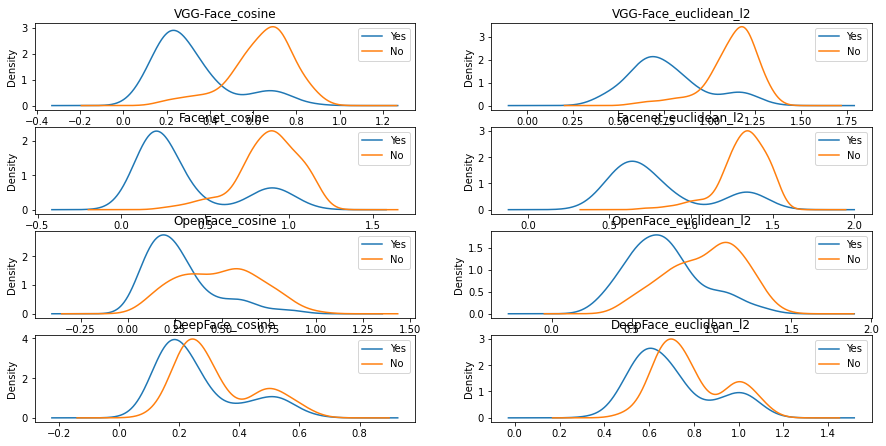

   VGG-Face_cosine  VGG-Face_euclidean_l2  Facenet_cosine  \
0           0.2555                 0.7149          0.2426   
1           0.2364                 0.6876          0.2466   
2           0.3180                 0.7975          0.2591   
3           0.2974                 0.7712          0.2307   
4           0.3117                 0.7895          0.1937   

   Facenet_euclidean_l2  OpenFace_cosine  OpenFace_euclidean_l2  \
0                0.6965           0.1588                 0.5636   
1                0.7022           0.1490                 0.5459   
2                0.7198           0.0880                 0.4194   
3                0.6793           0.0874                 0.4181   
4                0.6224           0.1227                 0.4954   

   DeepFace_cosine  DeepFace_euclidean_l2 decision  
0           0.2418                 0.6954        1  
1           0.2449                 0.6999        1  
2           0.2272                 0.6740        1  
3           0.2250

NameError: name 'predictions' is not defined

In [33]:
instances = df[["file_x", "file_y"]].values.tolist()

models = ['VGG-Face', 'Facenet', 'OpenFace', 'DeepFace']
metrics = ['cosine', 'euclidean_l2']

if True:
    for model in models:
        for metric in metrics:

            resp_obj = DeepFace.verify(instances
                                       , model_name = model
                                       , model = pretrained_models[model]
                                       , distance_metric = metric
                                       , enforce_detection = False)

            distances = []

            for i in range(0, len(instances)):
                distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
                distances.append(distance)

            df['%s_%s' % (model, metric)] = distances

    df.to_csv("face-recognition-pivot.csv", index = False)
else:
    df = pd.read_csv("face-recognition-pivot.csv")

df_raw = df.copy()

#--------------------------
#Distribution

fig = plt.figure(figsize=(15, 15))

figure_idx = 1
for model in models:
    for metric in metrics:

        feature = '%s_%s' % (model, metric)

        ax1 = fig.add_subplot(len(models) * len(metrics), len(metrics), figure_idx)

        df[df.decision == "Yes"][feature].plot(kind='kde', title = feature, label = 'Yes', legend = True)
        df[df.decision == "No"][feature].plot(kind='kde', title = feature, label = 'No', legend = True)

        figure_idx = figure_idx + 1

plt.show()
#--------------------------
#Pre-processing for modelling

columns = []
for model in models:
    for metric in metrics:
        feature = '%s_%s' % (model, metric)
        columns.append(feature)

columns.append("decision")

df = df[columns]

df.loc[df[df.decision == 'Yes'].index, 'decision'] = 1
df.loc[df[df.decision == 'No'].index, 'decision'] = 0

print(df.head())
#--------------------------
#Train test split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.30, random_state=17)

target_name = "decision"

y_train = df_train[target_name].values
x_train = df_train.drop(columns=[target_name]).values

y_test = df_test[target_name].values
x_test = df_test.drop(columns=[target_name]).values

#--------------------------
#LightGBM

import lightgbm as lgb

features = df.drop(columns=[target_name]).columns.tolist()
lgb_train = lgb.Dataset(x_train, y_train, feature_name = features)
lgb_test = lgb.Dataset(x_test, y_test, feature_name = features)

params = {
    'task': 'train'
    , 'boosting_type': 'gbdt'
    , 'objective': 'multiclass'
    , 'num_class': 2
    , 'metric': 'multi_logloss'
}

gbm = lgb.train(params, lgb_train, num_boost_round=250, early_stopping_rounds = 15 , valid_sets=lgb_test)

gbm.save_model("face-recognition-ensemble-model.txt")

#--------------------------
#Evaluation


#--------------------------

In [38]:

predictions = gbm.predict(x_test)

[1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1
 1 0 1 0 0 1 0 0 1 1]
------
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
[[38  3]
 [ 6 37]]
Precision:  92.5 %
Recall:  86.04651162790698 %
F1 score  89.1566265060241 %
Accuracy:  89.28571428571429 %


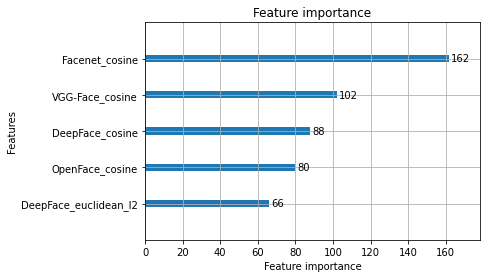

ImportError: You must install graphviz and restart your session to plot tree.

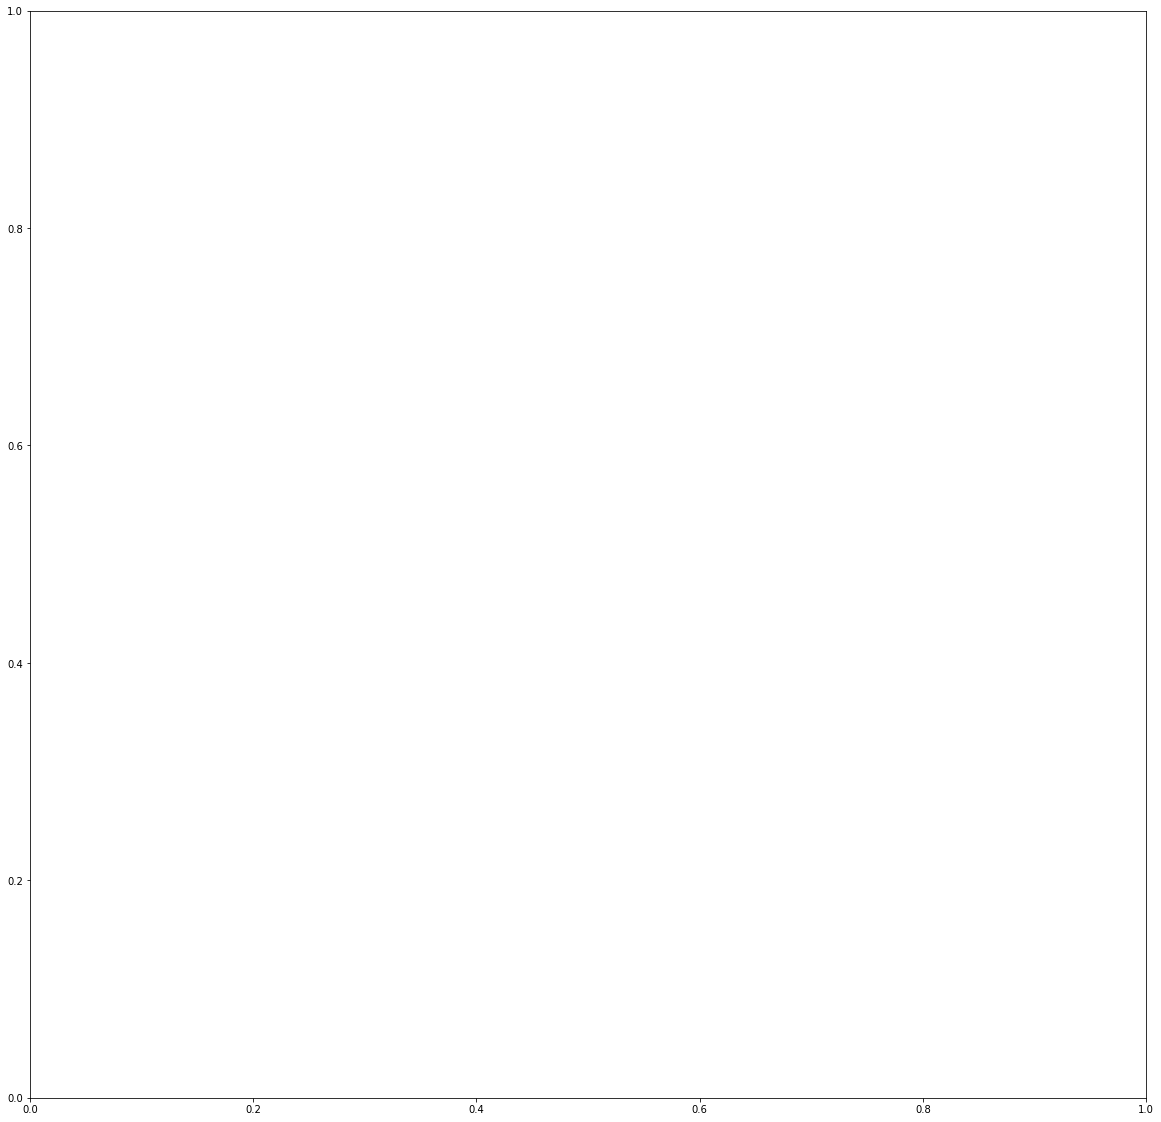

In [51]:

predictions = gbm.predict(x_test)

prediction_classes = []
for prediction in predictions:
    prediction_class = np.argmax(prediction)
    prediction_classes.append(prediction_class)

print(y_test)
print("------")
print(prediction_classes)

cm = confusion_matrix(y_test_1, prediction_classes)
print(cm)

tn, fp, fn, tp = cm.ravel()

recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")
#--------------------------
#Interpretability

ax = lgb.plot_importance(gbm, max_num_features=20)
plt.show()

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

plt.rcParams["figure.figsize"] = [20, 20]

for i in range(0, gbm.num_trees()):
    ax = lgb.plot_tree(gbm, tree_index = i)
    plt.show()

    if i == 2:
        break
#--------------------------
#ROC Curve

y_pred_proba = predictions[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7,3))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

In [50]:
y_test_1=[]
for i in y_test:
    y_test_1.append(i)

In [47]:
prediction_classesl

NameError: name 'prediction_classesl' is not defined

In [28]:
from deepface import DeepFace
from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace

pretrained_models = {}

pretrained_models["VGG-Face"] = VGGFace.loadModel()
print("VGG-Face loaded")
pretrained_models["Facenet"] = Facenet.loadModel()
print("Facenet loaded")
pretrained_models["OpenFace"] = OpenFace.loadModel()
print("OpenFace loaded")
pretrained_models["DeepFace"] = FbDeepFace.loadModel()
print("FbDeepFace loaded")

instances = df[["file_x", "file_y"]].values.tolist()

models = ['Ensemble']
metrics = ['cosine']

if True:
    for model in models:
        for metric in metrics:

            resp_obj = DeepFace.verify(instances
                                       , model_name=model
                                       , model=pretrained_models[model]
                                       , distance_metric=metric)

            distances = []

            for i in range(0, len(instances)):
                distance = round(resp_obj["pair_%s" % (i + 1)]["distance"], 4)
                distances.append(distance)

            df['%s_%s' % (model, metric)] = distances

    df.to_csv("face-recognition-pivot_new.csv", index=False)

VGG-Face loaded
Facenet loaded
OpenFace loaded
FbDeepFace loaded


Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/300 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/300 [00:00<04:22,  1.14it/s]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▊                                                                                                                                                                                                                                                                        | 2/300 [00:01<04:32,  1.09it/s]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|██▋                                                                                                                                                                                                                                                                       | 3/300 [00:02<03:47,  1.30it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|███▌                                                                                                                                                                                                                                                                      | 4/300 [00:03<04:13,  1.17it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▍                                                                                                                                                                                                                                                                     | 5/300 [00:04<04:09,  1.18it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)
(280, 280, 3)


Verification:   2%|█████▎                                                                                                                                                                                                                                                                    | 6/300 [00:04<03:43,  1.32it/s]

ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██████▏                                                                                                                                                                                                                                                                   | 7/300 [00:05<03:28,  1.40it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|███████                                                                                                                                                                                                                                                                   | 8/300 [00:06<03:36,  1.35it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|███████▉                                                                                                                                                                                                                                                                  | 9/300 [00:06<03:17,  1.47it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|████████▊                                                                                                                                                                                                                                                                | 10/300 [00:07<03:13,  1.50it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|█████████▋                                                                                                                                                                                                                                                               | 11/300 [00:08<03:25,  1.41it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|██████████▌                                                                                                                                                                                                                                                              | 12/300 [00:08<03:10,  1.51it/s]

ensemble_features []
(512, 512, 3)


Verification:   4%|███████████▍                                                                                                                                                                                                                                                             | 13/300 [00:09<03:06,  1.54it/s]

(353, 353, 3)
ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 14/300 [00:10<03:04,  1.55it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 15/300 [00:10<03:05,  1.54it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 16/300 [00:11<03:25,  1.38it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|███████████████                                                                                                                                                                                                                                                          | 17/300 [00:12<03:14,  1.45it/s]

ensemble_features []
(919, 919, 3)
(353, 353, 3)


Verification:   6%|███████████████▉                                                                                                                                                                                                                                                         | 18/300 [00:12<03:09,  1.49it/s]

ensemble_features []
(242, 242, 3)


Verification:   6%|████████████████▊                                                                                                                                                                                                                                                        | 19/300 [00:13<02:44,  1.70it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████████████████▋                                                                                                                                                                                                                                                       | 20/300 [00:13<02:42,  1.72it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|██████████████████▌                                                                                                                                                                                                                                                      | 21/300 [00:14<02:22,  1.95it/s]

(280, 280, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|███████████████████▍                                                                                                                                                                                                                                                     | 22/300 [00:14<02:10,  2.13it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|████████████████████▎                                                                                                                                                                                                                                                    | 23/300 [00:15<02:23,  1.93it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   8%|█████████████████████▏                                                                                                                                                                                                                                                   | 24/300 [00:15<02:13,  2.07it/s]

ensemble_features []
(531, 531, 3)


Verification:   8%|██████████████████████                                                                                                                                                                                                                                                   | 25/300 [00:15<02:08,  2.15it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|██████████████████████▉                                                                                                                                                                                                                                                  | 26/300 [00:16<02:17,  2.00it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                 | 27/300 [00:17<02:24,  1.89it/s]

ensemble_features []
(280, 280, 3)


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                | 28/300 [00:17<02:10,  2.08it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 29/300 [00:18<02:17,  1.97it/s]

(634, 634, 3)
ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 30/300 [00:18<02:36,  1.73it/s]

ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 31/300 [00:19<02:37,  1.71it/s]

ensemble_features []
(530, 530, 3)


Verification:  11%|████████████████████████████▎                                                                                                                                                                                                                                            | 32/300 [00:20<02:45,  1.62it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  11%|█████████████████████████████▏                                                                                                                                                                                                                                           | 33/300 [00:20<02:29,  1.79it/s]

(355, 355, 3)
ensemble_features []
(248, 248, 3)


Verification:  11%|██████████████████████████████                                                                                                                                                                                                                                           | 34/300 [00:20<02:11,  2.02it/s]

(270, 270, 3)
ensemble_features []
(526, 526, 3)


Verification:  12%|██████████████████████████████▉                                                                                                                                                                                                                                          | 35/300 [00:21<02:15,  1.95it/s]

(684, 684, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  12%|███████████████████████████████▊                                                                                                                                                                                                                                         | 36/300 [00:21<02:04,  2.11it/s]

ensemble_features []
(349, 349, 3)


Verification:  12%|████████████████████████████████▋                                                                                                                                                                                                                                        | 37/300 [00:22<02:34,  1.71it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  13%|█████████████████████████████████▌                                                                                                                                                                                                                                       | 38/300 [00:23<02:21,  1.85it/s]

ensemble_features []
(769, 769, 3)


Verification:  13%|██████████████████████████████████▍                                                                                                                                                                                                                                      | 39/300 [00:23<02:29,  1.75it/s]

(320, 320, 3)
ensemble_features []
(769, 769, 3)


Verification:  13%|███████████████████████████████████▎                                                                                                                                                                                                                                     | 40/300 [00:24<02:43,  1.59it/s]

(634, 634, 3)
ensemble_features []
(512, 512, 3)


Verification:  14%|████████████████████████████████████▏                                                                                                                                                                                                                                    | 41/300 [00:25<02:41,  1.61it/s]

(320, 320, 3)
ensemble_features []
(512, 512, 3)


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                    | 42/300 [00:25<02:47,  1.54it/s]

(634, 634, 3)
ensemble_features []
(919, 919, 3)


Verification:  14%|█████████████████████████████████████▉                                                                                                                                                                                                                                   | 43/300 [00:26<02:49,  1.51it/s]

(320, 320, 3)
ensemble_features []
(919, 919, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 44/300 [00:27<02:58,  1.43it/s]

(634, 634, 3)
ensemble_features []
(242, 242, 3)


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 45/300 [00:27<02:35,  1.64it/s]

(320, 320, 3)
ensemble_features []
(242, 242, 3)


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 46/300 [00:28<02:26,  1.74it/s]

(634, 634, 3)
ensemble_features []
(531, 531, 3)


Verification:  16%|█████████████████████████████████████████▌                                                                                                                                                                                                                               | 47/300 [00:28<02:21,  1.79it/s]

(320, 320, 3)
ensemble_features []
(531, 531, 3)


Verification:  16%|██████████████████████████████████████████▍                                                                                                                                                                                                                              | 48/300 [00:29<02:23,  1.76it/s]

(634, 634, 3)
ensemble_features []
(746, 746, 3)


Verification:  16%|███████████████████████████████████████████▎                                                                                                                                                                                                                             | 49/300 [00:30<02:31,  1.66it/s]

(320, 320, 3)
ensemble_features []
(746, 746, 3)


Verification:  17%|████████████████████████████████████████████▏                                                                                                                                                                                                                            | 50/300 [00:30<02:41,  1.54it/s]

(634, 634, 3)
ensemble_features []
(280, 280, 3)


Verification:  17%|█████████████████████████████████████████████                                                                                                                                                                                                                            | 51/300 [00:31<02:24,  1.73it/s]

(320, 320, 3)
ensemble_features []
(280, 280, 3)


Verification:  17%|█████████████████████████████████████████████▉                                                                                                                                                                                                                           | 52/300 [00:31<02:20,  1.76it/s]

(634, 634, 3)
ensemble_features []
(353, 353, 3)


Verification:  18%|██████████████████████████████████████████████▊                                                                                                                                                                                                                          | 53/300 [00:32<02:12,  1.86it/s]

(320, 320, 3)
ensemble_features []
(353, 353, 3)


Verification:  18%|███████████████████████████████████████████████▋                                                                                                                                                                                                                         | 54/300 [00:32<02:18,  1.78it/s]

(634, 634, 3)
ensemble_features []
(769, 769, 3)


Verification:  18%|████████████████████████████████████████████████▌                                                                                                                                                                                                                        | 55/300 [00:33<02:51,  1.43it/s]

(835, 835, 3)
ensemble_features []
(769, 769, 3)
(170, 170, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                       | 56/300 [00:34<02:43,  1.49it/s]

ensemble_features []
(512, 512, 3)


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 57/300 [00:35<03:03,  1.32it/s]

(835, 835, 3)
ensemble_features []
(512, 512, 3)
(170, 170, 3)


Verification:  19%|███████████████████████████████████████████████████▏                                                                                                                                                                                                                     | 58/300 [00:35<02:50,  1.42it/s]

ensemble_features []
(919, 919, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 59/300 [00:37<03:16,  1.23it/s]

(835, 835, 3)
ensemble_features []
(919, 919, 3)
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 60/300 [00:37<03:01,  1.32it/s]

ensemble_features []
(242, 242, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 61/300 [00:38<03:04,  1.30it/s]

(835, 835, 3)
ensemble_features []
(242, 242, 3)


Verification:  21%|██████████████████████████████████████████████████████▊                                                                                                                                                                                                                  | 62/300 [00:38<02:33,  1.55it/s]

(170, 170, 3)
ensemble_features []
(531, 531, 3)


Verification:  21%|███████████████████████████████████████████████████████▋                                                                                                                                                                                                                 | 63/300 [00:39<02:45,  1.43it/s]

(835, 835, 3)
ensemble_features []
(531, 531, 3)
(170, 170, 3)


Verification:  21%|████████████████████████████████████████████████████████▌                                                                                                                                                                                                                | 64/300 [00:40<02:25,  1.62it/s]

ensemble_features []
(746, 746, 3)


Verification:  22%|█████████████████████████████████████████████████████████▍                                                                                                                                                                                                               | 65/300 [00:41<02:51,  1.37it/s]

(835, 835, 3)
ensemble_features []
(746, 746, 3)
(170, 170, 3)


Verification:  22%|██████████████████████████████████████████████████████████▎                                                                                                                                                                                                              | 66/300 [00:41<02:42,  1.44it/s]

ensemble_features []
(280, 280, 3)


Verification:  22%|███████████████████████████████████████████████████████████▏                                                                                                                                                                                                             | 67/300 [00:42<02:46,  1.40it/s]

(835, 835, 3)
ensemble_features []
(280, 280, 3)


Verification:  23%|████████████████████████████████████████████████████████████                                                                                                                                                                                                             | 68/300 [00:42<02:21,  1.64it/s]

(170, 170, 3)
ensemble_features []
(353, 353, 3)


Verification:  23%|████████████████████████████████████████████████████████████▉                                                                                                                                                                                                            | 69/300 [00:43<02:36,  1.48it/s]

(835, 835, 3)
ensemble_features []
(353, 353, 3)
(170, 170, 3)


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                           | 70/300 [00:44<02:14,  1.70it/s]

ensemble_features []
(769, 769, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 71/300 [00:44<02:35,  1.47it/s]

(530, 530, 3)
ensemble_features []
(769, 769, 3)
(196, 196, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 72/300 [00:45<02:30,  1.52it/s]

ensemble_features []
(769, 769, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                        | 73/300 [00:46<02:29,  1.52it/s]

(355, 355, 3)
ensemble_features []
(512, 512, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 74/300 [00:46<02:38,  1.42it/s]

(530, 530, 3)
ensemble_features []
(512, 512, 3)
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 75/300 [00:47<02:26,  1.53it/s]

ensemble_features []
(512, 512, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 76/300 [00:48<02:23,  1.56it/s]

(355, 355, 3)
ensemble_features []
(919, 919, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████                                                                                                                                                                                                     | 77/300 [00:48<02:38,  1.41it/s]

(530, 530, 3)
ensemble_features []
(919, 919, 3)
(196, 196, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                    | 78/300 [00:49<02:33,  1.45it/s]

ensemble_features []
(919, 919, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                   | 79/300 [00:50<02:31,  1.46it/s]

(355, 355, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                  | 80/300 [00:50<02:25,  1.52it/s]

(530, 530, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                 | 81/300 [00:51<02:03,  1.77it/s]

(196, 196, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                | 82/300 [00:51<01:54,  1.91it/s]

(355, 355, 3)
ensemble_features []
(531, 531, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                               | 83/300 [00:52<02:03,  1.76it/s]

(530, 530, 3)
ensemble_features []
(531, 531, 3)
(196, 196, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                              | 84/300 [00:52<01:51,  1.94it/s]

ensemble_features []
(531, 531, 3)


Verification:  28%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 85/300 [00:53<01:48,  1.98it/s]

(355, 355, 3)
ensemble_features []
(746, 746, 3)


Verification:  29%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 86/300 [00:54<02:10,  1.63it/s]

(530, 530, 3)
ensemble_features []
(746, 746, 3)
(196, 196, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                            | 87/300 [00:54<02:08,  1.66it/s]

ensemble_features []
(746, 746, 3)


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                           | 88/300 [00:55<02:10,  1.62it/s]

(355, 355, 3)
ensemble_features []
(280, 280, 3)


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 89/300 [00:55<02:08,  1.64it/s]

(530, 530, 3)
ensemble_features []
(280, 280, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 90/300 [00:56<01:51,  1.89it/s]

(196, 196, 3)
ensemble_features []
(280, 280, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 91/300 [00:56<01:46,  1.97it/s]

(355, 355, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                       | 92/300 [00:57<01:54,  1.81it/s]

(530, 530, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                      | 93/300 [00:57<01:43,  2.00it/s]

(196, 196, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                      | 94/300 [00:58<01:39,  2.08it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)
(248, 248, 3)


Verification:  32%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                     | 95/300 [00:58<01:45,  1.94it/s]

ensemble_features []
(769, 769, 3)
(270, 270, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                    | 96/300 [00:59<01:49,  1.86it/s]

ensemble_features []
(512, 512, 3)
(248, 248, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                   | 97/300 [00:59<01:48,  1.86it/s]

ensemble_features []
(512, 512, 3)
(270, 270, 3)


Verification:  33%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                  | 98/300 [01:00<01:48,  1.87it/s]

ensemble_features []
(919, 919, 3)
(248, 248, 3)


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                 | 99/300 [01:01<01:52,  1.79it/s]

ensemble_features []
(919, 919, 3)
(270, 270, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                | 100/300 [01:01<01:56,  1.71it/s]

ensemble_features []
(242, 242, 3)


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 101/300 [01:02<01:41,  1.96it/s]

(248, 248, 3)
ensemble_features []
(242, 242, 3)


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 102/300 [01:02<01:30,  2.19it/s]

(270, 270, 3)
ensemble_features []
(531, 531, 3)
(248, 248, 3)


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                             | 103/300 [01:02<01:25,  2.29it/s]

ensemble_features []
(531, 531, 3)


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                            | 104/300 [01:03<01:23,  2.36it/s]

(270, 270, 3)
ensemble_features []
(746, 746, 3)
(248, 248, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                           | 105/300 [01:03<01:31,  2.14it/s]

ensemble_features []
(746, 746, 3)
(270, 270, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                          | 106/300 [01:04<01:37,  1.99it/s]

ensemble_features []
(280, 280, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                         | 107/300 [01:04<01:27,  2.21it/s]

(248, 248, 3)
ensemble_features []
(280, 280, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                         | 108/300 [01:04<01:20,  2.39it/s]

(270, 270, 3)
ensemble_features []
(353, 353, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                        | 109/300 [01:05<01:16,  2.50it/s]

(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  37%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                       | 110/300 [01:05<01:13,  2.58it/s]

(270, 270, 3)
ensemble_features []
(769, 769, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                      | 111/300 [01:06<01:29,  2.12it/s]

(526, 526, 3)
ensemble_features []
(769, 769, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                     | 112/300 [01:07<01:41,  1.84it/s]

(684, 684, 3)
ensemble_features []
(512, 512, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                    | 113/300 [01:07<01:44,  1.78it/s]

(526, 526, 3)
ensemble_features []
(512, 512, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                   | 114/300 [01:08<01:49,  1.70it/s]

(684, 684, 3)
ensemble_features []
(919, 919, 3)


Verification:  38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 115/300 [01:09<01:53,  1.62it/s]

(526, 526, 3)
ensemble_features []
(919, 919, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 116/300 [01:09<01:59,  1.54it/s]

(684, 684, 3)
ensemble_features []
(242, 242, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                 | 117/300 [01:10<01:45,  1.73it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                | 118/300 [01:10<01:38,  1.85it/s]

(684, 684, 3)
ensemble_features []
(531, 531, 3)


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 119/300 [01:11<01:33,  1.93it/s]

(526, 526, 3)
ensemble_features []
(531, 531, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 120/300 [01:11<01:32,  1.94it/s]

(684, 684, 3)
ensemble_features []
(746, 746, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                             | 121/300 [01:12<01:39,  1.80it/s]

(526, 526, 3)
ensemble_features []
(746, 746, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                            | 122/300 [01:12<01:45,  1.68it/s]

(684, 684, 3)
ensemble_features []
(280, 280, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                           | 123/300 [01:13<01:36,  1.84it/s]

(526, 526, 3)
ensemble_features []
(280, 280, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                           | 124/300 [01:13<01:31,  1.93it/s]

(684, 684, 3)
ensemble_features []
(353, 353, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 125/300 [01:14<01:26,  2.03it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                         | 126/300 [01:14<01:25,  2.05it/s]

(684, 684, 3)
ensemble_features []
(769, 769, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                        | 127/300 [01:15<01:32,  1.88it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(276, 276, 3)


Verification:  43%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                       | 128/300 [01:15<01:36,  1.78it/s]

ensemble_features []
(512, 512, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 129/300 [01:16<01:37,  1.76it/s]

(371, 371, 3)
ensemble_features []
(512, 512, 3)
(276, 276, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 130/300 [01:17<01:35,  1.79it/s]

ensemble_features []
(919, 919, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                    | 131/300 [01:17<01:39,  1.71it/s]

(371, 371, 3)
ensemble_features []
(919, 919, 3)
(276, 276, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                   | 132/300 [01:18<01:40,  1.68it/s]

ensemble_features []
(242, 242, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                   | 133/300 [01:18<01:28,  1.88it/s]

(371, 371, 3)
ensemble_features []
(242, 242, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                  | 134/300 [01:19<01:19,  2.10it/s]

(276, 276, 3)
ensemble_features []
(531, 531, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 135/300 [01:19<01:16,  2.16it/s]

(371, 371, 3)
ensemble_features []
(531, 531, 3)
(276, 276, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 136/300 [01:19<01:12,  2.27it/s]

ensemble_features []
(746, 746, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                               | 137/300 [01:20<01:20,  2.02it/s]

(371, 371, 3)
ensemble_features []
(746, 746, 3)
(276, 276, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                              | 138/300 [01:21<01:23,  1.95it/s]

ensemble_features []
(280, 280, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 139/300 [01:21<01:16,  2.11it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                            | 140/300 [01:21<01:09,  2.32it/s]

(276, 276, 3)
ensemble_features []
(353, 353, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                            | 141/300 [01:22<01:07,  2.35it/s]

(371, 371, 3)
ensemble_features []
(353, 353, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 142/300 [01:22<01:03,  2.47it/s]

(276, 276, 3)
ensemble_features []
(769, 769, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 143/300 [01:23<01:16,  2.04it/s]

(349, 349, 3)
ensemble_features []
(769, 769, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                         | 144/300 [01:24<01:39,  1.56it/s]

(721, 721, 3)
ensemble_features []
(512, 512, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                        | 145/300 [01:24<01:38,  1.57it/s]

(349, 349, 3)
ensemble_features []
(512, 512, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                       | 146/300 [01:25<01:52,  1.37it/s]

(721, 721, 3)
ensemble_features []
(919, 919, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 147/300 [01:26<01:51,  1.37it/s]

(349, 349, 3)
ensemble_features []
(919, 919, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                     | 148/300 [01:27<02:04,  1.22it/s]

(721, 721, 3)
ensemble_features []
(242, 242, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 149/300 [01:28<01:46,  1.42it/s]

(349, 349, 3)
ensemble_features []
(242, 242, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 150/300 [01:28<01:46,  1.40it/s]

(721, 721, 3)
ensemble_features []
(531, 531, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 151/300 [01:29<01:36,  1.54it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 152/300 [01:30<01:42,  1.45it/s]

(721, 721, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                 | 153/300 [01:30<01:41,  1.45it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                | 154/300 [01:31<01:54,  1.28it/s]

(721, 721, 3)
ensemble_features []
(280, 280, 3)


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                               | 155/300 [01:32<01:39,  1.46it/s]

(349, 349, 3)
ensemble_features []
(280, 280, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                              | 156/300 [01:33<01:46,  1.35it/s]

(721, 721, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 157/300 [01:33<01:35,  1.49it/s]

(349, 349, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 158/300 [01:34<01:40,  1.41it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)
(656, 656, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                            | 159/300 [01:35<02:00,  1.17it/s]

ensemble_features []
(769, 769, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                           | 160/300 [01:36<01:56,  1.21it/s]

(222, 222, 3)
ensemble_features []
(512, 512, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 161/300 [01:37<01:50,  1.25it/s]

(656, 656, 3)
ensemble_features []
(512, 512, 3)
(222, 222, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 162/300 [01:37<01:39,  1.38it/s]

ensemble_features []
(919, 919, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 163/300 [01:38<01:41,  1.35it/s]

(656, 656, 3)
ensemble_features []
(919, 919, 3)
(222, 222, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 164/300 [01:38<01:35,  1.43it/s]

ensemble_features []
(242, 242, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 165/300 [01:39<01:27,  1.55it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)
(222, 222, 3)


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                      | 166/300 [01:39<01:14,  1.79it/s]

ensemble_features []
(531, 531, 3)


Verification:  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                     | 167/300 [01:40<01:13,  1.82it/s]

(656, 656, 3)
ensemble_features []
(531, 531, 3)
(222, 222, 3)


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                    | 168/300 [01:40<01:06,  1.99it/s]

ensemble_features []
(746, 746, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 169/300 [01:41<01:14,  1.76it/s]

(656, 656, 3)
ensemble_features []
(746, 746, 3)
(222, 222, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                  | 170/300 [01:42<01:16,  1.70it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 171/300 [01:42<01:12,  1.78it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 172/300 [01:43<01:05,  1.95it/s]

(222, 222, 3)
ensemble_features []
(353, 353, 3)


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                               | 173/300 [01:43<01:05,  1.92it/s]

(656, 656, 3)
ensemble_features []
(353, 353, 3)
(222, 222, 3)


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 174/300 [01:43<01:00,  2.08it/s]

ensemble_features []
(320, 320, 3)


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                              | 175/300 [01:44<01:16,  1.64it/s]

(835, 835, 3)
ensemble_features []
(320, 320, 3)
(170, 170, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                             | 176/300 [01:45<01:09,  1.78it/s]

ensemble_features []
(634, 634, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                            | 177/300 [01:46<01:24,  1.45it/s]

(835, 835, 3)
ensemble_features []
(634, 634, 3)
(170, 170, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                           | 178/300 [01:46<01:20,  1.52it/s]

ensemble_features []
(320, 320, 3)


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                          | 179/300 [01:47<01:20,  1.50it/s]

(530, 530, 3)
ensemble_features []
(320, 320, 3)
(196, 196, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 180/300 [01:47<01:11,  1.68it/s]

ensemble_features []
(320, 320, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 181/300 [01:48<01:06,  1.79it/s]

(355, 355, 3)
ensemble_features []
(634, 634, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 182/300 [01:49<01:16,  1.55it/s]

(530, 530, 3)
ensemble_features []
(634, 634, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 183/300 [01:49<01:13,  1.59it/s]

(196, 196, 3)
ensemble_features []
(634, 634, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                      | 184/300 [01:50<01:14,  1.56it/s]

(355, 355, 3)
ensemble_features []
(320, 320, 3)
(248, 248, 3)


Verification:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 185/300 [01:51<01:07,  1.70it/s]

ensemble_features []
(320, 320, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 186/300 [01:51<01:03,  1.80it/s]

(270, 270, 3)
ensemble_features []
(634, 634, 3)
(248, 248, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 187/300 [01:52<01:04,  1.76it/s]

ensemble_features []
(634, 634, 3)
(270, 270, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 188/300 [01:52<01:03,  1.77it/s]

ensemble_features []
(320, 320, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 189/300 [01:53<01:01,  1.80it/s]

(526, 526, 3)
ensemble_features []
(320, 320, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 190/300 [01:53<01:03,  1.72it/s]

(684, 684, 3)
ensemble_features []
(634, 634, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 191/300 [01:54<01:04,  1.69it/s]

(526, 526, 3)
ensemble_features []
(634, 634, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 192/300 [01:55<01:07,  1.59it/s]

(684, 684, 3)
ensemble_features []
(320, 320, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 193/300 [01:55<01:05,  1.63it/s]

(371, 371, 3)
ensemble_features []
(320, 320, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 194/300 [01:56<01:01,  1.73it/s]

(276, 276, 3)
ensemble_features []
(634, 634, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 195/300 [01:56<00:59,  1.75it/s]

(371, 371, 3)
ensemble_features []
(634, 634, 3)
(276, 276, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 196/300 [01:57<00:57,  1.82it/s]

ensemble_features []
(320, 320, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 197/300 [01:57<00:55,  1.84it/s]

(349, 349, 3)
ensemble_features []
(320, 320, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 198/300 [01:58<01:05,  1.56it/s]

(721, 721, 3)
ensemble_features []
(634, 634, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/300 [01:59<01:05,  1.54it/s]

(349, 349, 3)
ensemble_features []
(634, 634, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 200/300 [02:00<01:15,  1.33it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 201/300 [02:01<01:11,  1.38it/s]

(656, 656, 3)
ensemble_features []
(320, 320, 3)
(222, 222, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 202/300 [02:01<01:02,  1.58it/s]

ensemble_features []
(634, 634, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 203/300 [02:02<01:03,  1.53it/s]

(656, 656, 3)
ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 204/300 [02:02<00:58,  1.65it/s]

ensemble_features []
(835, 835, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 205/300 [02:03<01:10,  1.35it/s]

(530, 530, 3)
ensemble_features []
(835, 835, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 206/300 [02:04<01:14,  1.27it/s]

(196, 196, 3)
ensemble_features []
(835, 835, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 207/300 [02:05<01:17,  1.20it/s]

(355, 355, 3)
ensemble_features []
(170, 170, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 208/300 [02:06<01:15,  1.22it/s]

(530, 530, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 209/300 [02:06<01:04,  1.42it/s]

(196, 196, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 210/300 [02:07<00:57,  1.58it/s]

(355, 355, 3)
ensemble_features []
(835, 835, 3)
(248, 248, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 211/300 [02:07<01:00,  1.48it/s]

ensemble_features []
(835, 835, 3)
(270, 270, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 212/300 [02:08<01:03,  1.40it/s]

ensemble_features []
(170, 170, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 213/300 [02:09<00:52,  1.66it/s]

(248, 248, 3)
ensemble_features []
(170, 170, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 214/300 [02:09<00:45,  1.91it/s]

(270, 270, 3)
ensemble_features []
(835, 835, 3)


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 215/300 [02:10<00:52,  1.61it/s]

(526, 526, 3)
ensemble_features []
(835, 835, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 216/300 [02:11<00:58,  1.43it/s]

(684, 684, 3)
ensemble_features []
(170, 170, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 217/300 [02:11<00:51,  1.61it/s]

(526, 526, 3)
ensemble_features []
(170, 170, 3)


Verification:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 218/300 [02:12<00:47,  1.74it/s]

(684, 684, 3)
ensemble_features []
(835, 835, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 219/300 [02:12<00:52,  1.54it/s]

(371, 371, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 220/300 [02:13<00:55,  1.44it/s]

ensemble_features []
(170, 170, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 221/300 [02:14<00:47,  1.65it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 222/300 [02:14<00:41,  1.89it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 223/300 [02:15<00:49,  1.55it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 224/300 [02:16<01:01,  1.24it/s]

(721, 721, 3)
ensemble_features []
(170, 170, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 225/300 [02:17<00:52,  1.43it/s]

(349, 349, 3)
ensemble_features []
(170, 170, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 226/300 [02:17<00:53,  1.39it/s]

(721, 721, 3)
ensemble_features []
(835, 835, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 227/300 [02:18<00:55,  1.32it/s]

(656, 656, 3)
ensemble_features []
(835, 835, 3)
(222, 222, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 228/300 [02:19<00:54,  1.33it/s]

ensemble_features []
(170, 170, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 229/300 [02:19<00:46,  1.51it/s]

(656, 656, 3)
ensemble_features []
(170, 170, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 230/300 [02:20<00:39,  1.77it/s]

(222, 222, 3)
ensemble_features []
(530, 530, 3)
(248, 248, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 231/300 [02:20<00:40,  1.72it/s]

ensemble_features []
(530, 530, 3)
(270, 270, 3)


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 232/300 [02:21<00:41,  1.66it/s]

ensemble_features []
(196, 196, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 233/300 [02:21<00:35,  1.88it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 234/300 [02:22<00:32,  2.06it/s]

(270, 270, 3)
ensemble_features []
(355, 355, 3)
(248, 248, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 235/300 [02:22<00:31,  2.09it/s]

ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 236/300 [02:23<00:29,  2.17it/s]

(270, 270, 3)
ensemble_features []
(530, 530, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 237/300 [02:23<00:33,  1.89it/s]

(526, 526, 3)
ensemble_features []


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 237/300 [02:24<00:38,  1.64it/s]

(530, 530, 3)


KeyboardInterrupt: 

In [25]:
instances = df[["file_x", "file_y"]].values.tolist()

In [83]:
model_name = "VGG-Face"
distance_metric = "cosine"

In [76]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification:   0%|                                                                                                                                                                                                                                                                                  | 0/300 [00:00<?, ?it/s]

(769, 769, 3)


Verification:   0%|▉                                                                                                                                                                                                                                                                         | 1/300 [00:01<05:38,  1.13s/it]

(512, 512, 3)
ensemble_features []
(769, 769, 3)


Verification:   1%|█▊                                                                                                                                                                                                                                                                        | 2/300 [00:02<05:08,  1.03s/it]

(919, 919, 3)
ensemble_features []
(769, 769, 3)
(242, 242, 3)


Verification:   1%|██▋                                                                                                                                                                                                                                                                       | 3/300 [00:02<04:06,  1.21it/s]

ensemble_features []
(769, 769, 3)


Verification:   1%|███▌                                                                                                                                                                                                                                                                      | 4/300 [00:03<03:43,  1.32it/s]

(531, 531, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|████▍                                                                                                                                                                                                                                                                     | 5/300 [00:04<03:49,  1.28it/s]

(746, 746, 3)
ensemble_features []
(769, 769, 3)


Verification:   2%|█████▎                                                                                                                                                                                                                                                                    | 6/300 [00:04<03:38,  1.35it/s]

(280, 280, 3)
ensemble_features []
(769, 769, 3)
(353, 353, 3)


Verification:   2%|██████▏                                                                                                                                                                                                                                                                   | 7/300 [00:05<03:25,  1.43it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|███████                                                                                                                                                                                                                                                                   | 8/300 [00:06<03:38,  1.34it/s]

(919, 919, 3)
ensemble_features []
(512, 512, 3)
(242, 242, 3)


Verification:   3%|███████▉                                                                                                                                                                                                                                                                  | 9/300 [00:06<03:17,  1.47it/s]

ensemble_features []
(512, 512, 3)


Verification:   3%|████████▊                                                                                                                                                                                                                                                                | 10/300 [00:07<03:09,  1.53it/s]

(531, 531, 3)
ensemble_features []
(512, 512, 3)


Verification:   4%|█████████▋                                                                                                                                                                                                                                                               | 11/300 [00:08<03:18,  1.46it/s]

(746, 746, 3)
ensemble_features []
(512, 512, 3)
(280, 280, 3)


Verification:   4%|██████████▌                                                                                                                                                                                                                                                              | 12/300 [00:08<03:09,  1.52it/s]

ensemble_features []
(512, 512, 3)
(353, 353, 3)


Verification:   4%|███████████▍                                                                                                                                                                                                                                                             | 13/300 [00:09<03:01,  1.58it/s]

ensemble_features []
(919, 919, 3)
(242, 242, 3)


Verification:   5%|████████████▎                                                                                                                                                                                                                                                            | 14/300 [00:09<03:01,  1.58it/s]

ensemble_features []
(919, 919, 3)


Verification:   5%|█████████████▎                                                                                                                                                                                                                                                           | 15/300 [00:10<03:10,  1.49it/s]

(531, 531, 3)
ensemble_features []
(919, 919, 3)


Verification:   5%|██████████████▏                                                                                                                                                                                                                                                          | 16/300 [00:11<03:23,  1.39it/s]

(746, 746, 3)
ensemble_features []
(919, 919, 3)
(280, 280, 3)


Verification:   6%|███████████████                                                                                                                                                                                                                                                          | 17/300 [00:12<03:14,  1.46it/s]

ensemble_features []
(919, 919, 3)


Verification:   6%|███████████████▉                                                                                                                                                                                                                                                         | 18/300 [00:12<03:15,  1.44it/s]

(353, 353, 3)
ensemble_features []
(242, 242, 3)


Verification:   6%|████████████████▊                                                                                                                                                                                                                                                        | 19/300 [00:13<02:52,  1.63it/s]

(531, 531, 3)
ensemble_features []
(242, 242, 3)


Verification:   7%|█████████████████▋                                                                                                                                                                                                                                                       | 20/300 [00:13<02:56,  1.59it/s]

(746, 746, 3)
ensemble_features []
(242, 242, 3)
(280, 280, 3)


Verification:   7%|██████████████████▌                                                                                                                                                                                                                                                      | 21/300 [00:14<02:37,  1.77it/s]

ensemble_features []
(242, 242, 3)


Verification:   7%|███████████████████▍                                                                                                                                                                                                                                                     | 22/300 [00:14<02:20,  1.98it/s]

(353, 353, 3)
ensemble_features []
(531, 531, 3)


Verification:   8%|████████████████████▎                                                                                                                                                                                                                                                    | 23/300 [00:15<02:34,  1.79it/s]

(746, 746, 3)
ensemble_features []
(531, 531, 3)
(280, 280, 3)


Verification:   8%|█████████████████████▏                                                                                                                                                                                                                                                   | 24/300 [00:15<02:21,  1.95it/s]

ensemble_features []
(531, 531, 3)


Verification:   8%|██████████████████████                                                                                                                                                                                                                                                   | 25/300 [00:16<02:13,  2.06it/s]

(353, 353, 3)
ensemble_features []
(746, 746, 3)
(280, 280, 3)


Verification:   9%|██████████████████████▉                                                                                                                                                                                                                                                  | 26/300 [00:16<02:20,  1.95it/s]

ensemble_features []
(746, 746, 3)
(353, 353, 3)


Verification:   9%|███████████████████████▊                                                                                                                                                                                                                                                 | 27/300 [00:17<02:30,  1.81it/s]

ensemble_features []
(280, 280, 3)


Verification:   9%|████████████████████████▋                                                                                                                                                                                                                                                | 28/300 [00:17<02:15,  2.01it/s]

(353, 353, 3)
ensemble_features []
(320, 320, 3)


Verification:  10%|█████████████████████████▌                                                                                                                                                                                                                                               | 29/300 [00:18<02:20,  1.93it/s]

(634, 634, 3)
ensemble_features []
(835, 835, 3)
(170, 170, 3)


Verification:  10%|██████████████████████████▌                                                                                                                                                                                                                                              | 30/300 [00:19<02:38,  1.71it/s]

ensemble_features []
(530, 530, 3)
(196, 196, 3)


Verification:  10%|███████████████████████████▍                                                                                                                                                                                                                                             | 31/300 [00:19<02:38,  1.69it/s]

ensemble_features []
(530, 530, 3)


Verification:  11%|████████████████████████████▎                                                                                                                                                                                                                                            | 32/300 [00:20<02:44,  1.63it/s]

(355, 355, 3)
ensemble_features []
(196, 196, 3)


Verification:  11%|█████████████████████████████▏                                                                                                                                                                                                                                           | 33/300 [00:20<02:30,  1.77it/s]

(355, 355, 3)
ensemble_features []
(248, 248, 3)


Verification:  11%|██████████████████████████████                                                                                                                                                                                                                                           | 34/300 [00:21<02:14,  1.98it/s]

(270, 270, 3)
ensemble_features []
(526, 526, 3)


Verification:  12%|██████████████████████████████▉                                                                                                                                                                                                                                          | 35/300 [00:21<02:18,  1.92it/s]

(684, 684, 3)
ensemble_features []
(371, 371, 3)
(276, 276, 3)


Verification:  12%|███████████████████████████████▊                                                                                                                                                                                                                                         | 36/300 [00:22<02:07,  2.07it/s]

ensemble_features []
(349, 349, 3)


Verification:  12%|████████████████████████████████▋                                                                                                                                                                                                                                        | 37/300 [00:23<02:36,  1.68it/s]

(721, 721, 3)
ensemble_features []
(656, 656, 3)
(222, 222, 3)


Verification:  13%|█████████████████████████████████▌                                                                                                                                                                                                                                       | 38/300 [00:23<02:23,  1.82it/s]

ensemble_features []
(769, 769, 3)


Verification:  13%|██████████████████████████████████▍                                                                                                                                                                                                                                      | 39/300 [00:24<02:32,  1.72it/s]

(320, 320, 3)
ensemble_features []
(769, 769, 3)


Verification:  13%|███████████████████████████████████▎                                                                                                                                                                                                                                     | 40/300 [00:25<02:52,  1.51it/s]

(634, 634, 3)
ensemble_features []
(512, 512, 3)


Verification:  14%|████████████████████████████████████▏                                                                                                                                                                                                                                    | 41/300 [00:25<02:52,  1.50it/s]

(320, 320, 3)
ensemble_features []
(512, 512, 3)


Verification:  14%|█████████████████████████████████████                                                                                                                                                                                                                                    | 42/300 [00:26<02:54,  1.48it/s]

(634, 634, 3)
ensemble_features []
(919, 919, 3)


Verification:  14%|█████████████████████████████████████▉                                                                                                                                                                                                                                   | 43/300 [00:27<02:52,  1.49it/s]

(320, 320, 3)
ensemble_features []
(919, 919, 3)


Verification:  15%|██████████████████████████████████████▊                                                                                                                                                                                                                                  | 44/300 [00:27<03:07,  1.37it/s]

(634, 634, 3)
ensemble_features []
(242, 242, 3)


Verification:  15%|███████████████████████████████████████▊                                                                                                                                                                                                                                 | 45/300 [00:28<02:45,  1.54it/s]

(320, 320, 3)
ensemble_features []
(242, 242, 3)


Verification:  15%|████████████████████████████████████████▋                                                                                                                                                                                                                                | 46/300 [00:28<02:33,  1.66it/s]

(634, 634, 3)
ensemble_features []
(531, 531, 3)


Verification:  16%|█████████████████████████████████████████▌                                                                                                                                                                                                                               | 47/300 [00:29<02:22,  1.78it/s]

(320, 320, 3)
ensemble_features []
(531, 531, 3)


Verification:  16%|██████████████████████████████████████████▍                                                                                                                                                                                                                              | 48/300 [00:29<02:21,  1.79it/s]

(634, 634, 3)
ensemble_features []
(746, 746, 3)


Verification:  16%|███████████████████████████████████████████▎                                                                                                                                                                                                                             | 49/300 [00:30<02:26,  1.72it/s]

(320, 320, 3)
ensemble_features []
(746, 746, 3)


Verification:  17%|████████████████████████████████████████████▏                                                                                                                                                                                                                            | 50/300 [00:31<02:36,  1.59it/s]

(634, 634, 3)
ensemble_features []
(280, 280, 3)


Verification:  17%|█████████████████████████████████████████████                                                                                                                                                                                                                            | 51/300 [00:31<02:19,  1.78it/s]

(320, 320, 3)
ensemble_features []
(280, 280, 3)


Verification:  17%|█████████████████████████████████████████████▉                                                                                                                                                                                                                           | 52/300 [00:32<02:15,  1.83it/s]

(634, 634, 3)
ensemble_features []
(353, 353, 3)


Verification:  18%|██████████████████████████████████████████████▊                                                                                                                                                                                                                          | 53/300 [00:32<02:05,  1.97it/s]

(320, 320, 3)
ensemble_features []
(353, 353, 3)


Verification:  18%|███████████████████████████████████████████████▋                                                                                                                                                                                                                         | 54/300 [00:33<02:06,  1.94it/s]

(634, 634, 3)
ensemble_features []
(769, 769, 3)


Verification:  18%|████████████████████████████████████████████████▌                                                                                                                                                                                                                        | 55/300 [00:34<02:41,  1.51it/s]

(835, 835, 3)
ensemble_features []
(769, 769, 3)
(170, 170, 3)


Verification:  19%|█████████████████████████████████████████████████▍                                                                                                                                                                                                                       | 56/300 [00:34<02:39,  1.53it/s]

ensemble_features []
(512, 512, 3)


Verification:  19%|██████████████████████████████████████████████████▎                                                                                                                                                                                                                      | 57/300 [00:35<03:02,  1.33it/s]

(835, 835, 3)
ensemble_features []
(512, 512, 3)
(170, 170, 3)


Verification:  19%|███████████████████████████████████████████████████▏                                                                                                                                                                                                                     | 58/300 [00:36<02:45,  1.46it/s]

ensemble_features []
(919, 919, 3)


Verification:  20%|████████████████████████████████████████████████████                                                                                                                                                                                                                     | 59/300 [00:37<03:08,  1.28it/s]

(835, 835, 3)
ensemble_features []
(919, 919, 3)
(170, 170, 3)


Verification:  20%|█████████████████████████████████████████████████████                                                                                                                                                                                                                    | 60/300 [00:37<02:55,  1.37it/s]

ensemble_features []
(242, 242, 3)


Verification:  20%|█████████████████████████████████████████████████████▉                                                                                                                                                                                                                   | 61/300 [00:38<02:57,  1.35it/s]

(835, 835, 3)
ensemble_features []
(242, 242, 3)


Verification:  21%|██████████████████████████████████████████████████████▊                                                                                                                                                                                                                  | 62/300 [00:39<02:28,  1.60it/s]

(170, 170, 3)
ensemble_features []
(531, 531, 3)


Verification:  21%|███████████████████████████████████████████████████████▋                                                                                                                                                                                                                 | 63/300 [00:39<02:40,  1.47it/s]

(835, 835, 3)
ensemble_features []
(531, 531, 3)
(170, 170, 3)


Verification:  21%|████████████████████████████████████████████████████████▌                                                                                                                                                                                                                | 64/300 [00:40<02:20,  1.68it/s]

ensemble_features []
(746, 746, 3)


Verification:  22%|█████████████████████████████████████████████████████████▍                                                                                                                                                                                                               | 65/300 [00:41<02:53,  1.36it/s]

(835, 835, 3)
ensemble_features []
(746, 746, 3)


Verification:  22%|██████████████████████████████████████████████████████████▎                                                                                                                                                                                                              | 66/300 [00:41<02:45,  1.41it/s]

(170, 170, 3)
ensemble_features []
(280, 280, 3)


Verification:  22%|███████████████████████████████████████████████████████████▏                                                                                                                                                                                                             | 67/300 [00:42<02:48,  1.39it/s]

(835, 835, 3)
ensemble_features []
(280, 280, 3)


Verification:  23%|████████████████████████████████████████████████████████████                                                                                                                                                                                                             | 68/300 [00:43<02:20,  1.65it/s]

(170, 170, 3)
ensemble_features []
(353, 353, 3)


Verification:  23%|████████████████████████████████████████████████████████████▉                                                                                                                                                                                                            | 69/300 [00:43<02:32,  1.52it/s]

(835, 835, 3)
ensemble_features []
(353, 353, 3)


Verification:  23%|█████████████████████████████████████████████████████████████▊                                                                                                                                                                                                           | 70/300 [00:44<02:11,  1.75it/s]

(170, 170, 3)
ensemble_features []
(769, 769, 3)


Verification:  24%|██████████████████████████████████████████████████████████████▋                                                                                                                                                                                                          | 71/300 [00:45<02:35,  1.47it/s]

(530, 530, 3)
ensemble_features []
(769, 769, 3)


Verification:  24%|███████████████████████████████████████████████████████████████▌                                                                                                                                                                                                         | 72/300 [00:45<02:36,  1.45it/s]

(196, 196, 3)
ensemble_features []
(769, 769, 3)


Verification:  24%|████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                        | 73/300 [00:46<02:36,  1.45it/s]

(355, 355, 3)
ensemble_features []
(512, 512, 3)


Verification:  25%|█████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                       | 74/300 [00:47<02:44,  1.37it/s]

(530, 530, 3)
ensemble_features []
(512, 512, 3)
(196, 196, 3)


Verification:  25%|██████████████████████████████████████████████████████████████████▎                                                                                                                                                                                                      | 75/300 [00:47<02:32,  1.47it/s]

ensemble_features []
(512, 512, 3)


Verification:  25%|███████████████████████████████████████████████████████████████████▏                                                                                                                                                                                                     | 76/300 [00:48<02:28,  1.51it/s]

(355, 355, 3)
ensemble_features []
(919, 919, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████                                                                                                                                                                                                     | 77/300 [00:49<02:43,  1.37it/s]

(530, 530, 3)
ensemble_features []
(919, 919, 3)
(196, 196, 3)


Verification:  26%|████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                                    | 78/300 [00:50<02:39,  1.39it/s]

ensemble_features []
(919, 919, 3)


Verification:  26%|█████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                                   | 79/300 [00:50<02:40,  1.38it/s]

(355, 355, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|██████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                                  | 80/300 [00:51<02:30,  1.46it/s]

(530, 530, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|███████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                                 | 81/300 [00:51<02:07,  1.72it/s]

(196, 196, 3)
ensemble_features []
(242, 242, 3)


Verification:  27%|████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                                | 82/300 [00:52<01:55,  1.89it/s]

(355, 355, 3)
ensemble_features []
(531, 531, 3)


Verification:  28%|█████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                               | 83/300 [00:52<02:02,  1.77it/s]

(530, 530, 3)
ensemble_features []
(531, 531, 3)
(196, 196, 3)


Verification:  28%|██████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                              | 84/300 [00:53<01:52,  1.93it/s]

ensemble_features []
(531, 531, 3)


Verification:  28%|███████████████████████████████████████████████████████████████████████████                                                                                                                                                                                              | 85/300 [00:53<01:51,  1.92it/s]

(355, 355, 3)
ensemble_features []
(746, 746, 3)


Verification:  29%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                             | 86/300 [00:54<02:10,  1.63it/s]

(530, 530, 3)
ensemble_features []
(746, 746, 3)
(196, 196, 3)


Verification:  29%|████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                            | 87/300 [00:55<02:09,  1.64it/s]

ensemble_features []
(746, 746, 3)


Verification:  29%|█████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                           | 88/300 [00:55<02:11,  1.61it/s]

(355, 355, 3)
ensemble_features []
(280, 280, 3)


Verification:  30%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                          | 89/300 [00:56<02:14,  1.57it/s]

(530, 530, 3)
ensemble_features []
(280, 280, 3)
(196, 196, 3)


Verification:  30%|███████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                         | 90/300 [00:56<01:56,  1.80it/s]

ensemble_features []
(280, 280, 3)


Verification:  30%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                        | 91/300 [00:57<01:47,  1.95it/s]

(355, 355, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|█████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                                       | 92/300 [00:57<01:53,  1.84it/s]

(530, 530, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                                      | 93/300 [00:58<01:43,  2.00it/s]

(196, 196, 3)
ensemble_features []
(353, 353, 3)


Verification:  31%|███████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                      | 94/300 [00:58<01:44,  1.98it/s]

(355, 355, 3)
ensemble_features []
(769, 769, 3)


Verification:  32%|███████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                                     | 95/300 [00:59<01:51,  1.83it/s]

(248, 248, 3)
ensemble_features []
(769, 769, 3)
(270, 270, 3)


Verification:  32%|████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                                    | 96/300 [01:00<01:53,  1.79it/s]

ensemble_features []
(512, 512, 3)
(248, 248, 3)


Verification:  32%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                                   | 97/300 [01:00<01:51,  1.82it/s]

ensemble_features []
(512, 512, 3)
(270, 270, 3)


Verification:  33%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                  | 98/300 [01:01<01:49,  1.84it/s]

ensemble_features []
(919, 919, 3)
(248, 248, 3)


Verification:  33%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                                 | 99/300 [01:01<01:52,  1.78it/s]

ensemble_features []
(919, 919, 3)
(270, 270, 3)


Verification:  33%|████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                                | 100/300 [01:02<01:54,  1.74it/s]

ensemble_features []
(242, 242, 3)


Verification:  34%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                               | 101/300 [01:02<01:40,  1.99it/s]

(248, 248, 3)
ensemble_features []
(242, 242, 3)


Verification:  34%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                              | 102/300 [01:02<01:30,  2.18it/s]

(270, 270, 3)
ensemble_features []
(531, 531, 3)
(248, 248, 3)


Verification:  34%|██████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                             | 103/300 [01:03<01:27,  2.26it/s]

ensemble_features []
(531, 531, 3)


Verification:  35%|███████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                            | 104/300 [01:03<01:24,  2.33it/s]

(270, 270, 3)
ensemble_features []
(746, 746, 3)
(248, 248, 3)


Verification:  35%|████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                           | 105/300 [01:04<01:32,  2.11it/s]

ensemble_features []
(746, 746, 3)
(270, 270, 3)


Verification:  35%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                          | 106/300 [01:04<01:37,  1.99it/s]

ensemble_features []
(280, 280, 3)


Verification:  36%|██████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                         | 107/300 [01:05<01:27,  2.21it/s]

(248, 248, 3)
ensemble_features []
(280, 280, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                         | 108/300 [01:05<01:20,  2.39it/s]

(270, 270, 3)
ensemble_features []
(353, 353, 3)


Verification:  36%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                        | 109/300 [01:05<01:16,  2.50it/s]

(248, 248, 3)
ensemble_features []
(353, 353, 3)


Verification:  37%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                       | 110/300 [01:06<01:14,  2.55it/s]

(270, 270, 3)
ensemble_features []
(769, 769, 3)


Verification:  37%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                                      | 111/300 [01:07<01:34,  2.00it/s]

(526, 526, 3)
ensemble_features []
(769, 769, 3)


Verification:  37%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                     | 112/300 [01:07<01:48,  1.74it/s]

(684, 684, 3)
ensemble_features []
(512, 512, 3)


Verification:  38%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                                    | 113/300 [01:08<01:48,  1.72it/s]

(526, 526, 3)
ensemble_features []
(512, 512, 3)


Verification:  38%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                                   | 114/300 [01:09<01:52,  1.66it/s]

(684, 684, 3)
ensemble_features []
(919, 919, 3)


Verification:  38%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                                  | 115/300 [01:09<01:58,  1.57it/s]

(526, 526, 3)
ensemble_features []
(919, 919, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                                  | 116/300 [01:10<02:02,  1.51it/s]

(684, 684, 3)
ensemble_features []
(242, 242, 3)


Verification:  39%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                                 | 117/300 [01:10<01:47,  1.70it/s]

(526, 526, 3)
ensemble_features []
(242, 242, 3)


Verification:  39%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                                | 118/300 [01:11<01:39,  1.82it/s]

(684, 684, 3)
ensemble_features []
(531, 531, 3)


Verification:  40%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                               | 119/300 [01:11<01:34,  1.91it/s]

(526, 526, 3)
ensemble_features []
(531, 531, 3)


Verification:  40%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                              | 120/300 [01:12<01:33,  1.93it/s]

(684, 684, 3)
ensemble_features []
(746, 746, 3)


Verification:  40%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                             | 121/300 [01:13<01:39,  1.80it/s]

(526, 526, 3)
ensemble_features []
(746, 746, 3)


Verification:  41%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                            | 122/300 [01:13<01:47,  1.66it/s]

(684, 684, 3)
ensemble_features []
(280, 280, 3)


Verification:  41%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                           | 123/300 [01:14<01:37,  1.82it/s]

(526, 526, 3)
ensemble_features []
(280, 280, 3)


Verification:  41%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                           | 124/300 [01:14<01:33,  1.88it/s]

(684, 684, 3)
ensemble_features []
(353, 353, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                          | 125/300 [01:15<01:31,  1.91it/s]

(526, 526, 3)
ensemble_features []
(353, 353, 3)


Verification:  42%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                         | 126/300 [01:15<01:33,  1.87it/s]

(684, 684, 3)
ensemble_features []
(769, 769, 3)


Verification:  42%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                        | 127/300 [01:16<01:37,  1.77it/s]

(371, 371, 3)
ensemble_features []
(769, 769, 3)
(276, 276, 3)


Verification:  43%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                       | 128/300 [01:16<01:39,  1.73it/s]

ensemble_features []
(512, 512, 3)


Verification:  43%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                      | 129/300 [01:17<01:38,  1.73it/s]

(371, 371, 3)
ensemble_features []
(512, 512, 3)
(276, 276, 3)


Verification:  43%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                                     | 130/300 [01:18<01:38,  1.73it/s]

ensemble_features []
(919, 919, 3)


Verification:  44%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                    | 131/300 [01:18<01:41,  1.67it/s]

(371, 371, 3)
ensemble_features []
(919, 919, 3)
(276, 276, 3)


Verification:  44%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                                   | 132/300 [01:19<01:43,  1.62it/s]

ensemble_features []
(242, 242, 3)


Verification:  44%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                                   | 133/300 [01:19<01:32,  1.80it/s]

(371, 371, 3)
ensemble_features []
(242, 242, 3)


Verification:  45%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                  | 134/300 [01:20<01:20,  2.05it/s]

(276, 276, 3)
ensemble_features []
(531, 531, 3)


Verification:  45%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                                 | 135/300 [01:20<01:21,  2.02it/s]

(371, 371, 3)
ensemble_features []
(531, 531, 3)


Verification:  45%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                                | 136/300 [01:21<01:21,  2.00it/s]

(276, 276, 3)
ensemble_features []
(746, 746, 3)
(371, 371, 3)


Verification:  46%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                               | 137/300 [01:22<01:40,  1.62it/s]

ensemble_features []
(746, 746, 3)
(276, 276, 3)


Verification:  46%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                              | 138/300 [01:23<02:02,  1.33it/s]

ensemble_features []
(280, 280, 3)


Verification:  46%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                             | 139/300 [01:23<01:46,  1.52it/s]

(371, 371, 3)
ensemble_features []
(280, 280, 3)


Verification:  47%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                            | 140/300 [01:23<01:30,  1.77it/s]

(276, 276, 3)
ensemble_features []
(353, 353, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                            | 141/300 [01:24<01:22,  1.93it/s]

(371, 371, 3)
ensemble_features []
(353, 353, 3)


Verification:  47%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                           | 142/300 [01:24<01:13,  2.14it/s]

(276, 276, 3)
ensemble_features []
(769, 769, 3)


Verification:  48%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 143/300 [01:25<01:23,  1.87it/s]

(349, 349, 3)
ensemble_features []
(769, 769, 3)


Verification:  48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                         | 144/300 [01:26<01:44,  1.49it/s]

(721, 721, 3)
ensemble_features []
(512, 512, 3)


Verification:  48%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                        | 145/300 [01:27<01:42,  1.52it/s]

(349, 349, 3)
ensemble_features []
(512, 512, 3)


Verification:  49%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                       | 146/300 [01:27<01:54,  1.35it/s]

(721, 721, 3)
ensemble_features []
(919, 919, 3)


Verification:  49%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                                      | 147/300 [01:28<01:51,  1.37it/s]

(349, 349, 3)
ensemble_features []
(919, 919, 3)


Verification:  49%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                     | 148/300 [01:29<02:03,  1.23it/s]

(721, 721, 3)
ensemble_features []
(242, 242, 3)


Verification:  50%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                     | 149/300 [01:30<01:45,  1.43it/s]

(349, 349, 3)
ensemble_features []
(242, 242, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                                    | 150/300 [01:30<01:46,  1.41it/s]

(721, 721, 3)
ensemble_features []
(531, 531, 3)


Verification:  50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                   | 151/300 [01:31<01:35,  1.55it/s]

(349, 349, 3)
ensemble_features []
(531, 531, 3)


Verification:  51%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                  | 152/300 [01:32<01:41,  1.46it/s]

(721, 721, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                 | 153/300 [01:32<01:40,  1.46it/s]

(349, 349, 3)
ensemble_features []
(746, 746, 3)


Verification:  51%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                | 154/300 [01:33<01:52,  1.30it/s]

(721, 721, 3)
ensemble_features []
(280, 280, 3)


Verification:  52%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                               | 155/300 [01:34<01:37,  1.49it/s]

(349, 349, 3)
ensemble_features []
(280, 280, 3)


Verification:  52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                              | 156/300 [01:34<01:39,  1.44it/s]

(721, 721, 3)
ensemble_features []
(353, 353, 3)


Verification:  52%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                             | 157/300 [01:35<01:29,  1.61it/s]

(349, 349, 3)
ensemble_features []
(353, 353, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                             | 158/300 [01:36<01:34,  1.51it/s]

(721, 721, 3)
ensemble_features []
(769, 769, 3)


Verification:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                            | 159/300 [01:36<01:34,  1.49it/s]

(656, 656, 3)
ensemble_features []
(769, 769, 3)
(222, 222, 3)


Verification:  53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                           | 160/300 [01:37<01:30,  1.55it/s]

ensemble_features []
(512, 512, 3)


Verification:  54%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 161/300 [01:38<01:29,  1.56it/s]

(656, 656, 3)
ensemble_features []
(512, 512, 3)
(222, 222, 3)


Verification:  54%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                         | 162/300 [01:38<01:23,  1.66it/s]

ensemble_features []
(919, 919, 3)


Verification:  54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 163/300 [01:39<01:26,  1.58it/s]

(656, 656, 3)
ensemble_features []
(919, 919, 3)
(222, 222, 3)


Verification:  55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                       | 164/300 [01:39<01:24,  1.61it/s]

ensemble_features []
(242, 242, 3)


Verification:  55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 165/300 [01:40<01:16,  1.77it/s]

(656, 656, 3)
ensemble_features []
(242, 242, 3)


Verification:  55%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                      | 166/300 [01:40<01:05,  2.04it/s]

(222, 222, 3)
ensemble_features []
(531, 531, 3)


Verification:  56%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                     | 167/300 [01:41<01:05,  2.04it/s]

(656, 656, 3)
ensemble_features []
(531, 531, 3)
(222, 222, 3)


Verification:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                    | 168/300 [01:41<01:00,  2.18it/s]

ensemble_features []
(746, 746, 3)


Verification:  56%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                   | 169/300 [01:42<01:08,  1.92it/s]

(656, 656, 3)
ensemble_features []
(746, 746, 3)
(222, 222, 3)


Verification:  57%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                  | 170/300 [01:42<01:09,  1.88it/s]

ensemble_features []
(280, 280, 3)


Verification:  57%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                 | 171/300 [01:43<01:05,  1.96it/s]

(656, 656, 3)
ensemble_features []
(280, 280, 3)


Verification:  57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                                | 172/300 [01:43<00:58,  2.19it/s]

(222, 222, 3)
ensemble_features []
(353, 353, 3)


Verification:  58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                               | 173/300 [01:43<00:58,  2.18it/s]

(656, 656, 3)
ensemble_features []
(353, 353, 3)


Verification:  58%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                               | 174/300 [01:44<00:53,  2.35it/s]

(222, 222, 3)
ensemble_features []
(320, 320, 3)


Verification:  58%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                              | 175/300 [01:45<01:08,  1.84it/s]

(835, 835, 3)
ensemble_features []
(320, 320, 3)
(170, 170, 3)


Verification:  59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                             | 176/300 [01:45<01:02,  1.98it/s]

ensemble_features []
(634, 634, 3)


Verification:  59%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                            | 177/300 [01:46<01:17,  1.58it/s]

(835, 835, 3)
ensemble_features []
(634, 634, 3)
(170, 170, 3)


Verification:  59%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                           | 178/300 [01:46<01:12,  1.69it/s]

ensemble_features []
(320, 320, 3)


Verification:  60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                          | 179/300 [01:47<01:17,  1.57it/s]

(530, 530, 3)
ensemble_features []
(320, 320, 3)
(196, 196, 3)


Verification:  60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                         | 180/300 [01:48<01:08,  1.74it/s]

ensemble_features []
(320, 320, 3)


Verification:  60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                        | 181/300 [01:48<01:06,  1.78it/s]

(355, 355, 3)
ensemble_features []
(634, 634, 3)


Verification:  61%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                       | 182/300 [01:49<01:15,  1.56it/s]

(530, 530, 3)
ensemble_features []
(634, 634, 3)
(196, 196, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                       | 183/300 [01:50<01:10,  1.66it/s]

ensemble_features []
(634, 634, 3)


Verification:  61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                      | 184/300 [01:50<01:09,  1.68it/s]

(355, 355, 3)
ensemble_features []
(320, 320, 3)
(248, 248, 3)


Verification:  62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                     | 185/300 [01:50<01:01,  1.86it/s]

ensemble_features []
(320, 320, 3)


Verification:  62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                    | 186/300 [01:51<00:56,  2.01it/s]

(270, 270, 3)
ensemble_features []
(634, 634, 3)
(248, 248, 3)


Verification:  62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                   | 187/300 [01:51<00:56,  2.00it/s]

ensemble_features []
(634, 634, 3)
(270, 270, 3)


Verification:  63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                  | 188/300 [01:52<00:56,  1.99it/s]

ensemble_features []
(320, 320, 3)


Verification:  63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                 | 189/300 [01:52<00:54,  2.02it/s]

(526, 526, 3)
ensemble_features []
(320, 320, 3)


Verification:  63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 190/300 [01:53<00:55,  1.99it/s]

(684, 684, 3)
ensemble_features []
(634, 634, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                | 191/300 [01:53<00:57,  1.90it/s]

(526, 526, 3)
ensemble_features []
(634, 634, 3)


Verification:  64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 192/300 [01:54<01:00,  1.79it/s]

(684, 684, 3)
ensemble_features []
(320, 320, 3)


Verification:  64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                              | 193/300 [01:55<00:55,  1.91it/s]

(371, 371, 3)
ensemble_features []
(320, 320, 3)
(276, 276, 3)


Verification:  65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                             | 194/300 [01:55<00:51,  2.06it/s]

ensemble_features []
(634, 634, 3)


Verification:  65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                            | 195/300 [01:56<00:52,  1.98it/s]

(371, 371, 3)
ensemble_features []
(634, 634, 3)
(276, 276, 3)


Verification:  65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                           | 196/300 [01:56<00:52,  1.99it/s]

ensemble_features []
(320, 320, 3)


Verification:  66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                          | 197/300 [01:57<00:51,  1.99it/s]

(349, 349, 3)
ensemble_features []
(320, 320, 3)


Verification:  66%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 198/300 [01:57<01:00,  1.69it/s]

(721, 721, 3)
ensemble_features []
(634, 634, 3)


Verification:  66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                         | 199/300 [01:58<01:00,  1.68it/s]

(349, 349, 3)
ensemble_features []
(634, 634, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                        | 200/300 [01:59<01:08,  1.46it/s]

(721, 721, 3)
ensemble_features []
(320, 320, 3)


Verification:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                       | 201/300 [01:59<01:02,  1.58it/s]

(656, 656, 3)
ensemble_features []
(320, 320, 3)
(222, 222, 3)


Verification:  67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                      | 202/300 [02:00<00:54,  1.79it/s]

ensemble_features []
(634, 634, 3)


Verification:  68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 203/300 [02:00<00:55,  1.74it/s]

(656, 656, 3)
ensemble_features []
(634, 634, 3)
(222, 222, 3)


Verification:  68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 204/300 [02:01<00:53,  1.81it/s]

ensemble_features []
(835, 835, 3)


Verification:  68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                   | 205/300 [02:02<01:05,  1.45it/s]

(530, 530, 3)
ensemble_features []
(835, 835, 3)
(196, 196, 3)


Verification:  69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                  | 206/300 [02:03<01:06,  1.42it/s]

ensemble_features []
(835, 835, 3)


Verification:  69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 207/300 [02:03<01:08,  1.35it/s]

(355, 355, 3)
ensemble_features []
(170, 170, 3)


Verification:  69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                 | 208/300 [02:04<01:03,  1.44it/s]

(530, 530, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 209/300 [02:04<00:53,  1.70it/s]

(196, 196, 3)
ensemble_features []
(170, 170, 3)


Verification:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 210/300 [02:05<00:48,  1.87it/s]

(355, 355, 3)
ensemble_features []
(835, 835, 3)
(248, 248, 3)


Verification:  70%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                              | 211/300 [02:05<00:53,  1.67it/s]

ensemble_features []
(835, 835, 3)
(270, 270, 3)


Verification:  71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                             | 212/300 [02:06<00:56,  1.55it/s]

ensemble_features []
(170, 170, 3)


Verification:  71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                            | 213/300 [02:07<00:47,  1.82it/s]

(248, 248, 3)
ensemble_features []
(170, 170, 3)


Verification:  71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 214/300 [02:07<00:42,  2.03it/s]

(270, 270, 3)
ensemble_features []
(835, 835, 3)


Verification:  72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                          | 215/300 [02:08<00:50,  1.69it/s]

(526, 526, 3)
ensemble_features []
(835, 835, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                          | 216/300 [02:09<00:56,  1.48it/s]

(684, 684, 3)
ensemble_features []
(170, 170, 3)


Verification:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 217/300 [02:09<00:50,  1.66it/s]

(526, 526, 3)
ensemble_features []
(170, 170, 3)


Verification:  73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                        | 218/300 [02:10<00:46,  1.77it/s]

(684, 684, 3)
ensemble_features []
(835, 835, 3)


Verification:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 219/300 [02:10<00:53,  1.51it/s]

(371, 371, 3)
ensemble_features []
(835, 835, 3)
(276, 276, 3)


Verification:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 220/300 [02:11<00:55,  1.45it/s]

ensemble_features []
(170, 170, 3)


Verification:  74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 221/300 [02:12<00:47,  1.68it/s]

(371, 371, 3)
ensemble_features []
(170, 170, 3)


Verification:  74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 222/300 [02:12<00:40,  1.93it/s]

(276, 276, 3)
ensemble_features []
(835, 835, 3)


Verification:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                   | 223/300 [02:13<00:48,  1.58it/s]

(349, 349, 3)
ensemble_features []
(835, 835, 3)


Verification:  75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 224/300 [02:14<01:01,  1.23it/s]

(721, 721, 3)
ensemble_features []
(170, 170, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 225/300 [02:14<00:52,  1.43it/s]

(349, 349, 3)
ensemble_features []
(170, 170, 3)


Verification:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                 | 226/300 [02:15<00:52,  1.40it/s]

(721, 721, 3)
ensemble_features []
(835, 835, 3)
(656, 656, 3)


Verification:  76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                | 227/300 [02:16<01:00,  1.21it/s]

ensemble_features []
(835, 835, 3)
(222, 222, 3)


Verification:  76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 228/300 [02:17<00:59,  1.21it/s]

ensemble_features []
(170, 170, 3)


Verification:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 229/300 [02:18<00:51,  1.38it/s]

(656, 656, 3)
ensemble_features []
(170, 170, 3)


Verification:  77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                             | 230/300 [02:18<00:44,  1.56it/s]

(222, 222, 3)
ensemble_features []
(530, 530, 3)
(248, 248, 3)


Verification:  77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                            | 231/300 [02:19<00:43,  1.58it/s]

ensemble_features []
(530, 530, 3)
(270, 270, 3)


Verification:  77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 232/300 [02:19<00:43,  1.57it/s]

ensemble_features []
(196, 196, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 233/300 [02:20<00:37,  1.80it/s]

(248, 248, 3)
ensemble_features []
(196, 196, 3)


Verification:  78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 234/300 [02:20<00:32,  2.03it/s]

(270, 270, 3)
ensemble_features []
(355, 355, 3)
(248, 248, 3)


Verification:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                         | 235/300 [02:20<00:31,  2.04it/s]

ensemble_features []
(355, 355, 3)


Verification:  79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 236/300 [02:21<00:32,  1.95it/s]

(270, 270, 3)
ensemble_features []
(530, 530, 3)


Verification:  79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                       | 237/300 [02:22<00:39,  1.60it/s]

(526, 526, 3)
ensemble_features []
(530, 530, 3)
(684, 684, 3)


Verification:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                      | 238/300 [02:23<00:45,  1.37it/s]

ensemble_features []
(196, 196, 3)


Verification:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 239/300 [02:23<00:41,  1.47it/s]

(526, 526, 3)
ensemble_features []
(196, 196, 3)


Verification:  80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                    | 240/300 [02:24<00:38,  1.56it/s]

(684, 684, 3)
ensemble_features []
(355, 355, 3)


Verification:  80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 241/300 [02:25<00:37,  1.59it/s]

(526, 526, 3)
ensemble_features []
(355, 355, 3)


Verification:  81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                   | 242/300 [02:25<00:35,  1.64it/s]

(684, 684, 3)
ensemble_features []
(530, 530, 3)


Verification:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 243/300 [02:26<00:35,  1.62it/s]

(371, 371, 3)
ensemble_features []
(530, 530, 3)
(276, 276, 3)


Verification:  81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 244/300 [02:26<00:33,  1.65it/s]

ensemble_features []
(196, 196, 3)


Verification:  82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                | 245/300 [02:27<00:30,  1.78it/s]

(371, 371, 3)
ensemble_features []
(196, 196, 3)


Verification:  82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 246/300 [02:27<00:27,  1.94it/s]

(276, 276, 3)
ensemble_features []
(355, 355, 3)


Verification:  82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                              | 247/300 [02:28<00:27,  1.91it/s]

(371, 371, 3)
ensemble_features []
(355, 355, 3)


Verification:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                             | 248/300 [02:28<00:26,  1.94it/s]

(276, 276, 3)
ensemble_features []
(530, 530, 3)


Verification:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                             | 249/300 [02:29<00:29,  1.75it/s]

(349, 349, 3)
ensemble_features []
(530, 530, 3)


Verification:  83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                            | 250/300 [02:30<00:36,  1.36it/s]

(721, 721, 3)
ensemble_features []
(196, 196, 3)


Verification:  84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 251/300 [02:31<00:33,  1.47it/s]

(349, 349, 3)
ensemble_features []
(196, 196, 3)


Verification:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 252/300 [02:32<00:34,  1.39it/s]

(721, 721, 3)
ensemble_features []
(355, 355, 3)


Verification:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                         | 253/300 [02:32<00:32,  1.45it/s]

(349, 349, 3)
ensemble_features []
(355, 355, 3)


Verification:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 254/300 [02:33<00:34,  1.34it/s]

(721, 721, 3)
ensemble_features []
(530, 530, 3)


Verification:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                       | 255/300 [02:34<00:32,  1.36it/s]

(656, 656, 3)
ensemble_features []
(530, 530, 3)
(222, 222, 3)


Verification:  85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                      | 256/300 [02:34<00:30,  1.43it/s]

ensemble_features []
(196, 196, 3)


Verification:  86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 257/300 [02:35<00:26,  1.60it/s]

(656, 656, 3)
ensemble_features []
(196, 196, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 258/300 [02:35<00:22,  1.86it/s]

(222, 222, 3)
ensemble_features []
(355, 355, 3)


Verification:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 259/300 [02:36<00:21,  1.89it/s]

(656, 656, 3)
ensemble_features []
(355, 355, 3)
(222, 222, 3)


Verification:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 260/300 [02:36<00:19,  2.04it/s]

ensemble_features []
(248, 248, 3)


Verification:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 261/300 [02:36<00:18,  2.15it/s]

(526, 526, 3)
ensemble_features []
(248, 248, 3)


Verification:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 262/300 [02:37<00:17,  2.15it/s]

(684, 684, 3)
ensemble_features []
(270, 270, 3)


Verification:  88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 263/300 [02:37<00:16,  2.23it/s]

(526, 526, 3)
ensemble_features []
(270, 270, 3)


Verification:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 264/300 [02:38<00:16,  2.21it/s]

(684, 684, 3)
ensemble_features []
(248, 248, 3)


Verification:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 265/300 [02:38<00:15,  2.33it/s]

(371, 371, 3)
ensemble_features []
(248, 248, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                              | 266/300 [02:38<00:13,  2.49it/s]

(276, 276, 3)
ensemble_features []
(270, 270, 3)


Verification:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 267/300 [02:39<00:13,  2.46it/s]

(371, 371, 3)
ensemble_features []
(270, 270, 3)


Verification:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 268/300 [02:39<00:12,  2.54it/s]

(276, 276, 3)
ensemble_features []
(248, 248, 3)


Verification:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 269/300 [02:40<00:12,  2.42it/s]

(349, 349, 3)
ensemble_features []
(248, 248, 3)


Verification:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 270/300 [02:40<00:15,  1.96it/s]

(721, 721, 3)
ensemble_features []
(270, 270, 3)


Verification:  90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 271/300 [02:41<00:14,  2.04it/s]

(349, 349, 3)
ensemble_features []
(270, 270, 3)


Verification:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 272/300 [02:42<00:15,  1.77it/s]

(721, 721, 3)
ensemble_features []
(248, 248, 3)


Verification:  91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 273/300 [02:42<00:14,  1.89it/s]

(656, 656, 3)
ensemble_features []
(248, 248, 3)


Verification:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 274/300 [02:42<00:12,  2.14it/s]

(222, 222, 3)
ensemble_features []
(270, 270, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 275/300 [02:43<00:11,  2.13it/s]

(656, 656, 3)
ensemble_features []
(270, 270, 3)


Verification:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 276/300 [02:43<00:10,  2.20it/s]

(222, 222, 3)
ensemble_features []
(526, 526, 3)


Verification:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                    | 277/300 [02:44<00:10,  2.18it/s]

(371, 371, 3)
ensemble_features []
(526, 526, 3)


Verification:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 278/300 [02:44<00:10,  2.15it/s]

(276, 276, 3)
ensemble_features []
(684, 684, 3)


Verification:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 279/300 [02:45<00:10,  2.01it/s]

(371, 371, 3)
ensemble_features []
(684, 684, 3)
(276, 276, 3)


Verification:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 280/300 [02:45<00:09,  2.05it/s]

ensemble_features []
(526, 526, 3)


Verification:  94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 281/300 [02:46<00:09,  2.01it/s]

(349, 349, 3)
ensemble_features []
(526, 526, 3)


Verification:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 282/300 [02:47<00:10,  1.70it/s]

(721, 721, 3)
ensemble_features []
(684, 684, 3)


Verification:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 283/300 [02:47<00:09,  1.72it/s]

(349, 349, 3)
ensemble_features []
(684, 684, 3)


Verification:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 284/300 [02:48<00:10,  1.51it/s]

(721, 721, 3)
ensemble_features []
(526, 526, 3)


Verification:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 285/300 [02:49<00:09,  1.62it/s]

(656, 656, 3)
ensemble_features []
(526, 526, 3)
(222, 222, 3)


Verification:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 286/300 [02:49<00:07,  1.81it/s]

ensemble_features []
(684, 684, 3)


Verification:  96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 287/300 [02:50<00:07,  1.80it/s]

(656, 656, 3)
ensemble_features []
(684, 684, 3)
(222, 222, 3)


Verification:  96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 288/300 [02:50<00:06,  1.91it/s]

ensemble_features []
(371, 371, 3)


Verification:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 289/300 [02:50<00:05,  1.96it/s]

(349, 349, 3)
ensemble_features []
(371, 371, 3)


Verification:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 290/300 [02:51<00:05,  1.70it/s]

(721, 721, 3)
ensemble_features []
(276, 276, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 291/300 [02:52<00:04,  1.85it/s]

(349, 349, 3)
ensemble_features []
(276, 276, 3)


Verification:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 292/300 [02:52<00:04,  1.68it/s]

(721, 721, 3)
ensemble_features []
(371, 371, 3)


Verification:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 293/300 [02:53<00:03,  1.79it/s]

(656, 656, 3)
ensemble_features []
(371, 371, 3)
(222, 222, 3)


Verification:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 294/300 [02:53<00:03,  1.99it/s]

ensemble_features []
(276, 276, 3)


Verification:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 295/300 [02:54<00:02,  2.08it/s]

(656, 656, 3)
ensemble_features []
(276, 276, 3)


Verification:  99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 296/300 [02:54<00:01,  2.33it/s]

(222, 222, 3)
ensemble_features []
(349, 349, 3)


Verification:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 297/300 [02:54<00:01,  2.15it/s]

(656, 656, 3)
ensemble_features []
(349, 349, 3)
(222, 222, 3)


Verification:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 298/300 [02:55<00:00,  2.18it/s]

ensemble_features []
(721, 721, 3)


Verification: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 299/300 [02:56<00:00,  1.67it/s]

(656, 656, 3)
ensemble_features []
(721, 721, 3)
(222, 222, 3)


Verification: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [02:57<00:00,  1.69it/s]

ensemble_features []


In [84]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [85]:
df["distance"] = distances

In [86]:
df

,file_x,file_y,decision,distance
0,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,Yes,0.2555
1,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,Yes,0.2364
2,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,Yes,0.3180
3,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,Yes,0.2974
4,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,Yes,0.3117
...,...,...,...,...
295,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,No,0.5362
296,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,No,0.7642
297,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,No,0.7819
298,/home/quang/Documents/FACE/deepface/tests/data...,/home/quang/Documents/FACE/deepface/tests/data...,No,0.6631


In [ ]:
df.to_csv("face-recognition-pivot1.csv", index=False)

# Analyzing Distances

In [87]:
tp_mean = round(df[df.decision == "Yes"].mean().values[0], 4)
tp_std = round(df[df.decision == "Yes"].std().values[0], 4)
fp_mean = round(df[df.decision == "No"].mean().values[0], 4)
fp_std = round(df[df.decision == "No"].std().values[0], 4)

In [88]:
print("Mean of true positives: ", tp_mean)
print("Std of true positives: ", tp_std)
print("Mean of false positives: ", fp_mean)
print("Std of false positives: ", fp_std)

Mean of true positives:  0.2298
Std of true positives:  0.0849
Mean of false positives:  0.6424
Std of false positives:  0.1144


# Distribution

In [74]:
df[df.decision == 1].distance.plot.kde()
df[df.decision == 0].distance.plot.kde()

AttributeError: 'DataFrame' object has no attribute 'distance'

# Best Split Point

In [94]:
from chefboost import Chefboost as chef

In [95]:
config = {'algorithm': 'C4.5'}

In [96]:
tmp_df = df[['distance', 'decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  3 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site-packages/chefboost/training/Training.py", line 5, in <module>
    import numpy as np
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/site-packages/numpy/__init__.py", line 155, in <module>
    exitcode = _main(fd, parent_sentinel)
  File "/home/quang/anaconda3/envs/deepface/lib/python3.10/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.

KeyboardInterrupt: 

# Sigma

In [ ]:
sigma = 2
#2 sigma corresponds 95.45% confidence, and 3 sigma corresponds 99.73% confidence

#threshold = round(tp_mean + sigma * tp_std, 4)
threshold = 0.3147 #comes from c4.5 algorithm
print("threshold: ", threshold)

In [59]:
df

,VGG-Face_cosine,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean_l2,OpenFace_cosine,OpenFace_euclidean_l2,DeepFace_cosine,DeepFace_euclidean_l2,decision
0,0.2555,0.7149,0.2426,0.6965,0.1588,0.5636,0.2418,0.6954,1
1,0.2364,0.6876,0.2466,0.7022,0.1490,0.5459,0.2449,0.6999,1
2,0.3180,0.7975,0.2591,0.7198,0.0880,0.4194,0.2272,0.6740,1
3,0.2974,0.7712,0.2307,0.6793,0.0874,0.4181,0.2250,0.6708,1
4,0.3117,0.7895,0.1937,0.6224,0.1227,0.4954,0.2259,0.6722,1
...,...,...,...,...,...,...,...,...,...
275,0.4184,0.9147,0.4821,0.9819,0.4046,0.8996,0.2733,0.7393,0
276,0.8542,1.3071,0.8893,1.3336,0.6921,1.1765,0.2407,0.6939,0
277,0.6713,1.1587,1.1790,1.5356,0.2397,0.6924,0.5042,1.0041,0
278,0.7045,1.1870,1.0802,1.4699,0.3702,0.8605,0.2255,0.6715,0


In [72]:
df[df.decision == 1].Facenet_cosine.min()

0.0843

In [73]:
df[df.decision == 0].Facenet_cosine.max()

1.1877

In [69]:
df[df.decision == 1]

,VGG-Face_cosine,VGG-Face_euclidean_l2,Facenet_cosine,Facenet_euclidean_l2,OpenFace_cosine,OpenFace_euclidean_l2,DeepFace_cosine,DeepFace_euclidean_l2,decision
0,0.2555,0.7149,0.2426,0.6965,0.1588,0.5636,0.2418,0.6954,1
1,0.2364,0.6876,0.2466,0.7022,0.1490,0.5459,0.2449,0.6999,1
2,0.3180,0.7975,0.2591,0.7198,0.0880,0.4194,0.2272,0.6740,1
3,0.2974,0.7712,0.2307,0.6793,0.0874,0.4181,0.2250,0.6708,1
4,0.3117,0.7895,0.1937,0.6224,0.1227,0.4954,0.2259,0.6722,1
...,...,...,...,...,...,...,...,...,...
135,0.2123,0.6516,0.2946,0.7676,0.3430,0.8283,0.1950,0.6246,1
136,0.0927,0.4305,0.1164,0.4824,0.5548,1.0533,0.2120,0.6512,1
137,0.4397,0.9377,0.8896,1.3339,0.3534,0.8407,0.4156,0.9117,1
138,0.3329,0.8160,0.8486,1.3028,0.5301,1.0297,0.5264,1.0260,1


# Evaluation

In [117]:
df["prediction"] = "No"

In [118]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [119]:
df.sample(5)

,file_x,file_y,decision,distance,prediction
150,deepface/tests/dataset/img16.jpg,deepface/tests/dataset/img4.jpg,No,0.7178,No
25,deepface/tests/dataset/img4.jpg,deepface/tests/dataset/img7.jpg,Yes,0.2450,Yes
214,deepface/tests/dataset/img24.jpg,deepface/tests/dataset/img4.jpg,No,0.7362,No
135,deepface/tests/dataset/img16.jpg,deepface/tests/dataset/img14.jpg,No,0.5281,No
63,deepface/tests/dataset/img19.jpg,deepface/tests/dataset/img23.jpg,No,0.6546,No


In [120]:
cm = confusion_matrix(df.decision.values, df.prediction.values)

In [121]:
cm

array([[262,   0],
       [  4,  34]], dtype=int64)

In [122]:
tn, fp, fn, tp = cm.ravel()

In [123]:
tn, fp, fn, tp

(262, 0, 4, 34)

In [124]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [125]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  89.47368421052632 %
F1 score  94.44444444444444 %
Accuracy:  98.66666666666667 %


In [127]:
df.to_csv("threshold_pivot.csv", index = False)

## Test results

### Threshold = 0.3147 (C4.5 best split point)

Precision:  100.0 %

Recall:  89.47368421052632 %

F1 score  94.44444444444444%

Accuracy:  98.66666666666667 %

### Threshold = 0.3751 (2 sigma)

Precision:  90.47619047619048 %

Recall:  100.0 %

F1 score  95.0 %

Accuracy:  98.66666666666667 %